<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-KevinBCruzMejia/blob/main/ActividadSemanal6Visualizaci%C3%B3n_A01794176.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###Profesora: Dra. María de la Paz Rico Fernández
####Fecha: 01/11/2022
## **Adtividad de la Semana 6**
###**Visualización**

**Nombre y matrícula del estudiante:**

*   Kevin Brandon Cruz Mejia - A01794176

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
from sklearn.decomposition import PCA

## Ejercicio 1 Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 


In [2]:
credit = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [3]:
credit_clients_df = pd.read_csv(credit) #Lectura de archivo en csv
df = credit_clients_df.copy() #Definimos un DataFrame para usar como BD
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Renombramos los atributos para mejor entendimiento conforme la definición de los datos de la descripcion

In [4]:
df = df.rename(columns = {'X1':'Monto_credito',
                          'X2':'Género',
                          'X3':'Nivel_Educativo',
                          'X4':'Estado_Civil',
                          'X5':'Edad',
                          'X6':'Pago_sep',
                          'X7':'Pago_ago',
                          'X8':'Pago_jul',
                          'X9':'Pago_jun',
                          'X10':'Pago_may',
                          'X11':'Pago_abr',
                          'X12':'Amortiz_sep',
                          'X13':'Amortiz_ago',
                          'X14':'Amortiz_jul',
                          'X15':'Amortiz_jun',
                          'X16':'Amortiz_may',
                          'X17':'Amortiz_abr',
                          'X18':'Pago_prev_sep',
                          'X19':'Pago_prev_ago',
                          'X20':'Pago_prev_jul',
                          'X21':'Pago_prev_jun',
                          'X22':'Pago_prev_may',
                          'X23':'Pago_prev_abr',
                           'Y': 'Acreditado'}, inplace = False)
df

,ID,Monto_credito,Género,Nivel_Educativo,Estado_Civil,Edad,Pago_sep,Pago_ago,Pago_jul,Pago_jun,...,Amortiz_jun,Amortiz_may,Amortiz_abr,Pago_prev_sep,Pago_prev_ago,Pago_prev_jul,Pago_prev_jun,Pago_prev_may,Pago_prev_abr,Acreditado
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


## Ejercicio 2 Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [5]:
df.head(5) #Obtenemos las primeras 5 filas

,ID,Monto_credito,Género,Nivel_Educativo,Estado_Civil,Edad,Pago_sep,Pago_ago,Pago_jul,Pago_jun,...,Amortiz_jun,Amortiz_may,Amortiz_abr,Pago_prev_sep,Pago_prev_ago,Pago_prev_jul,Pago_prev_jun,Pago_prev_may,Pago_prev_abr,Acreditado
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [6]:
df.shape # obtenemos las dimensiones de nuestra base de datos (filas,columnas)

(30000, 25)

In [7]:
df.columns # Obtenmos informacion de las columnas como su index por nombre y el tipo de dato

Index(['ID', 'Monto_credito', 'Género', 'Nivel_Educativo', 'Estado_Civil',
       'Edad', 'Pago_sep', 'Pago_ago', 'Pago_jul', 'Pago_jun', 'Pago_may',
       'Pago_abr', 'Amortiz_sep', 'Amortiz_ago', 'Amortiz_jul', 'Amortiz_jun',
       'Amortiz_may', 'Amortiz_abr', 'Pago_prev_sep', 'Pago_prev_ago',
       'Pago_prev_jul', 'Pago_prev_jun', 'Pago_prev_may', 'Pago_prev_abr',
       'Acreditado'],
      dtype='object')

In [8]:
df.dtypes # Obtenemos el tipo de dato de cada columna de la base de datos

ID                   int64
Monto_credito        int64
Género             float64
Nivel_Educativo    float64
Estado_Civil       float64
Edad               float64
Pago_sep           float64
Pago_ago           float64
Pago_jul           float64
Pago_jun           float64
Pago_may           float64
Pago_abr           float64
Amortiz_sep        float64
Amortiz_ago        float64
Amortiz_jul        float64
Amortiz_jun        float64
Amortiz_may        float64
Amortiz_abr        float64
Pago_prev_sep      float64
Pago_prev_ago      float64
Pago_prev_jul      float64
Pago_prev_jun      float64
Pago_prev_may      float64
Pago_prev_abr      float64
Acreditado         float64
dtype: object

In [9]:
df.info(verbose=True) #imprime inforamcion del DataFrame incluido el index dtype y columnas, valores non-null y memoria ocupada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               30000 non-null  int64  
 1   Monto_credito    30000 non-null  int64  
 2   Género           29999 non-null  float64
 3   Nivel_Educativo  29998 non-null  float64
 4   Estado_Civil     29998 non-null  float64
 5   Edad             29995 non-null  float64
 6   Pago_sep         29997 non-null  float64
 7   Pago_ago         29995 non-null  float64
 8   Pago_jul         29993 non-null  float64
 9   Pago_jun         29991 non-null  float64
 10  Pago_may         29984 non-null  float64
 11  Pago_abr         29986 non-null  float64
 12  Amortiz_sep      29989 non-null  float64
 13  Amortiz_ago      29989 non-null  float64
 14  Amortiz_jul      29987 non-null  float64
 15  Amortiz_jun      29985 non-null  float64
 16  Amortiz_may      29983 non-null  float64
 17  Amortiz_abr 

In [10]:
print('¿Falta algún dato?',df.isna().values.any()) #Condicion para verificar si existe un valor NaN en la DB
if df.isna().values.any():
  print(df.isna().any()) #Regresa la lista donde se encuentra el valor de NaN

¿Falta algún dato? True
ID                 False
Monto_credito      False
Género              True
Nivel_Educativo     True
Estado_Civil        True
Edad                True
Pago_sep            True
Pago_ago            True
Pago_jul            True
Pago_jun            True
Pago_may            True
Pago_abr            True
Amortiz_sep         True
Amortiz_ago         True
Amortiz_jul         True
Amortiz_jun         True
Amortiz_may         True
Amortiz_abr         True
Pago_prev_sep       True
Pago_prev_ago       True
Pago_prev_jul       True
Pago_prev_jun       True
Pago_prev_may       True
Pago_prev_abr       True
Acreditado          True
dtype: bool


## Ejercicio 3 Limpia los datos eliminando los registros nulos o rellena con la media de la columna

Borramos los valores NaN y en concecuencia los null ya que son muy pocos los registros afectados por estos valores.

In [11]:
df.dropna(inplace  = True) #Borramos los NaN de la BD
print('¿Falta algún dato?',df.isna().values.any()) #Verificamos de si existe un valor NaN

¿Falta algún dato? False


Se verifica que se eliminaron 42 registros del DF

In [12]:
df.shape # Filas, Columnas

(29958, 25)

## Ejercicio 4 Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión


In [13]:
df.describe()

,ID,Monto_credito,Género,Nivel_Educativo,Estado_Civil,Edad,Pago_sep,Pago_ago,Pago_jul,Pago_jun,...,Amortiz_jun,Amortiz_may,Amortiz_abr,Pago_prev_sep,Pago_prev_ago,Pago_prev_jul,Pago_prev_jun,Pago_prev_may,Pago_prev_abr,Acreditado
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Explicacion:
* count: el numero de los registros diferente de vacio, en este caso son iguales en todas las columnas porque se realizo un delete de los valores NaN, si los valores en count fueran diferentes entre columnas, se revisa que no exista null en el data base
* mean: es el promedio de todos los registros por variable
* std: desviacion estandar es la variabilidad de los datos, que tan dispersos estan, si es alta podemos empezar a sospechar que posiblemente el modelo a ocupar puede presentar sobreentrenamiento
* min: valor minimo
* max: valor maximo
* con min y max, observamos la escala para poder analizar la desviacion estandar y el promedio,
* los percentiles 25% 50% y 75% indican dado un valor, los valores que estan por debajo de ese porcentaje

## Ejercicio 5 Realiza el conteo de las variables categóricas


Las variables categoricas podemos realizar el conteo con el siguiente codigo

In [14]:
df['ID'].value_counts()

1        1
19998    1
20010    1
20009    1
20008    1
        ..
10008    1
10007    1
10006    1
10005    1
30000    1
Name: ID, Length: 29958, dtype: int64

Pero podemos ver que ya estan normalizadas por lo que en la descripcion de la base de datos las variables categoricas las cuales son ID', 'Género','Nivel_Educativo', 'Estado_Civil', 'Pago_sep', 'Pago_ago', 'Pago_jul', 'Pago_jun', 'Pago_may', 'Pago_abr','Acreditado', ya que originalmente son de tipo de dato string 

Ya que ocuparemos PCA que es con aprendizaje no supervisado y tener variables numericas porque se busca saber si el cliente es candidato para un credito asi como la variable dependiente Y-'Acreditado', los eliminamos las variables categoricos y la variable dependiente del data frame, pero no del original, realizamos una copia en caso de que requerir el original para otros propositos

In [15]:
df_ns = df.iloc[:,:] 
df_ns

,ID,Monto_credito,Género,Nivel_Educativo,Estado_Civil,Edad,Pago_sep,Pago_ago,Pago_jul,Pago_jun,...,Amortiz_jun,Amortiz_may,Amortiz_abr,Pago_prev_sep,Pago_prev_ago,Pago_prev_jul,Pago_prev_jun,Pago_prev_may,Pago_prev_abr,Acreditado
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [16]:
df_ns.drop(columns={'ID',
                 'Género',
                 'Nivel_Educativo',
                 'Estado_Civil',
                 'Pago_sep',
                 'Pago_ago',
                 'Pago_jul',
                 'Pago_jun',
                 'Pago_may',
                 'Pago_abr',
                 'Acreditado'},
                 inplace = True)

In [17]:
df_ns

,Monto_credito,Edad,Amortiz_sep,Amortiz_ago,Amortiz_jul,Amortiz_jun,Amortiz_may,Amortiz_abr,Pago_prev_sep,Pago_prev_ago,Pago_prev_jul,Pago_prev_jun,Pago_prev_may,Pago_prev_abr
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


## Ejercicio 6 Escala los datos, si consideras necesario


Considero necesario escalar los datos porque el analisis me resulta mas sencillo

In [18]:
#Para escalar los datos, vamos a usar el StandardScaler de la librería scikit. 
scaler = StandardScaler()
scaled = scaler.fit_transform(df_ns)
scaled

array([[-1.13736269, -1.24628151, -0.64249667, ..., -0.30810735,
        -0.31412418, -0.29348473],
       [-0.36656147, -1.0292244 , -0.65920548, ..., -0.24431534,
        -0.31412418, -0.18105373],
       [-0.59780183, -0.16099598, -0.29873773, ..., -0.24431534,
        -0.24870184, -0.01240721],
       ...,
       [-1.06028257,  0.16458968, -0.6472202 , ..., -0.0401809 ,
        -0.18327949, -0.11921667],
       [-0.67488196,  0.5987039 , -0.71793741, ..., -0.18524394,
         3.15090487, -0.19207196],
       [-0.90612232,  1.14134666, -0.04505161, ..., -0.24431534,
        -0.24870184, -0.23726923]])

In [19]:
#Convertimos la información anterior en un dataframe, donde las columnas son los campos originales

df_scaled = pd.DataFrame(scaled, columns=df_ns.columns)
df_scaled.head()

,Monto_credito,Edad,Amortiz_sep,Amortiz_ago,Amortiz_jul,Amortiz_jun,Amortiz_may,Amortiz_abr,Pago_prev_sep,Pago_prev_ago,Pago_prev_jul,Pago_prev_jun,Pago_prev_may,Pago_prev_abr
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


## Ejercicio 7 Reduce las dimensiones con PCA, si consideras necesario.
  1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
  2. Indica la importancia de las variables en cada componente

In [20]:
# PCA para reducir la dimension de la BD
pcs = PCA()
pcs_t = pcs.fit_transform(df_scaled)

In [21]:
#Imprimimos todos los registros
pcs_t[:]

array([[-1.95861347e+00, -5.36935548e-01,  1.33026326e+00, ...,
        -3.14858410e-03,  8.15558569e-03,  9.86538923e-03],
       [-1.73543639e+00, -2.17455383e-01,  8.63894947e-01, ...,
         1.22574823e-02, -4.04768371e-03,  7.41830384e-04],
       [-1.22457257e+00, -2.85108665e-01,  2.13127766e-01, ...,
        -8.04550604e-02, -4.13466939e-02, -5.71189238e-02],
       ...,
       [-1.28525164e+00,  1.46260790e-01,  2.50362188e-01, ...,
         3.47276425e-02,  1.28749411e-02, -1.21264837e-02],
       [ 8.30126576e-01,  2.41954325e+00,  3.63918332e-01, ...,
         1.70414940e-01, -1.39937218e-01, -8.16447343e-03],
       [-5.17390297e-01, -6.00838232e-01, -7.49601106e-01, ...,
        -1.76099500e-02,  1.15296003e-01, -4.70445624e-02]])

In [22]:
# Obtenemos la varianza explicada y la acumulada en porcentaje
pcsSummary_df = pd.DataFrame({
    '% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
    '% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
    })
pcsSummary_df

,% varianza explicada,% varianza acumulada
0,42.28,42.277891
1,12.26,54.533132
2,7.46,61.997411
3,6.61,68.605797
4,6.31,74.918180
5,6.23,81.152296
6,5.57,86.721112
7,5.19,91.911302
8,5.05,96.963631
9,1.89,98.852509


In [23]:
#creamos una lista con los nombres de cada componente, donde se llamarán PC1, PC2 ... PC14
pcs_labels = [f'PC{i + 1}' for i in range(len(df_scaled.columns))]
#Se lo index al DataFrame anterior
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


Con 5 componentes se puede explicar el 74.91% de la información como se pidio en el ejercicio

In [24]:
#Creacion del DataFrame con los 14 componentes redondeados a 4 decimales
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)

comps_df = pd.DataFrame(pcs.components_.round(4), #Redondeo de 4 decimales
                        columns = pcs_df.columns, #Columnas PC
                        index = df_scaled.columns) #Nombre de columnas

In [25]:
pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-1.958613,-0.536936,1.330263,-0.176466,0.017848,0.002776,0.012901,0.058089,0.221269,0.020207,0.016871,-0.003149,0.008156,0.009865
1,-1.735436,-0.217455,0.863895,-0.280889,0.049410,-0.118062,0.099164,0.075239,-0.287027,-0.073049,-0.005578,0.012257,-0.004048,0.000742
2,-1.224573,-0.285109,0.213128,-0.007666,0.126938,-0.062052,-0.014007,0.084063,0.282845,-0.016070,0.112402,-0.080455,-0.041347,-0.057119
3,-0.541595,-0.666647,0.097628,0.292571,0.008854,0.109430,-0.134229,0.063218,0.598642,0.143971,0.001723,0.138038,0.018245,-0.057914
4,-0.849174,0.737896,-1.393198,1.658793,-0.322341,0.587608,-0.542058,1.112110,1.235311,-0.037415,-0.019435,0.055830,-0.037057,-0.012145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,2.574826,-0.689194,-0.305116,0.517888,0.647156,0.503563,-0.399060,0.142051,-0.358163,2.247719,-0.744131,0.548982,-0.044477,-0.213268
29954,-1.544055,0.186585,-0.724993,0.546974,-0.115847,0.065898,0.314847,0.107329,0.149642,-0.036182,-0.066632,-0.005297,0.027101,-0.004881
29955,-1.285252,0.146261,0.250362,0.429539,-0.481447,-0.179730,0.818902,0.223581,0.965847,-0.156654,-0.021695,0.034728,0.012875,-0.012126
29956,0.830127,2.419543,0.363918,0.218698,0.533714,2.464170,-1.169788,-4.266121,1.537104,-0.226102,-0.590457,0.170415,-0.139937,-0.008164


In [26]:
#Creamos un data frame con la informacion anterior para obtener la varianza total sin atributos categoricos
print("Varianza total variables originales escalados sin categorias: ", df_scaled.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())


Varianza total variables originales escalados sin categorias:  14.000467336515669
Varianza total de los componentes:  14.000467336515666


In [27]:
#comps_df = comps_df.transpose()
comps_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Monto_credito,0.1655,0.0328,0.3724,0.3833,0.3883,0.3916,0.3885,0.3807,0.1351,0.1168,0.1281,0.1169,0.1137,0.1055
Edad,0.3007,0.0719,-0.1908,-0.1746,-0.1269,-0.1204,-0.1059,-0.0942,0.3832,0.4084,0.3923,0.3496,0.3039,0.3235
Amortiz_sep,-0.3786,-0.8695,-0.0342,-0.0018,0.0347,0.0341,0.0339,0.0185,0.1738,0.2009,0.1221,0.0623,-0.0609,-0.0509
Amortiz_ago,-0.2001,0.3390,-0.0639,0.0076,0.0605,0.0748,0.0396,-0.0706,0.3621,0.3457,0.2447,-0.0947,-0.6098,-0.3657
Amortiz_jul,0.0353,-0.0398,0.0414,0.0832,0.1138,0.0284,-0.1068,-0.1650,0.2257,0.1487,-0.2396,-0.5778,-0.1934,0.6592
Amortiz_jun,-0.0789,0.0715,-0.0440,-0.0288,0.0992,0.0145,-0.0993,0.0693,0.0406,0.4084,-0.1082,-0.5008,0.6024,-0.4092
Amortiz_may,0.1112,-0.0788,0.0082,-0.0324,-0.1212,0.1265,-0.0076,0.0079,-0.2016,-0.2788,0.7852,-0.4622,0.0143,0.0255
Amortiz_abr,-0.0464,0.0274,0.0093,-0.1356,0.0931,0.0392,0.0498,-0.0003,-0.7487,0.5785,0.0682,0.0778,-0.1649,0.1813
Pago_prev_sep,-0.8220,0.3303,0.0103,0.0169,-0.0186,0.0191,0.0237,0.0587,0.0199,-0.1107,0.1530,0.0988,0.2529,0.3167
Pago_prev_ago,-0.0292,-0.0090,0.5667,0.3869,0.1229,-0.2053,-0.4200,-0.4889,-0.0566,0.0509,0.1449,0.1241,0.0600,-0.0992


Features impórtances para cada componente

In [28]:
for i in range(len(comps_df.columns)):
  #print("Feature importance para %s su mejor componente es %s ",comps_df.columns[i],comps_df[comps_df.columns[i]].abs().idxmax())
  print('\033[1m Feature importance para -- %s -- su mejor feature es -- %s --' % (comps_df.columns[i],
                                                                          comps_df[comps_df.columns[i]].abs().idxmax()),'')

 Feature importance para -- PC1 -- su mejor feature es -- Pago_prev_sep -- 
 Feature importance para -- PC2 -- su mejor feature es -- Amortiz_sep -- 
 Feature importance para -- PC3 -- su mejor feature es -- Pago_prev_ago -- 
 Feature importance para -- PC4 -- su mejor feature es -- Pago_prev_abr -- 
 Feature importance para -- PC5 -- su mejor feature es -- Pago_prev_abr -- 
 Feature importance para -- PC6 -- su mejor feature es -- Pago_prev_jul -- 
 Feature importance para -- PC7 -- su mejor feature es -- Pago_prev_may -- 
 Feature importance para -- PC8 -- su mejor feature es -- Pago_prev_jul -- 
 Feature importance para -- PC9 -- su mejor feature es -- Amortiz_abr -- 
 Feature importance para -- PC10 -- su mejor feature es -- Amortiz_abr -- 
 Feature importance para -- PC11 -- su mejor feature es -- Amortiz_may -- 
 Feature importance para -- PC12 -- su mejor feature es -- Amortiz_jul -- 
 Feature importance para -- PC13 -- su mejor feature es -- Amortiz_ago -- 
 Feature importance 

Definimos un nuevo data frame solo con los 5 componentes

In [29]:
aux_df = comps_df.transpose()
df_pc = aux_df.iloc[:5,:] 
df_pc

,Monto_credito,Edad,Amortiz_sep,Amortiz_ago,Amortiz_jul,Amortiz_jun,Amortiz_may,Amortiz_abr,Pago_prev_sep,Pago_prev_ago,Pago_prev_jul,Pago_prev_jun,Pago_prev_may,Pago_prev_abr
PC1,0.1655,0.3007,-0.3786,-0.2001,0.0353,-0.0789,0.1112,-0.0464,-0.8220,-0.0292,-0.0062,0.0157,-0.0004,0.0033
PC2,0.0328,0.0719,-0.8695,0.3390,-0.0398,0.0715,-0.0788,0.0274,0.3303,-0.0090,0.0001,-0.0014,0.0001,0.0011
PC3,0.3724,-0.1908,-0.0342,-0.0639,0.0414,-0.0440,0.0082,0.0093,0.0103,0.5667,0.4160,-0.4330,-0.1838,-0.3166
PC4,0.3833,-0.1746,-0.0018,0.0076,0.0832,-0.0288,-0.0324,-0.1356,0.0169,0.3869,0.0384,0.3451,0.3295,0.6452
PC5,0.3883,-0.1269,0.0347,0.0605,0.1138,0.0992,-0.1212,0.0931,-0.0186,0.1229,-0.4848,0.4958,-0.0865,-0.5276


## Ejercicio 8 Elabora los histogramas de los atributos para visualizar su distribución


Histogramas de los componentes

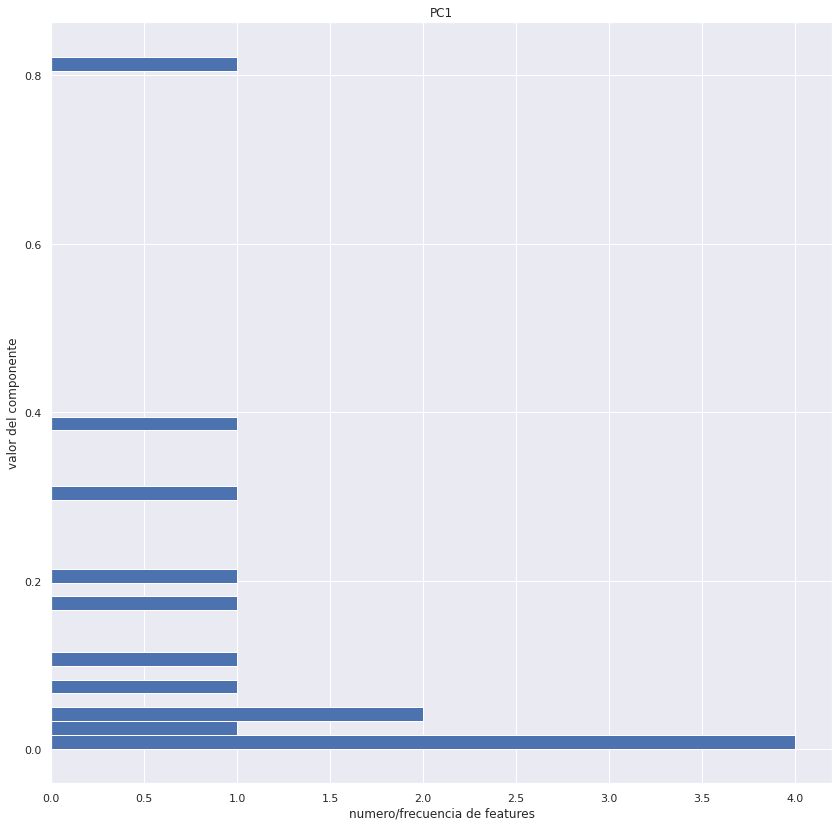

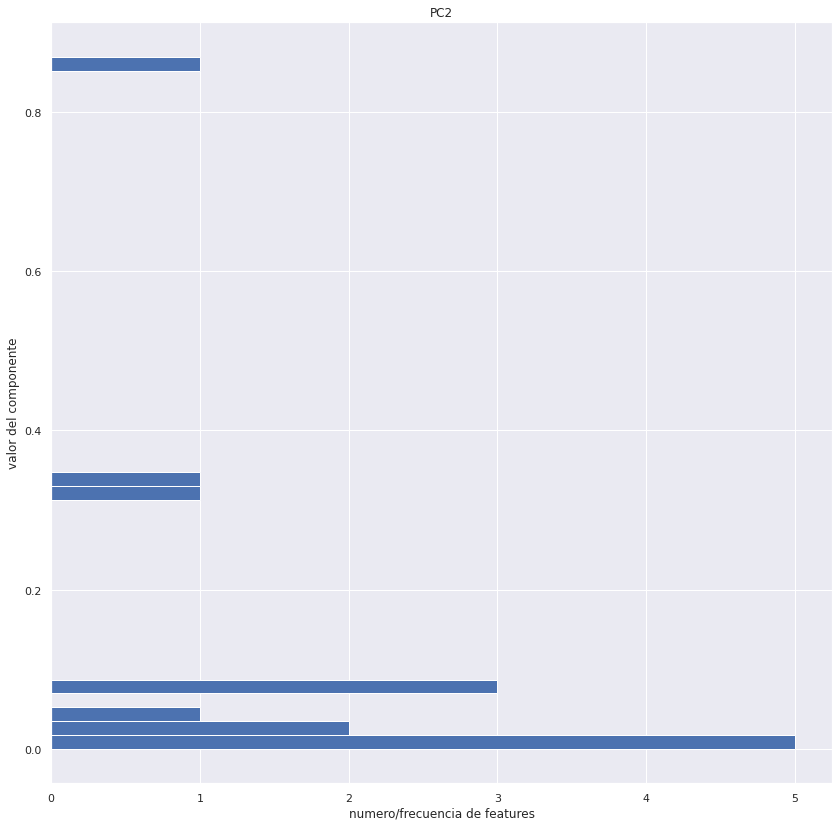

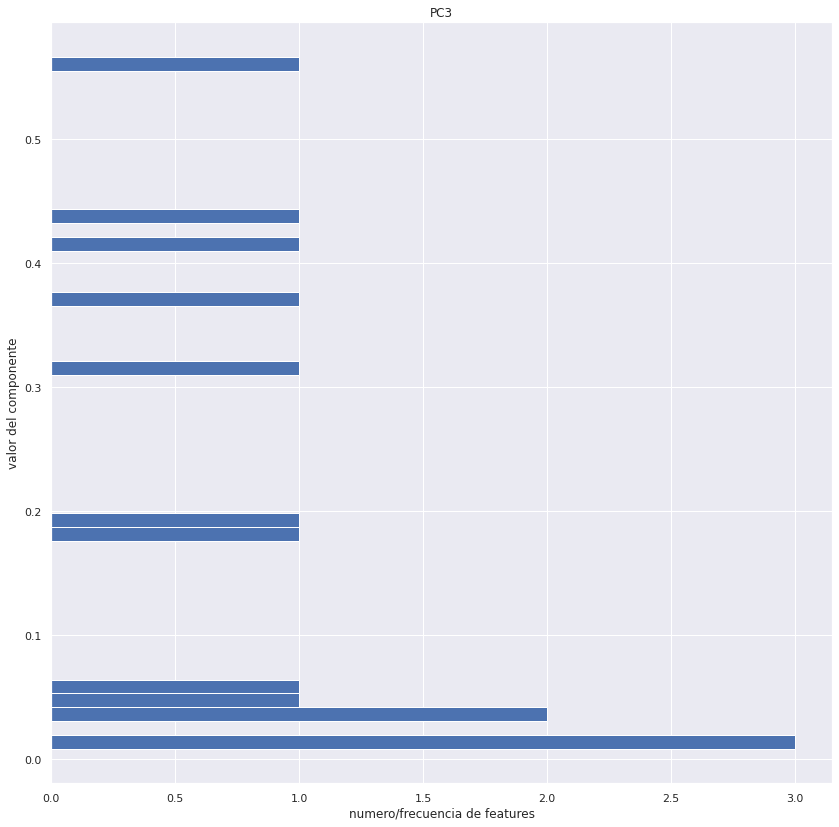

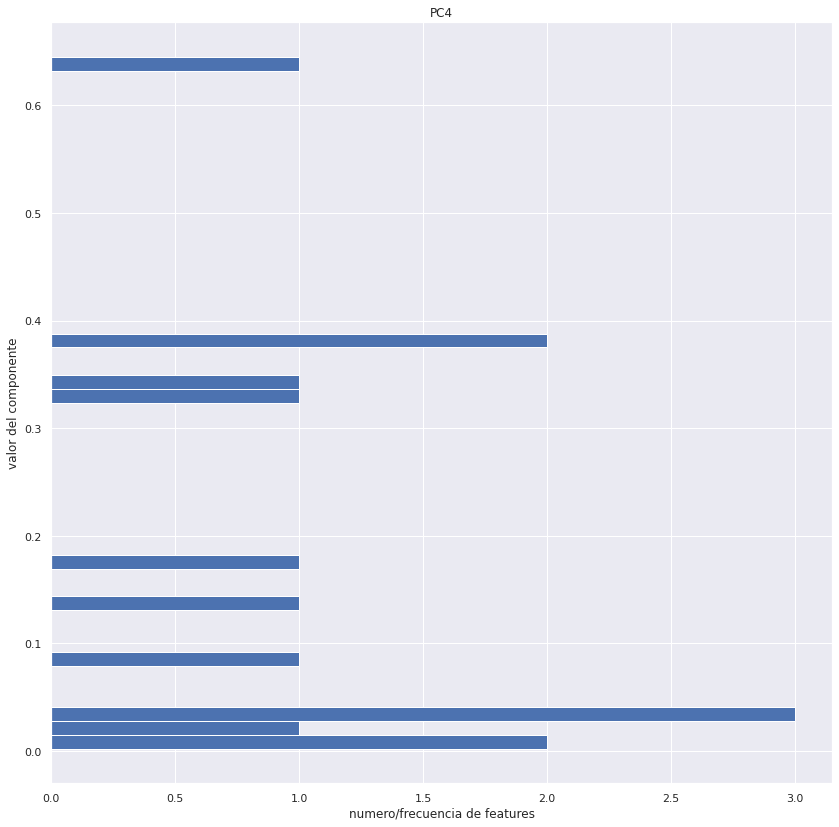

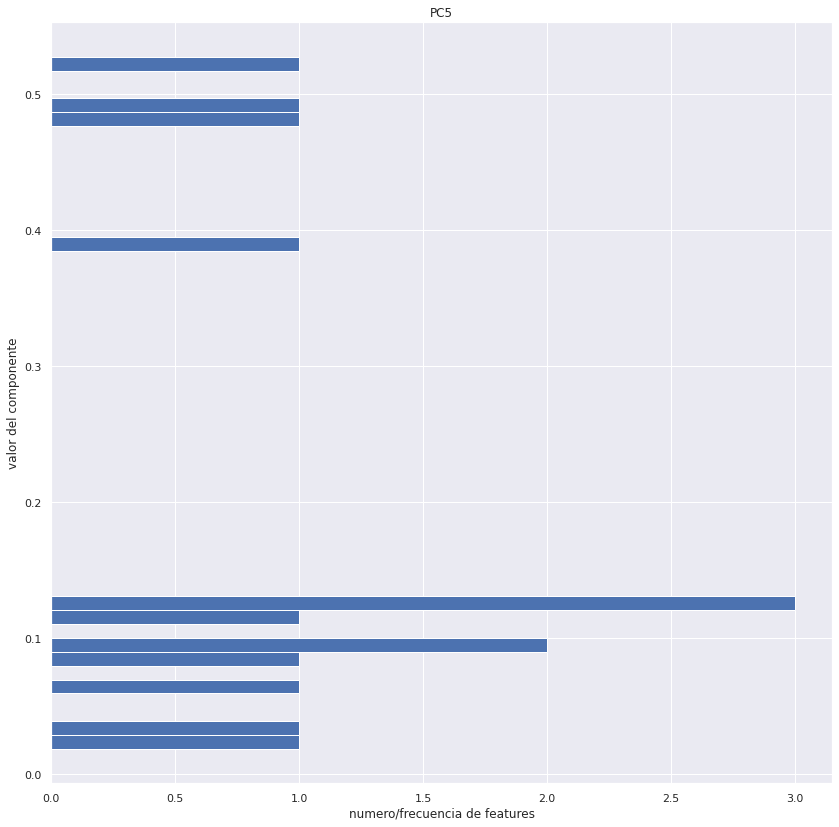

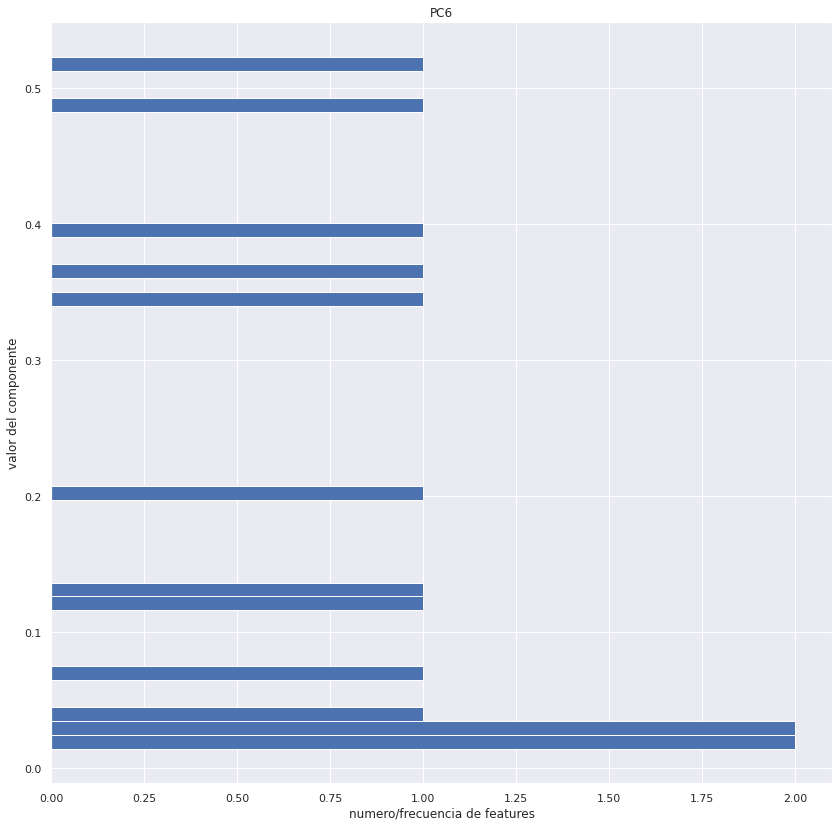

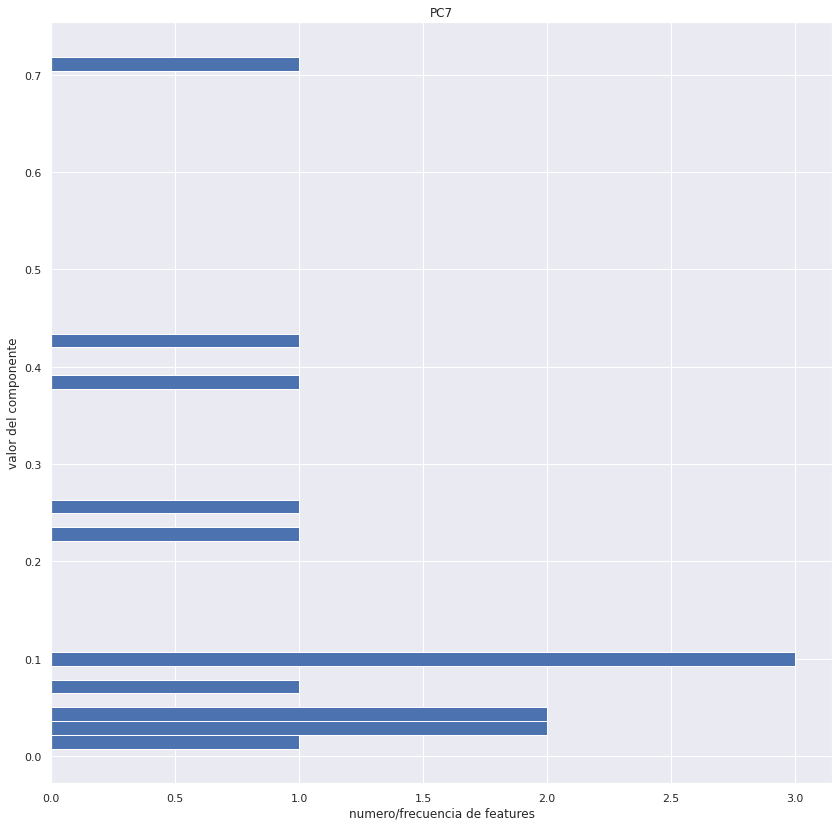

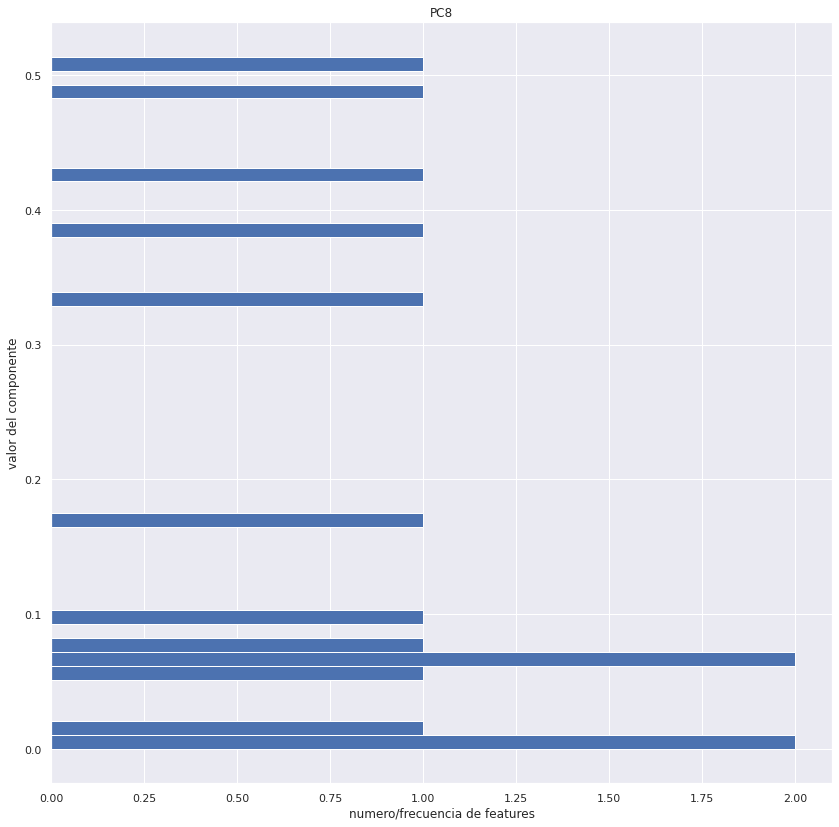

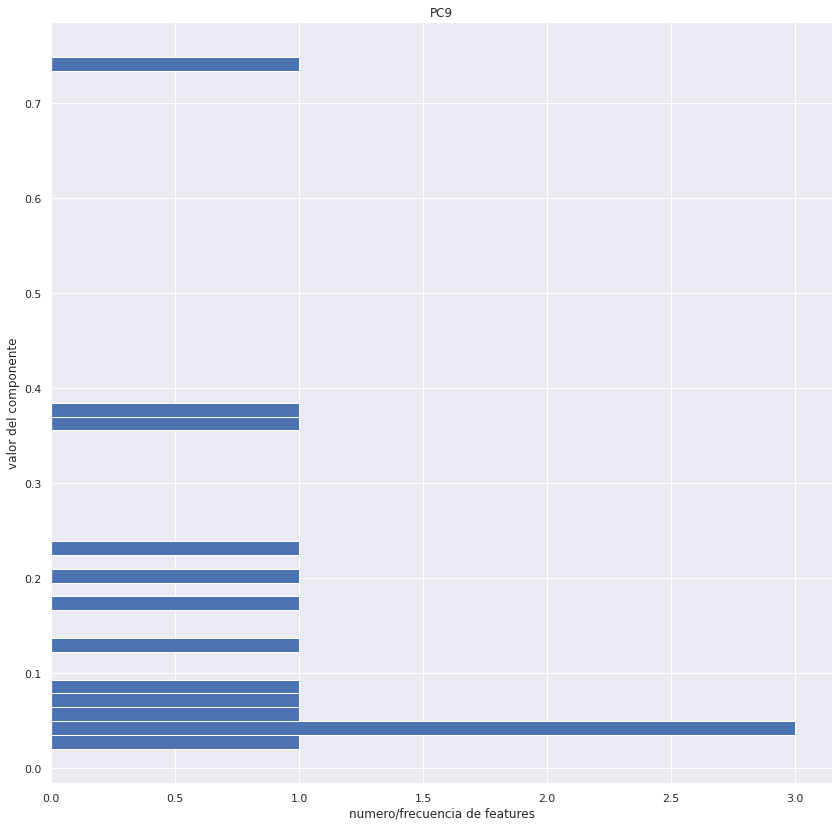

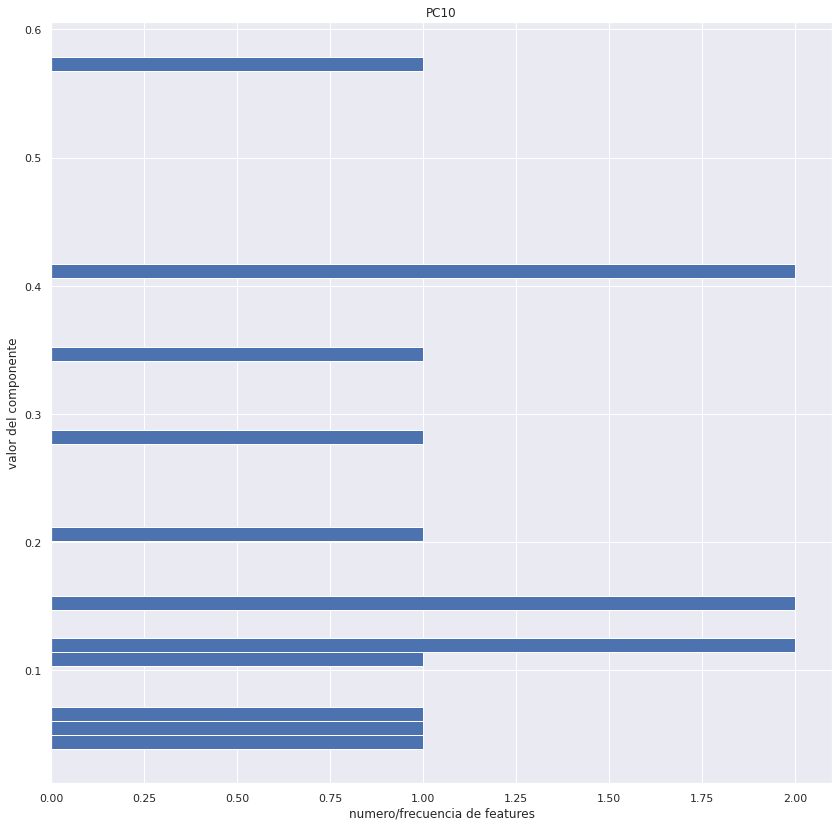

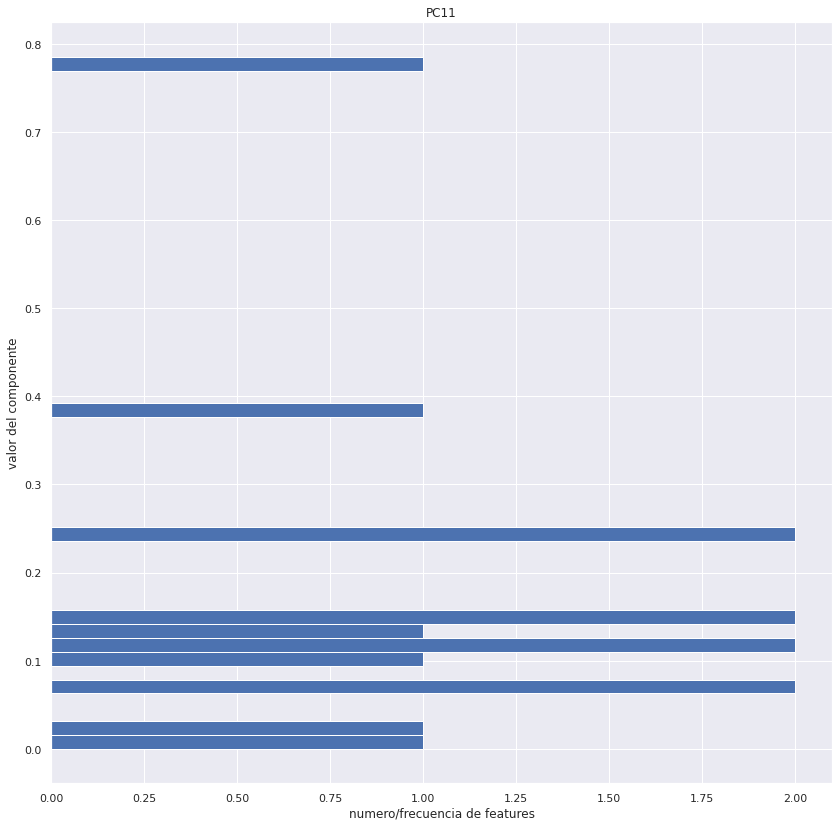

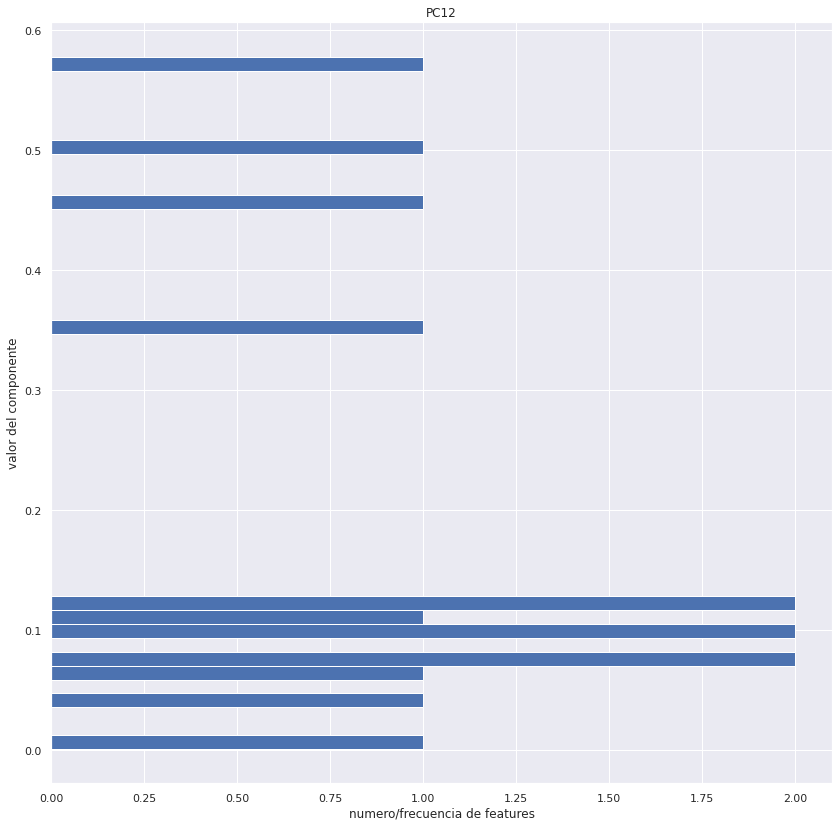

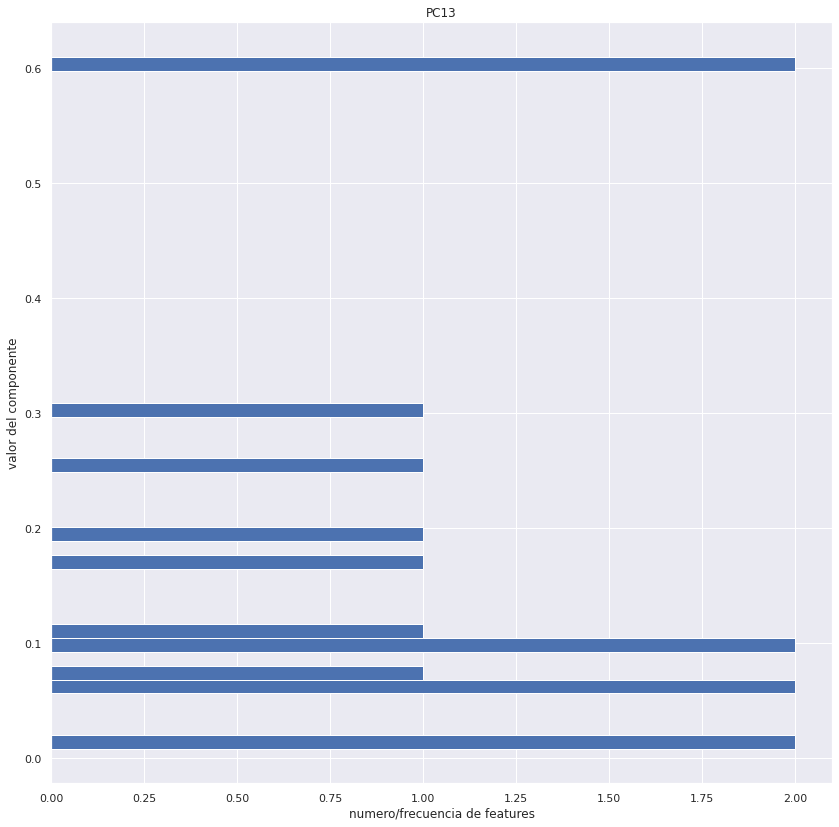

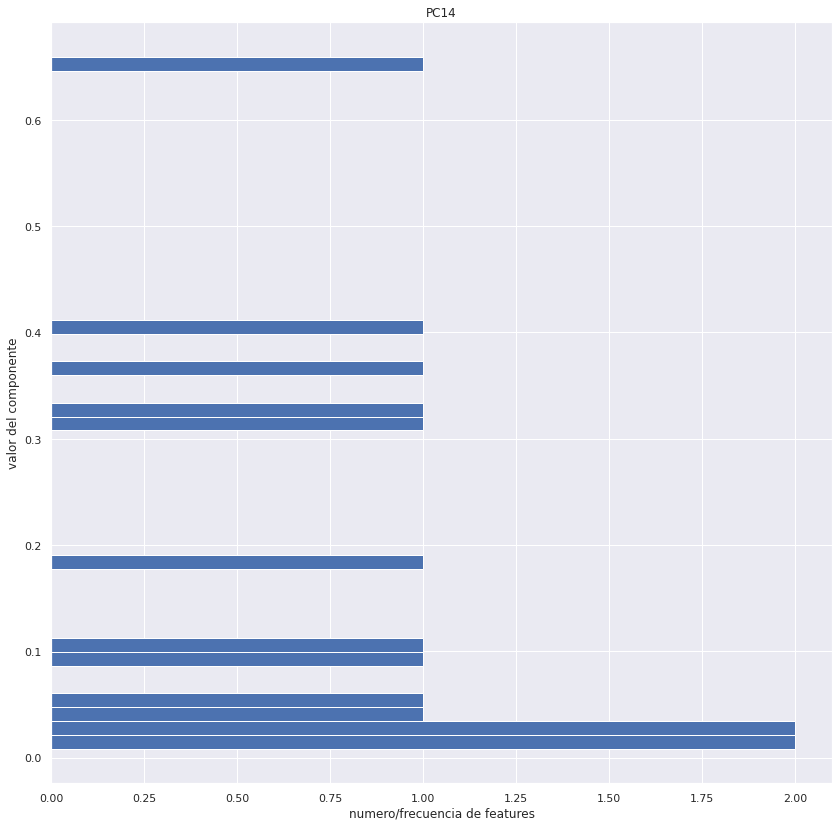

In [30]:
#distribuciones
variables = ['Monto_credito', 'Edad', 'Amortiz_sep', 'Amortiz_ago', 'Amortiz_jul','Amortiz_jun', 'Amortiz_may', 'Amortiz_abr','Pago_prev_sep','Pago_prev_ago','Pago_prev_jul','Pago_prev_jun','Pago_prev_may','Pago_prev_abr']
sns.set(rc={'figure.figsize':(14,14)})

for i in range(0,14):
    #print(comps_df[comps_df.columns[i]].abs()) 
    plt.hist(comps_df[comps_df.columns[i]].abs(), 50, orientation='horizontal') #HISTOGRAMAS
    plt.ylabel('valor del componente')
    plt.xlabel('numero/frecuencia de features')
    plt.title(comps_df.columns[i])
    plt.show()

Histogramas de data frame escalado y sin categorias

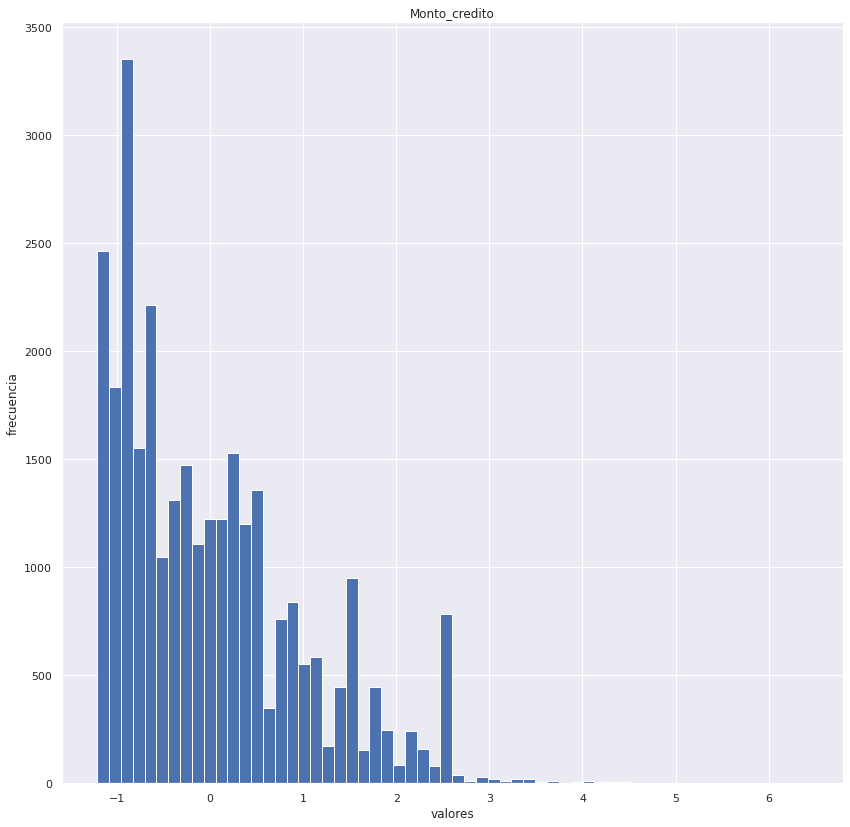

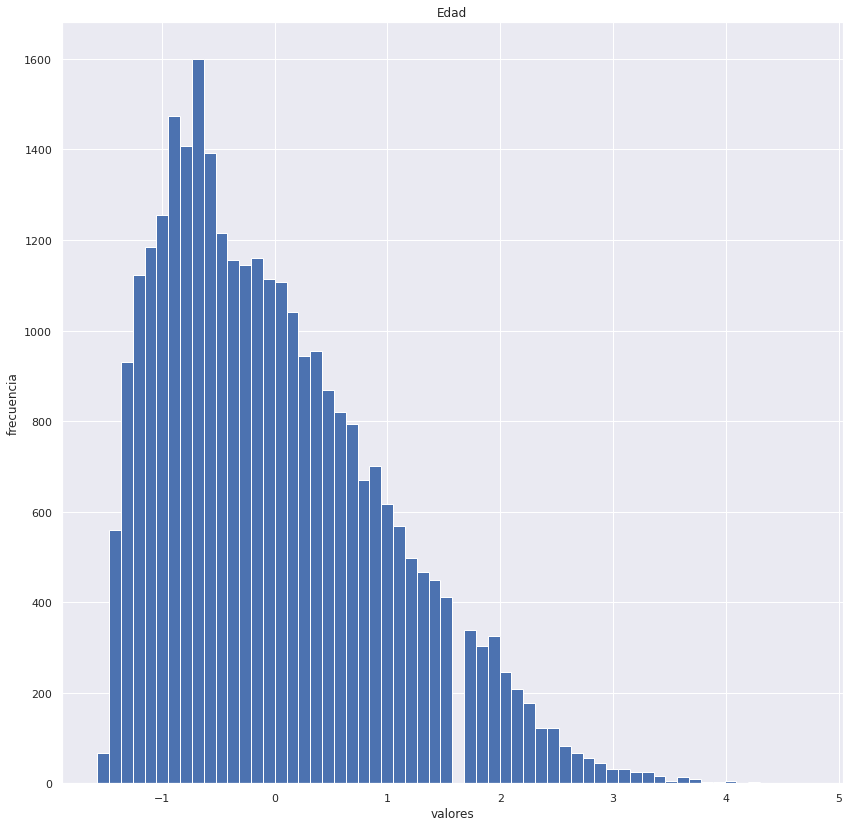

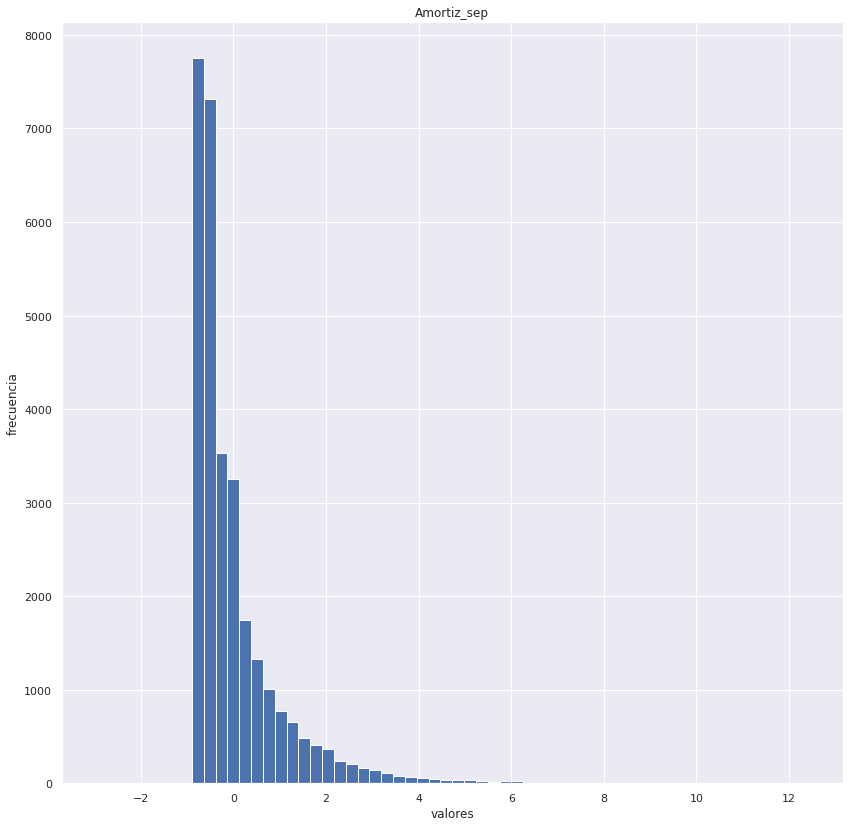

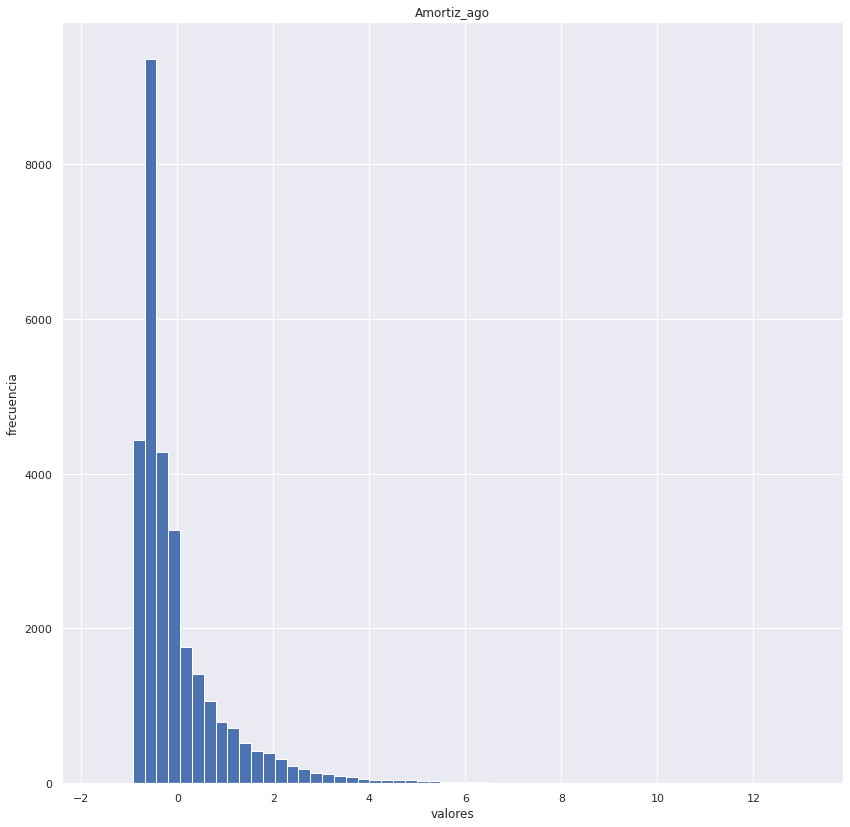

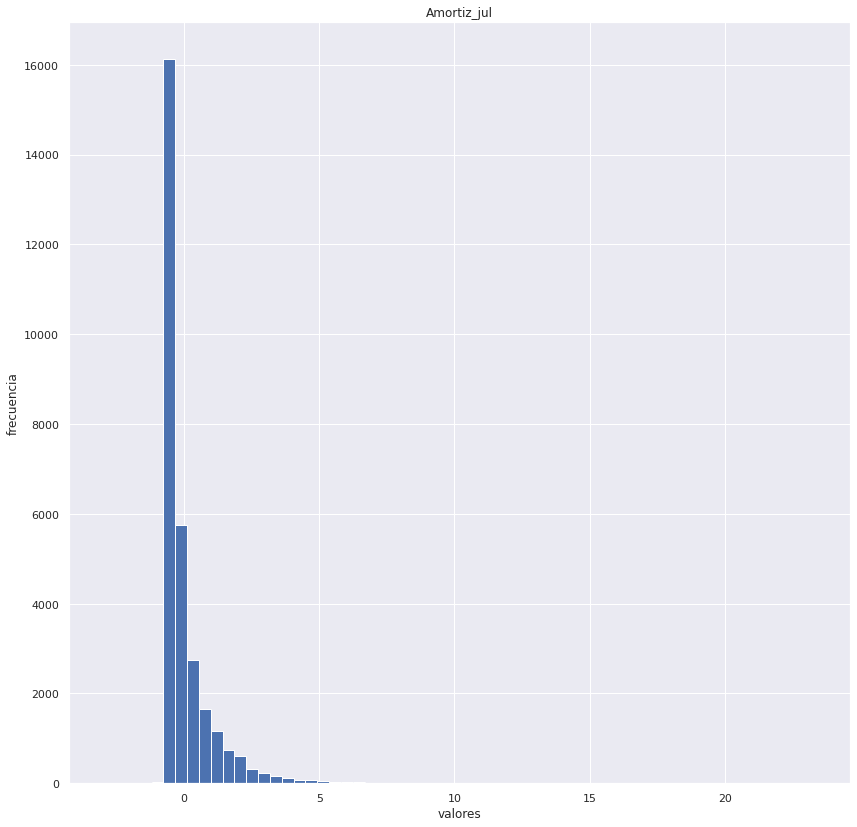

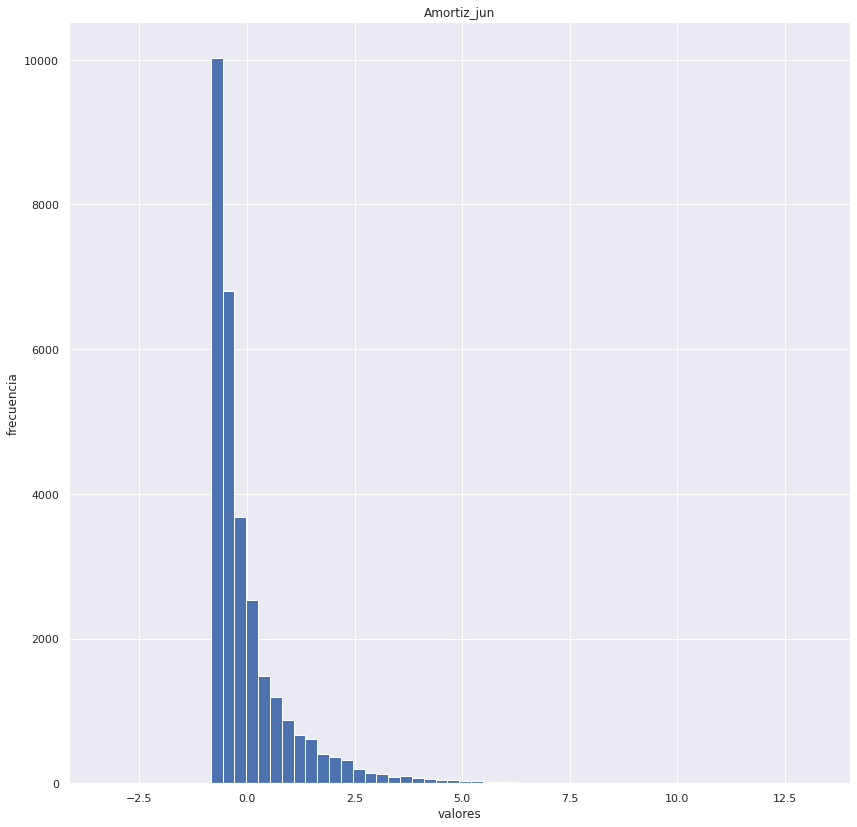

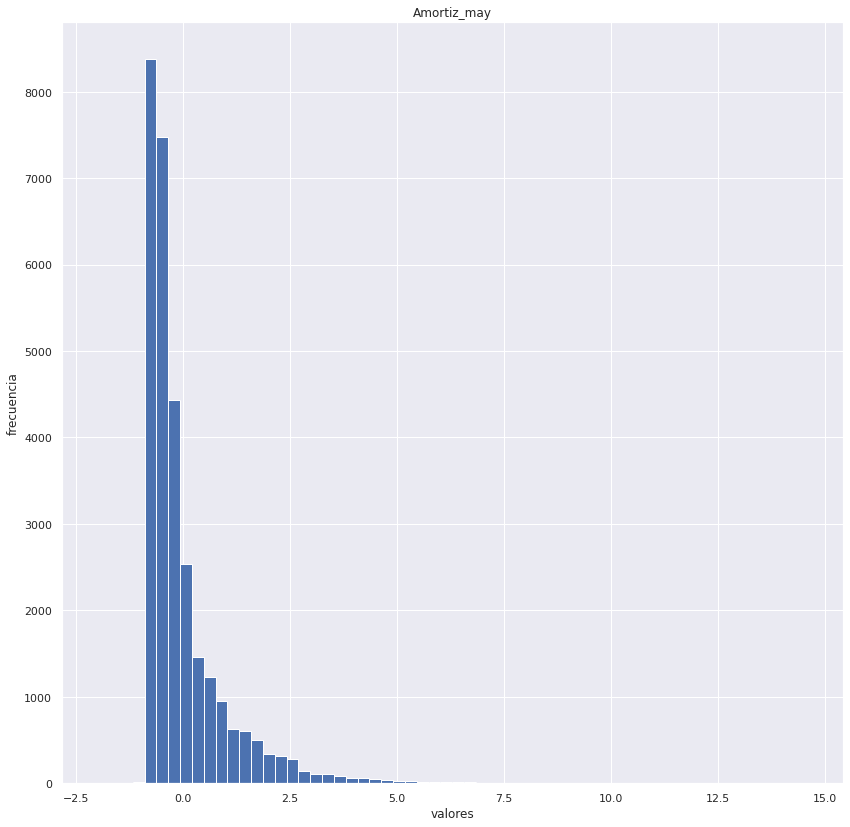

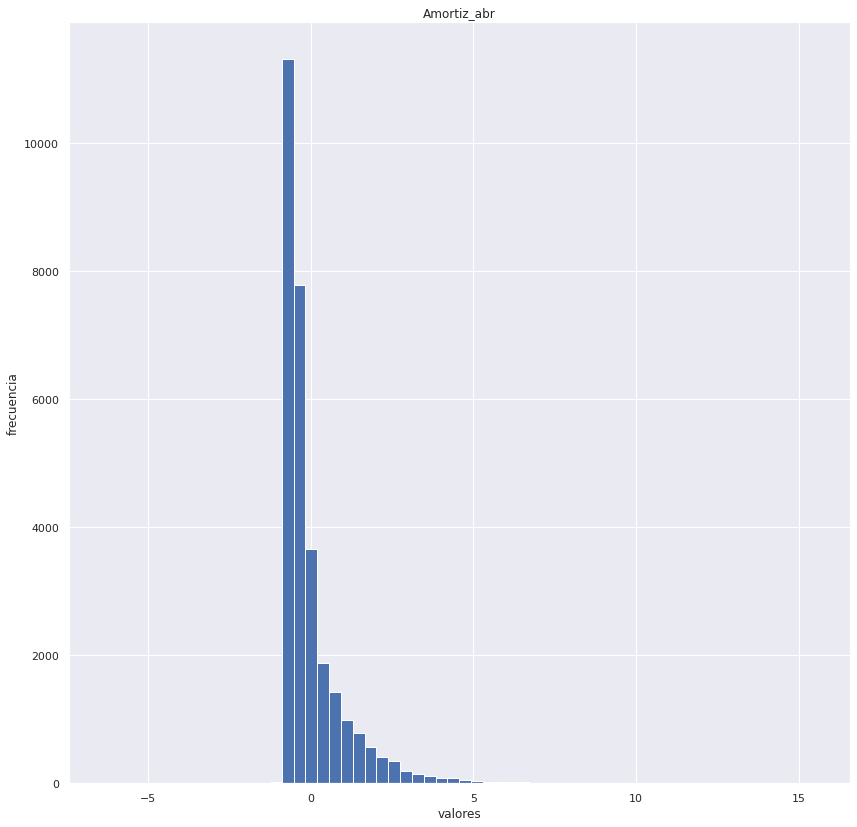

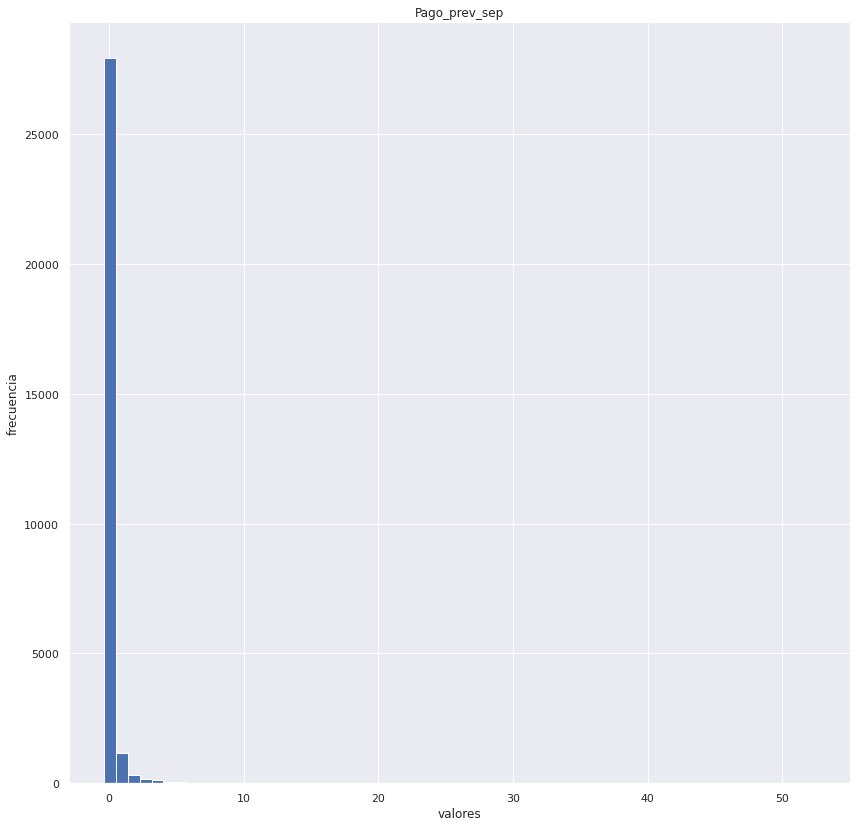

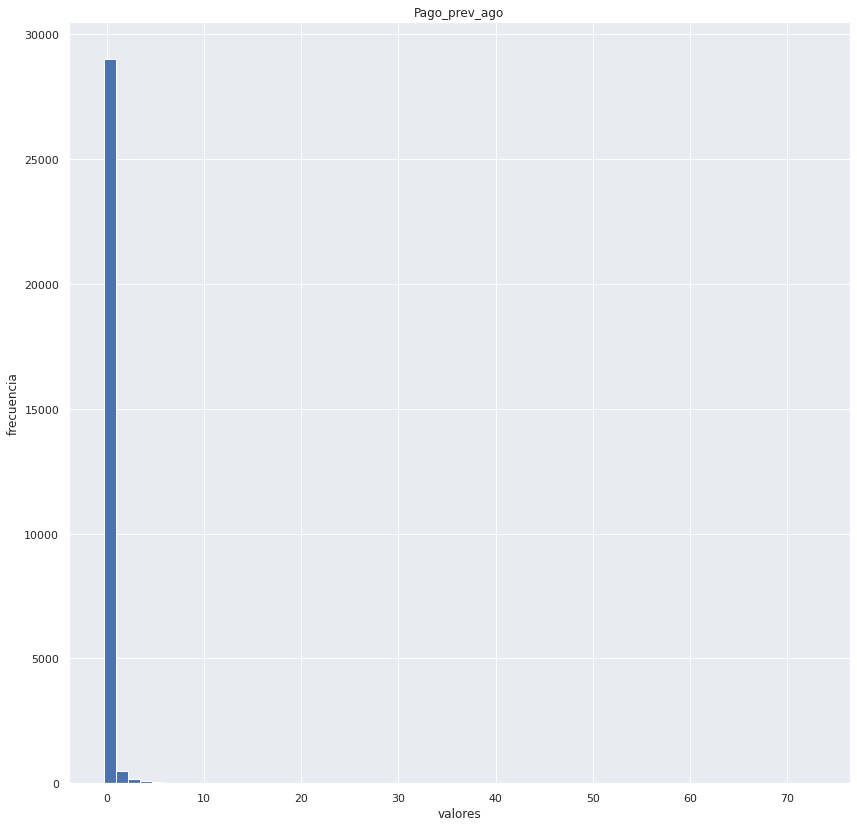

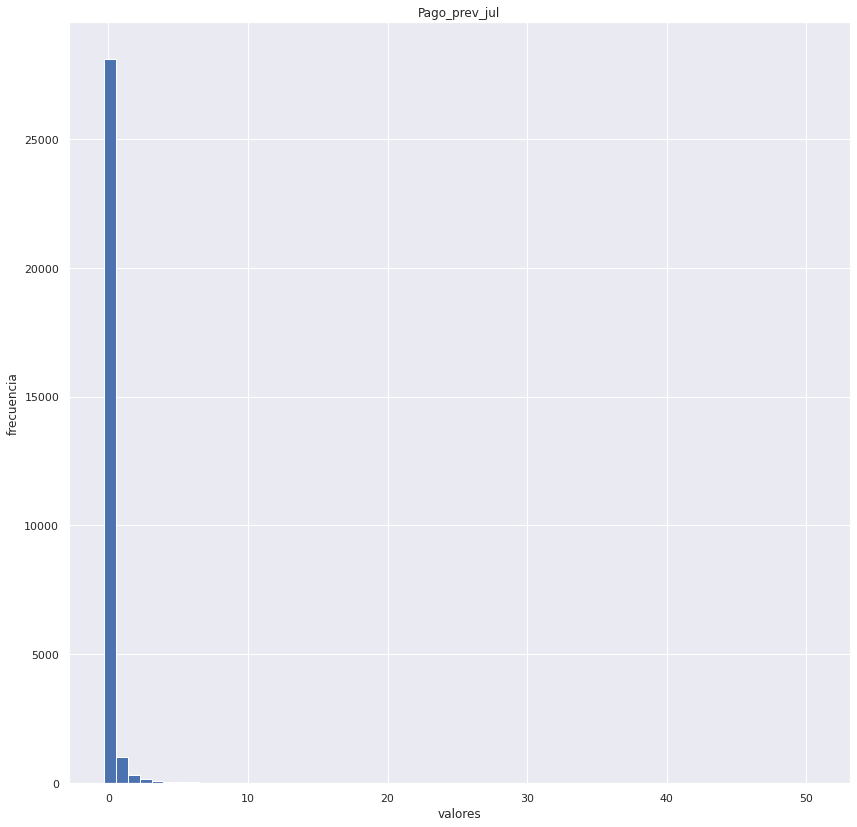

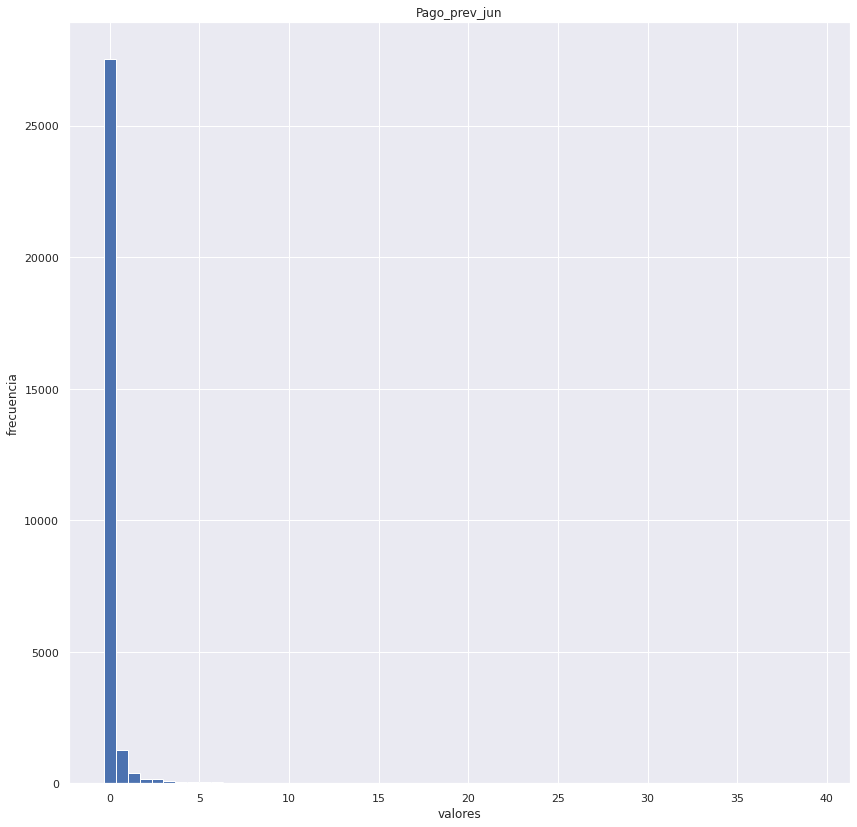

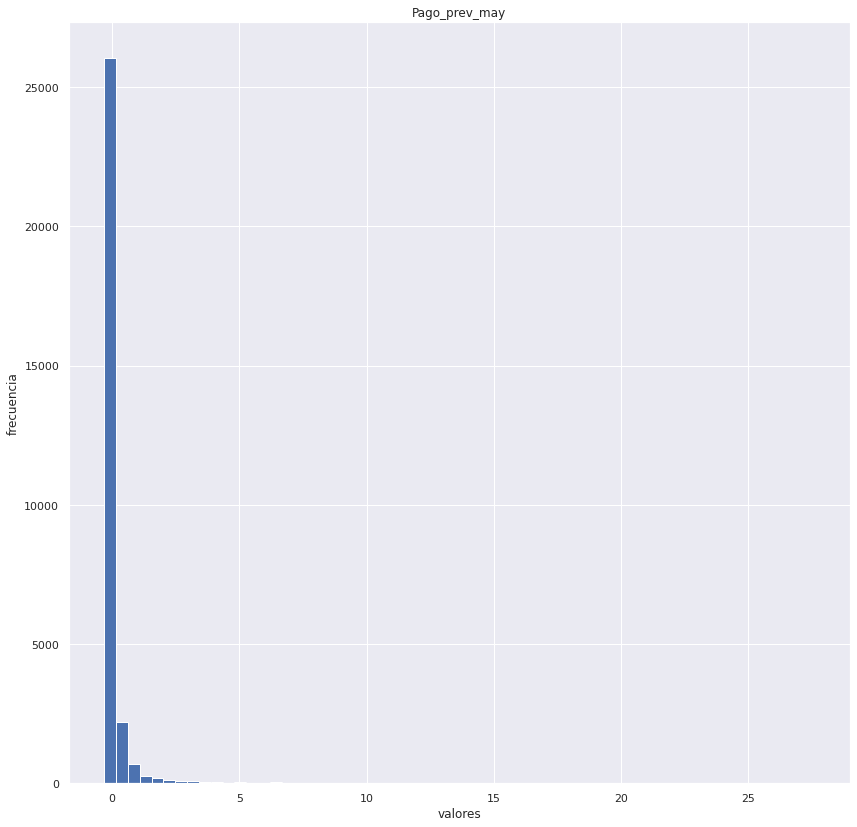

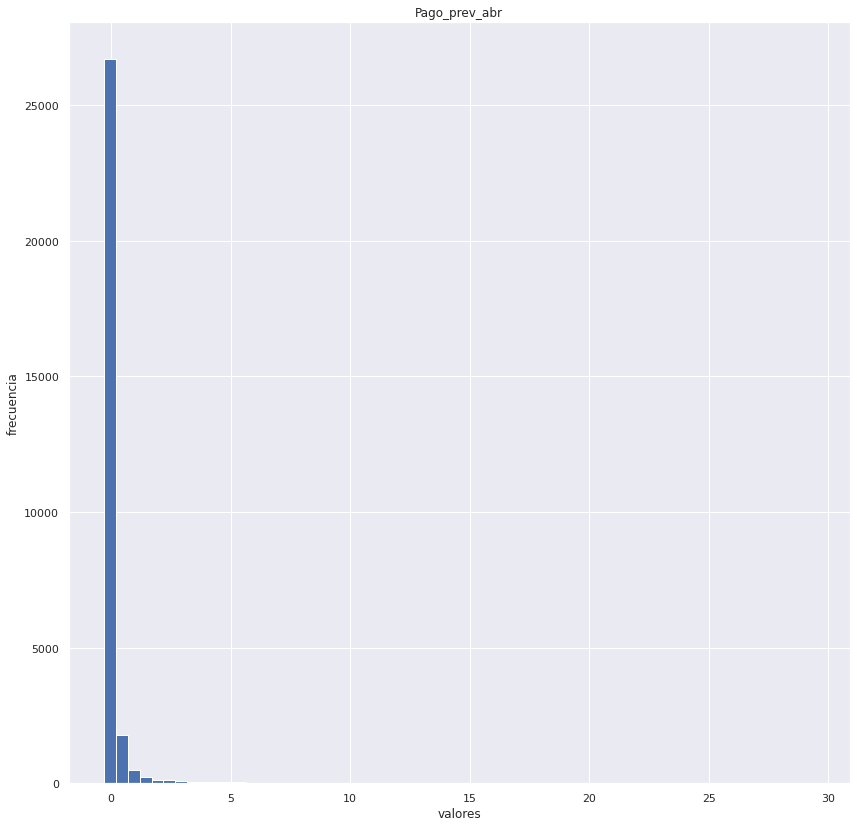

In [31]:
sns.set(rc={'figure.figsize':(14,14)})

for i in range(0,14):
    #print(comps_df[comps_df.columns[i]].abs()) 
    plt.hist(df_scaled[df_scaled.columns[i]], 60) #HISTOGRAMAS
    plt.ylabel('frecuencia')
    plt.xlabel('valores')
    plt.title(df_scaled.columns[i])
    plt.show()

In [57]:
#def inicializar():
df = credit_clients_df.copy() #Definimos un DataFrame para usar como BD


Histogramas del la data original

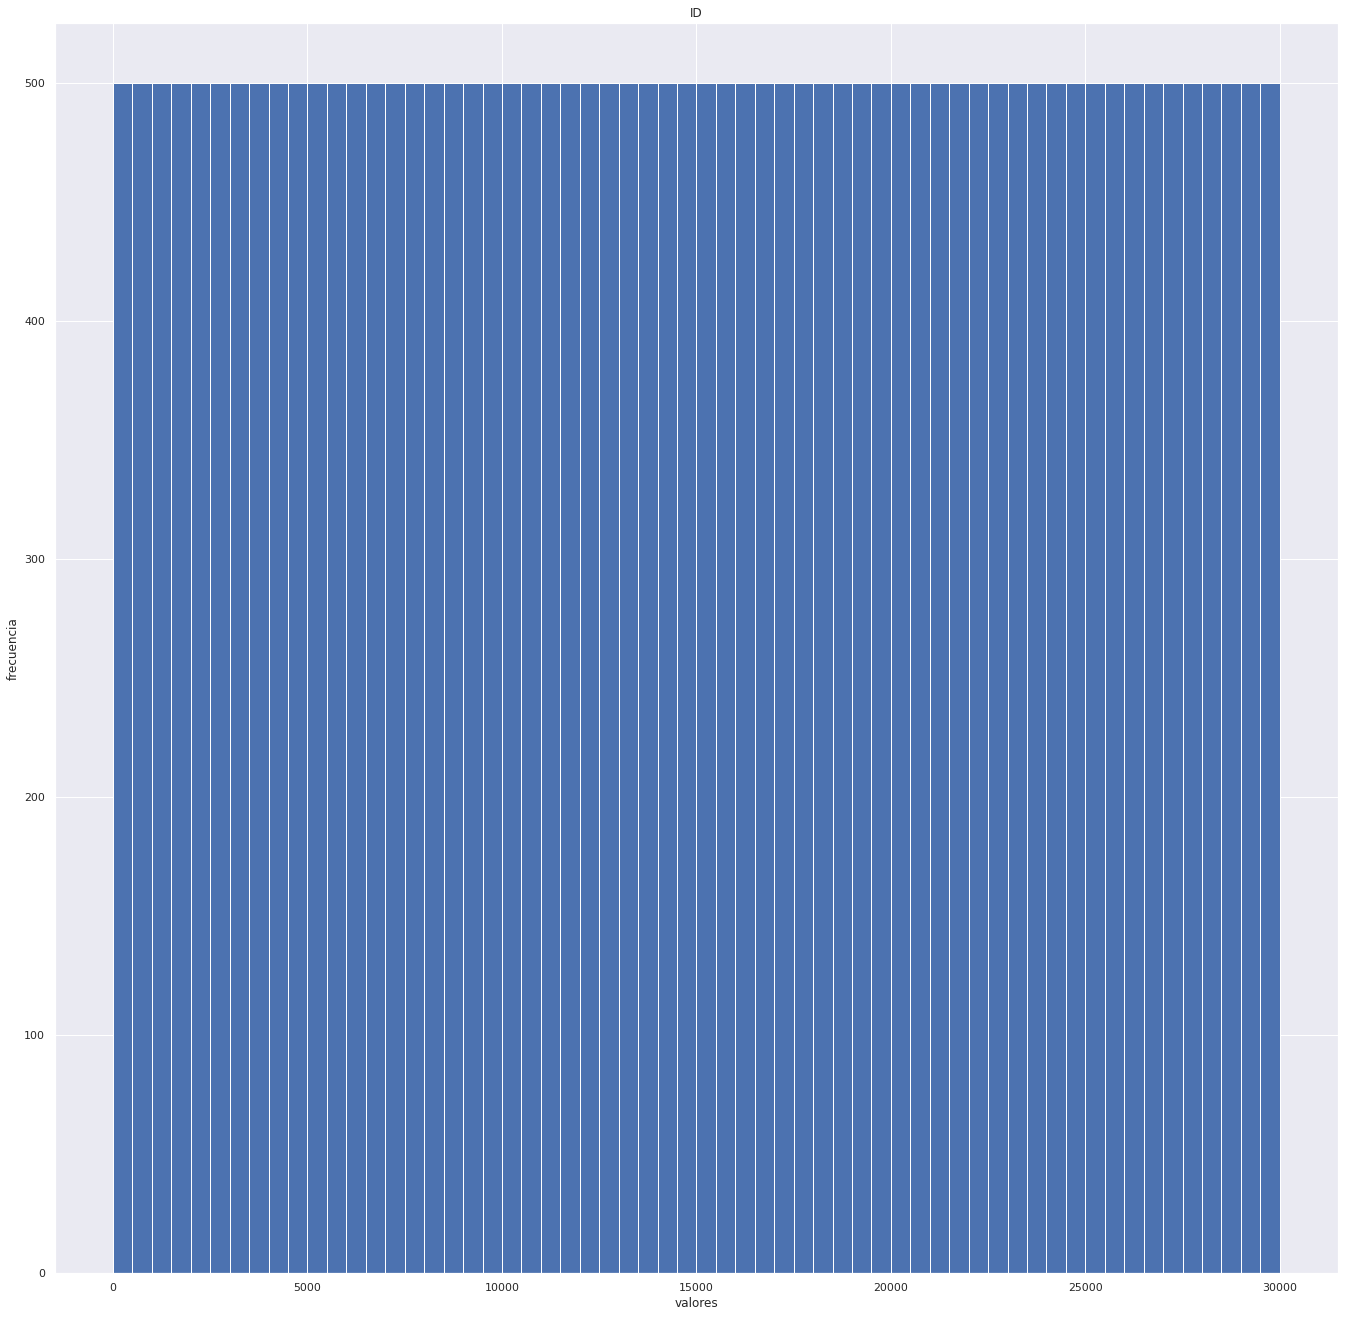

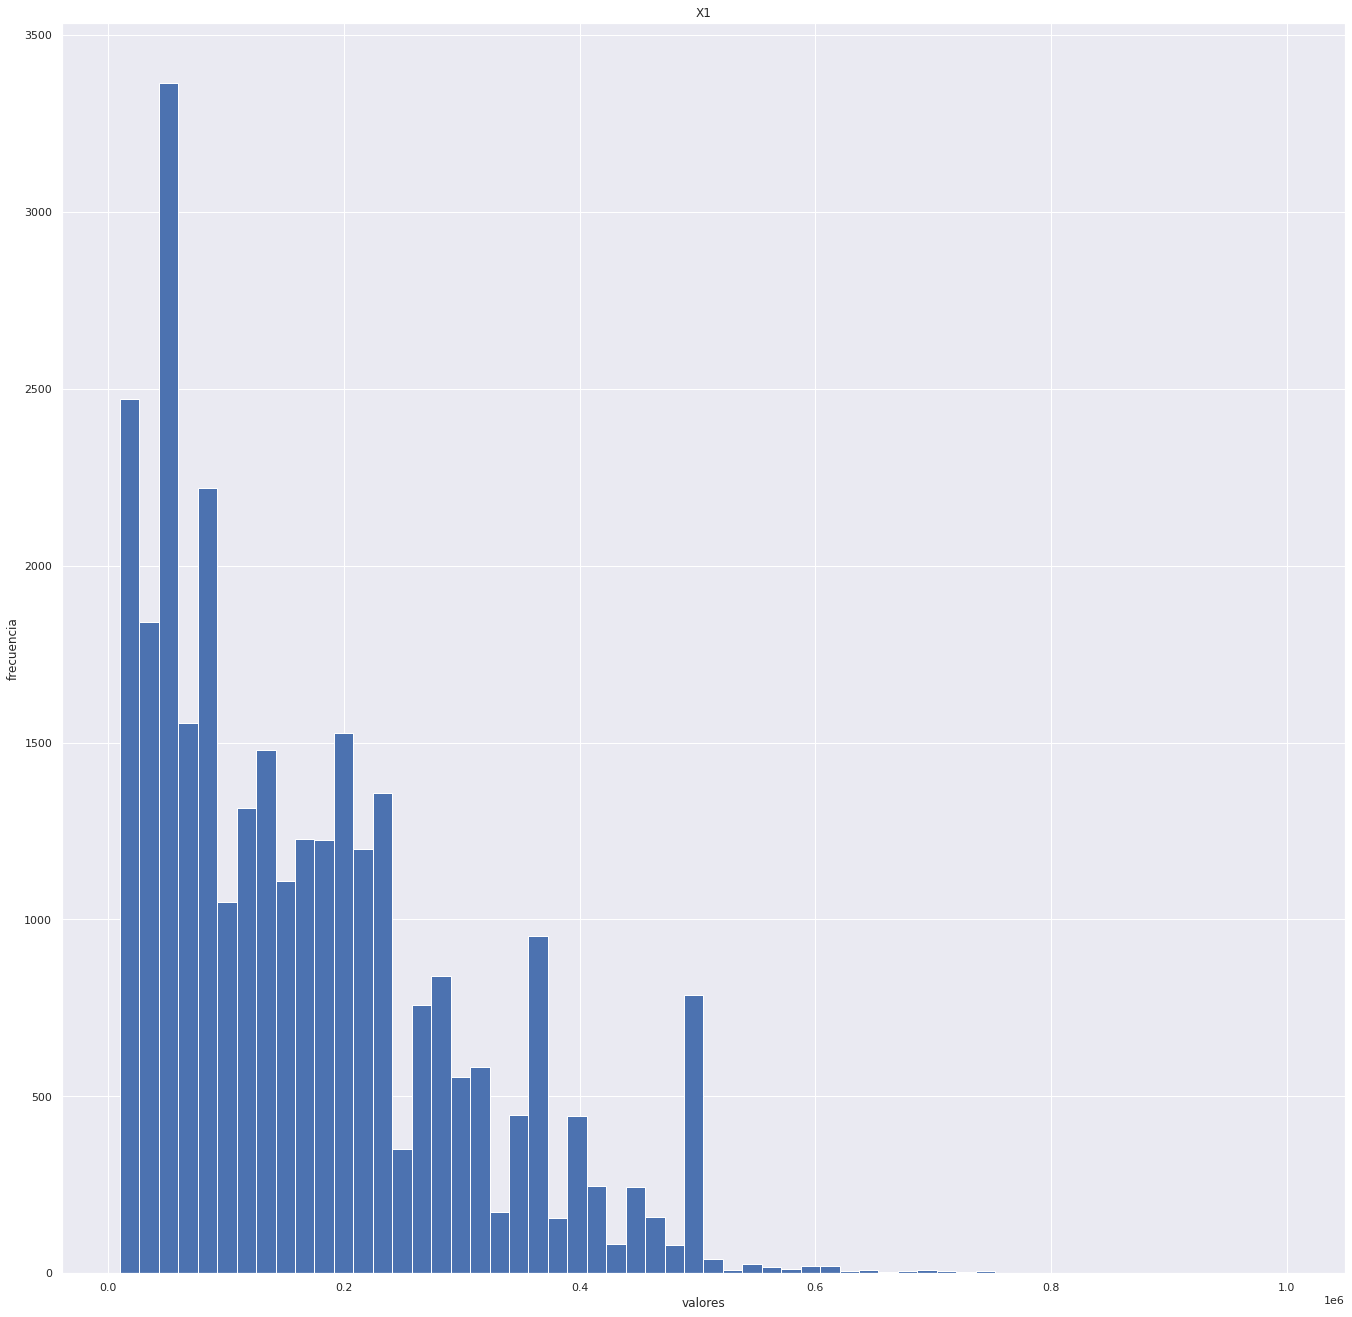

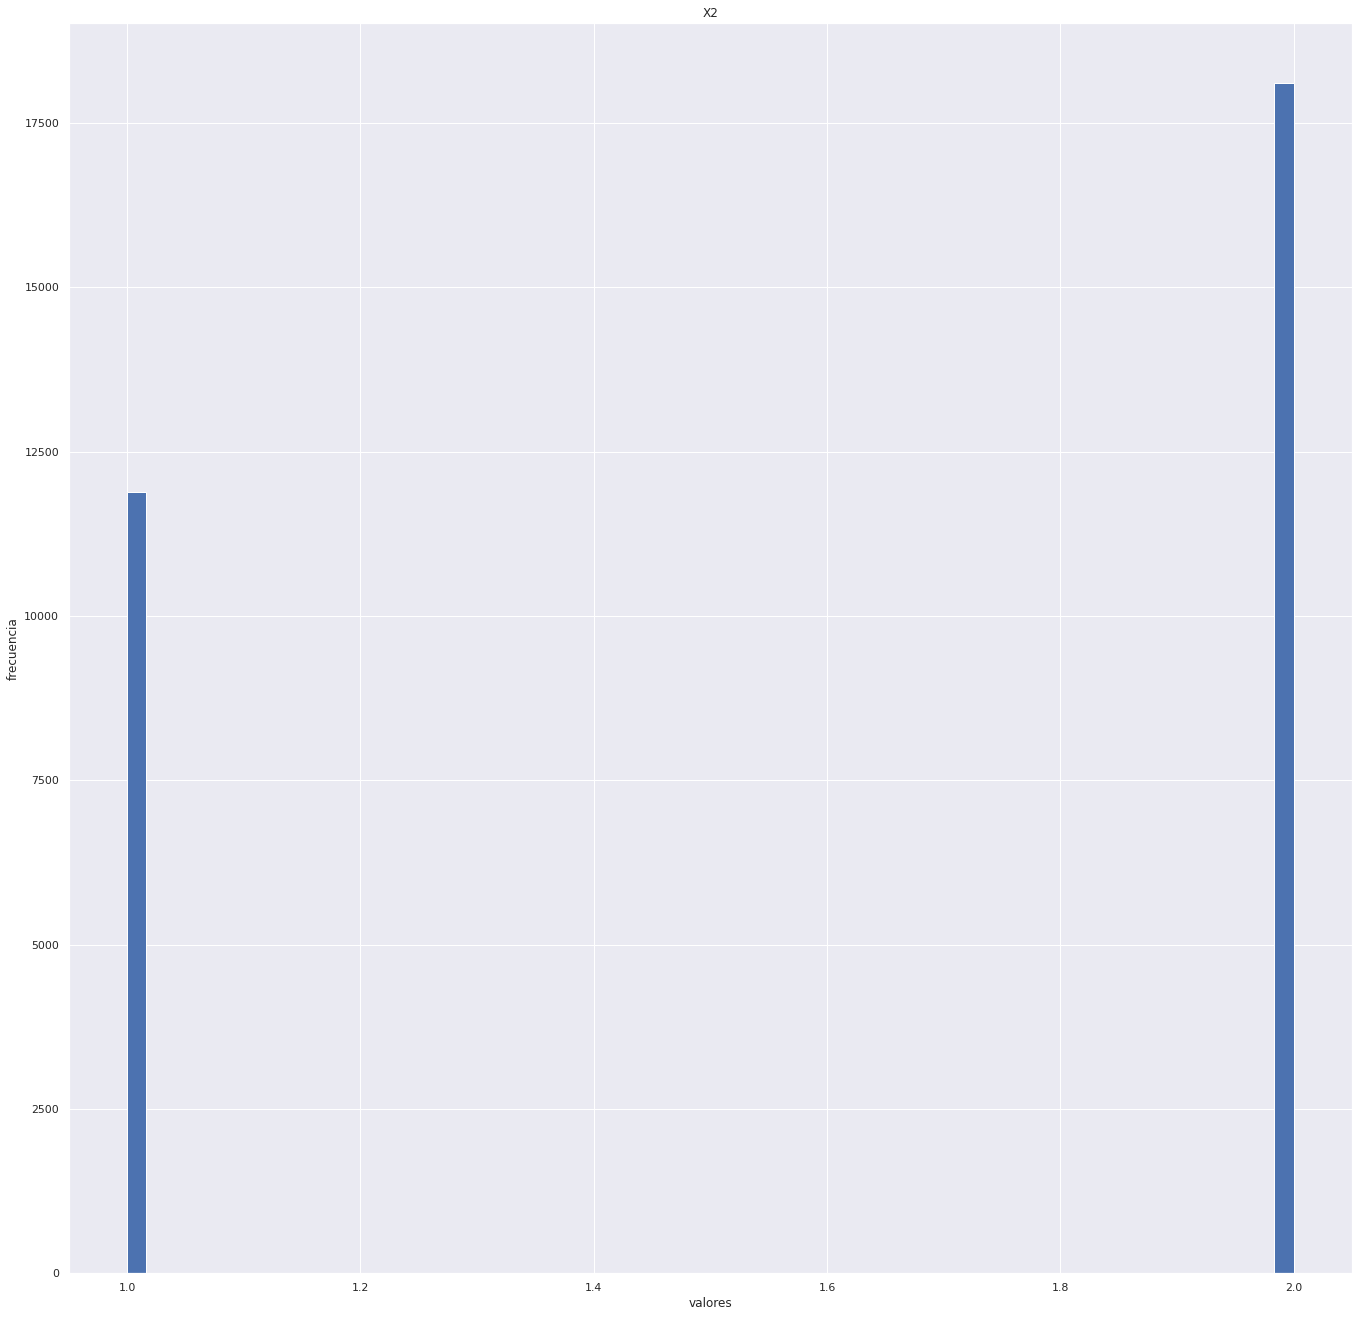

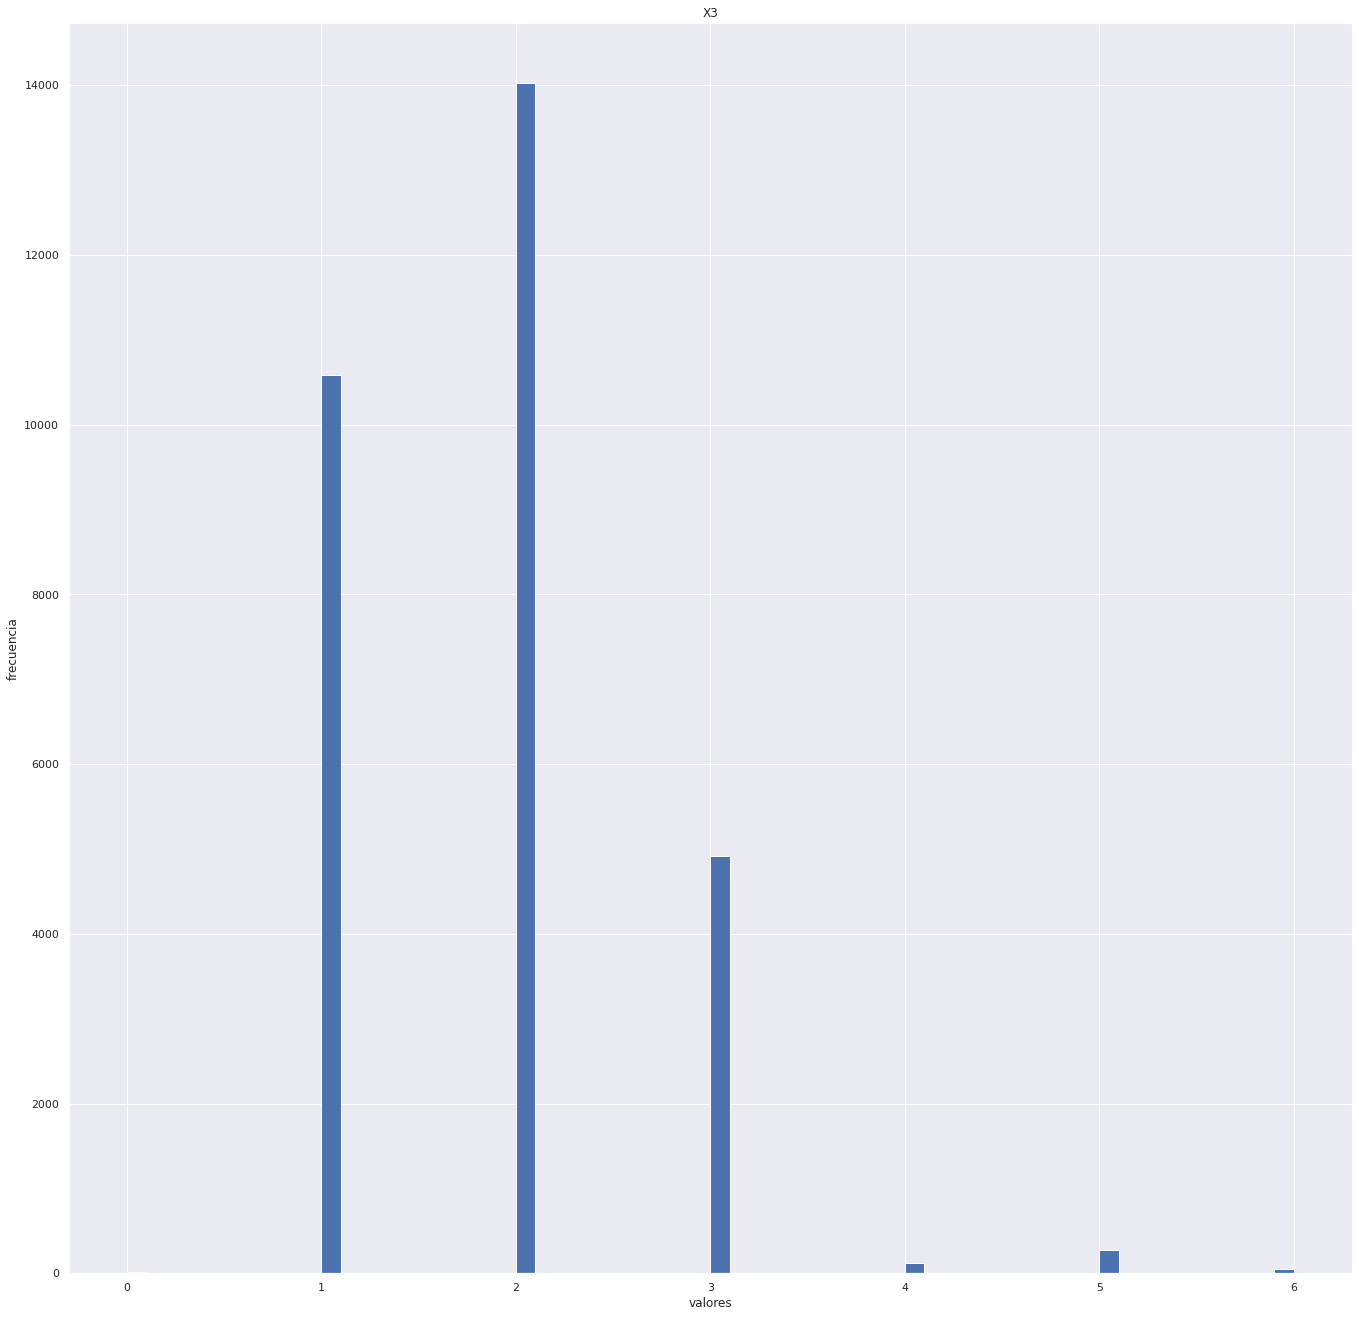

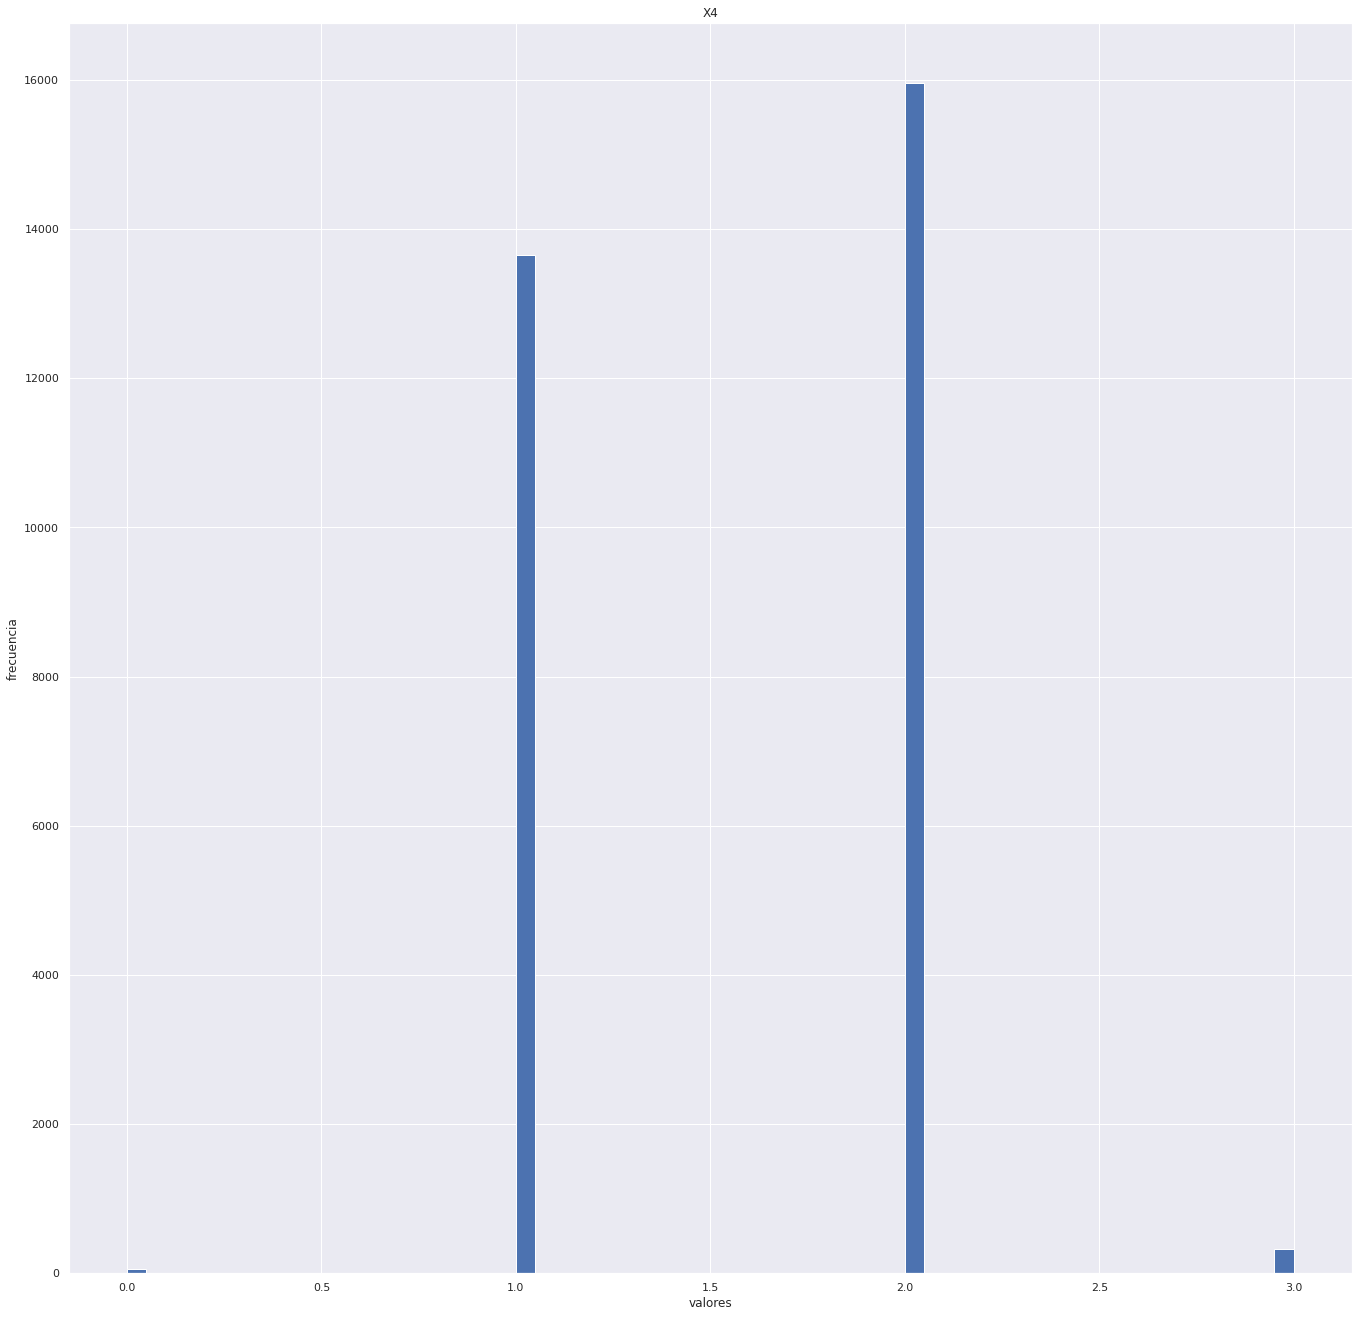

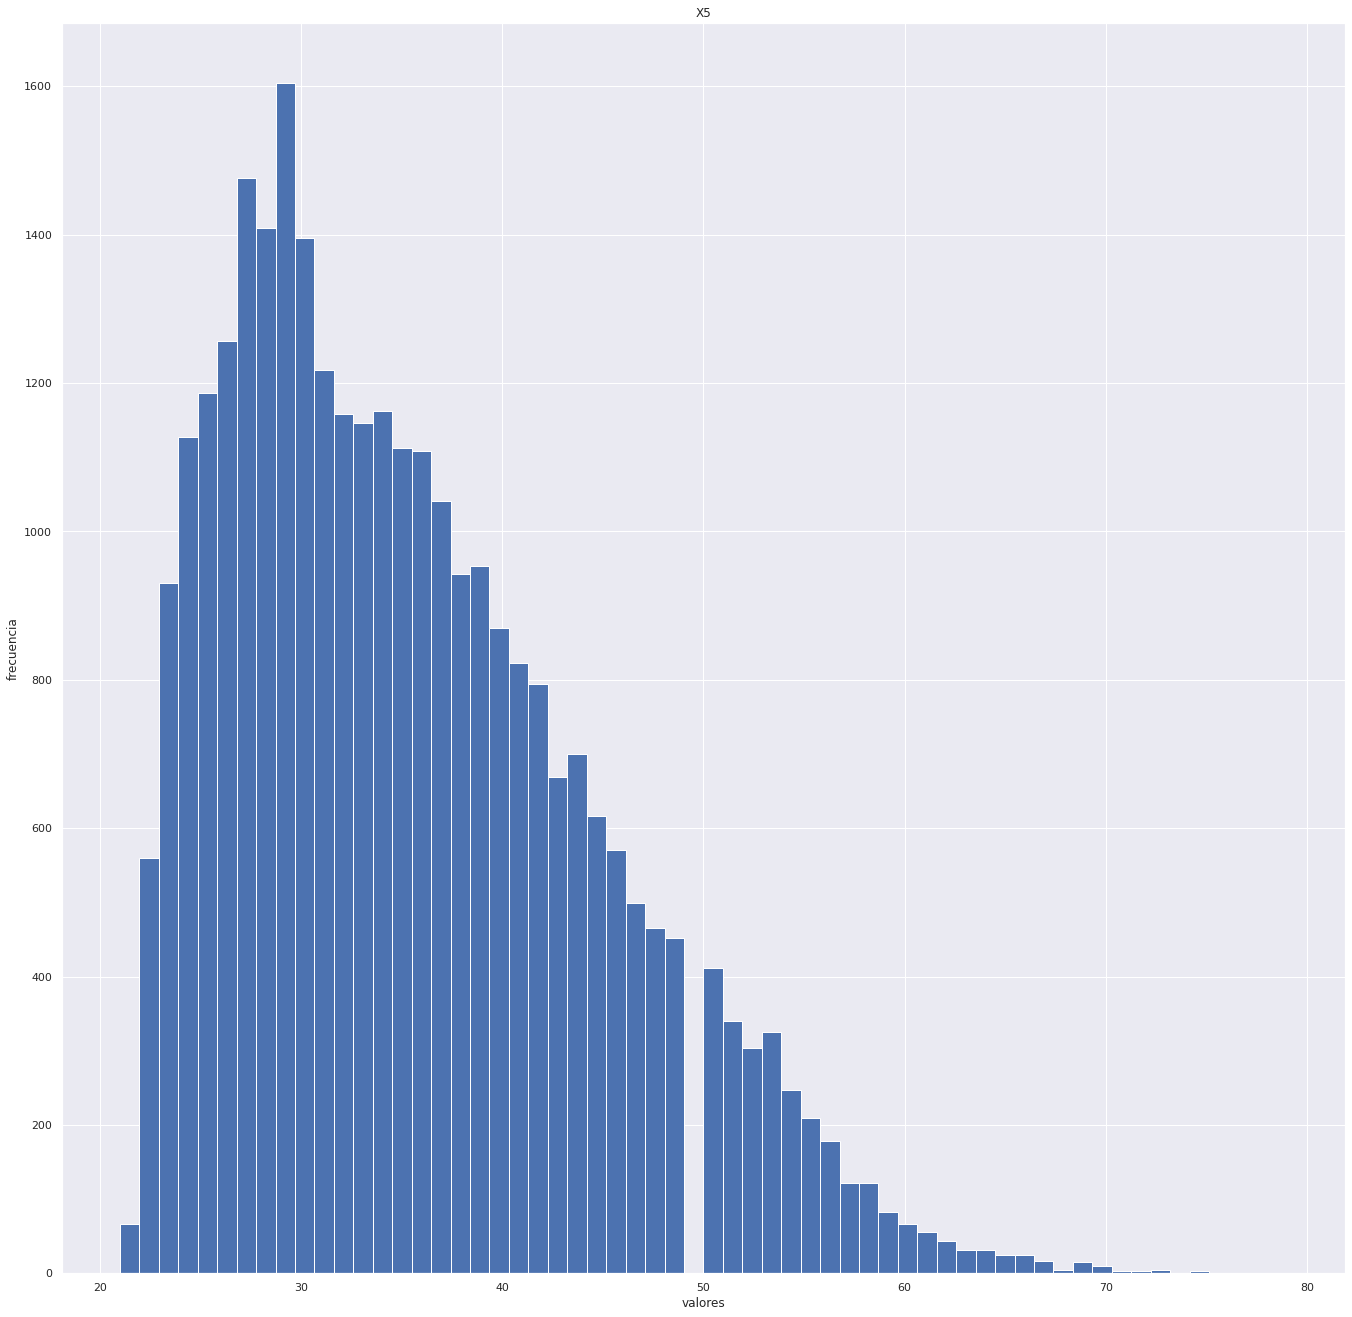

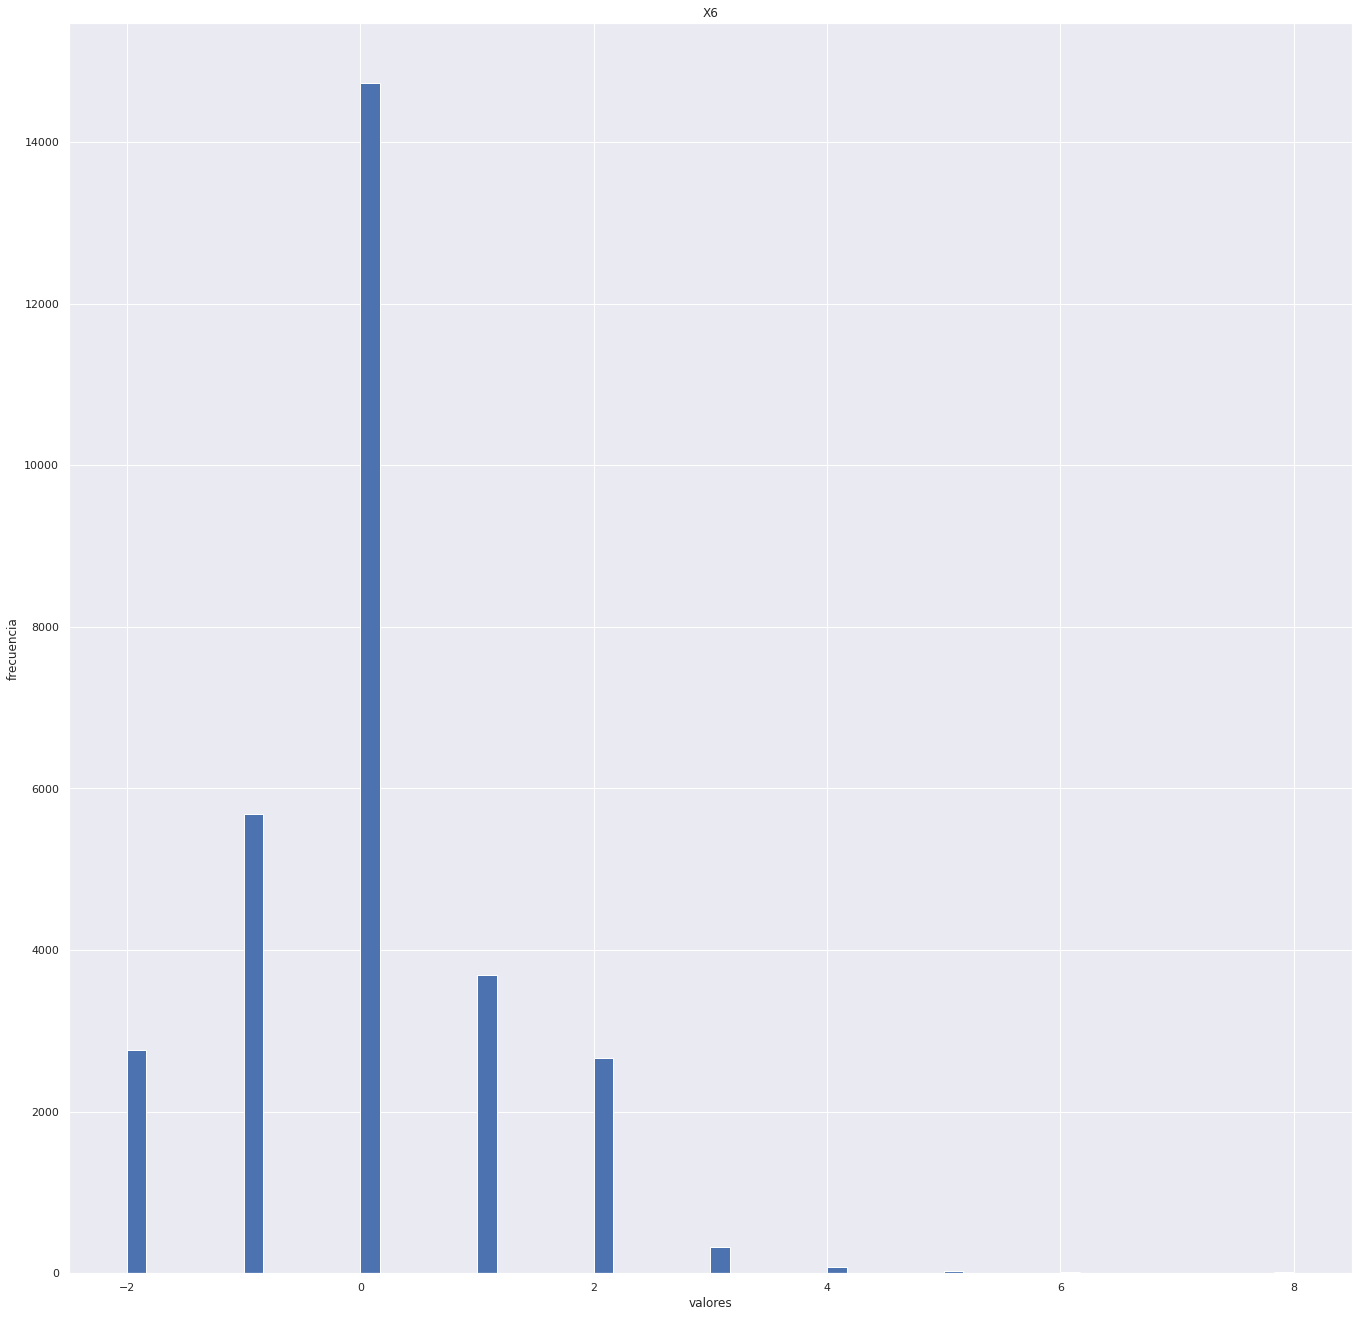

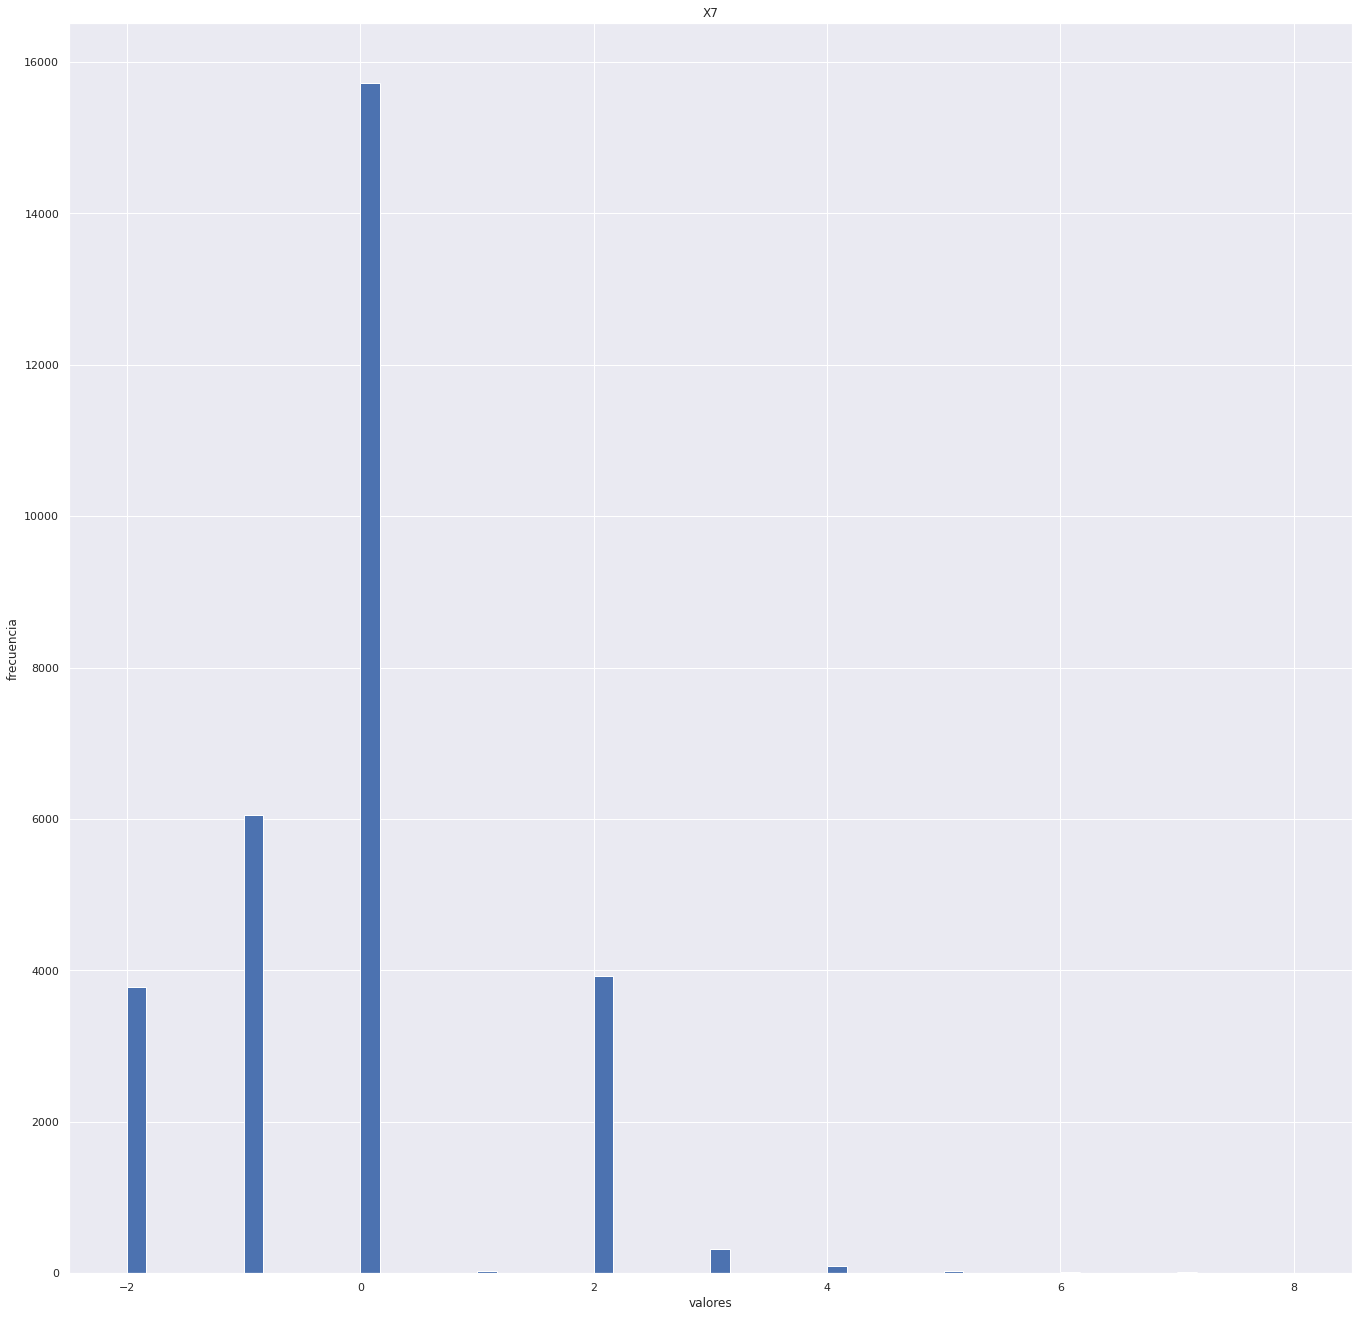

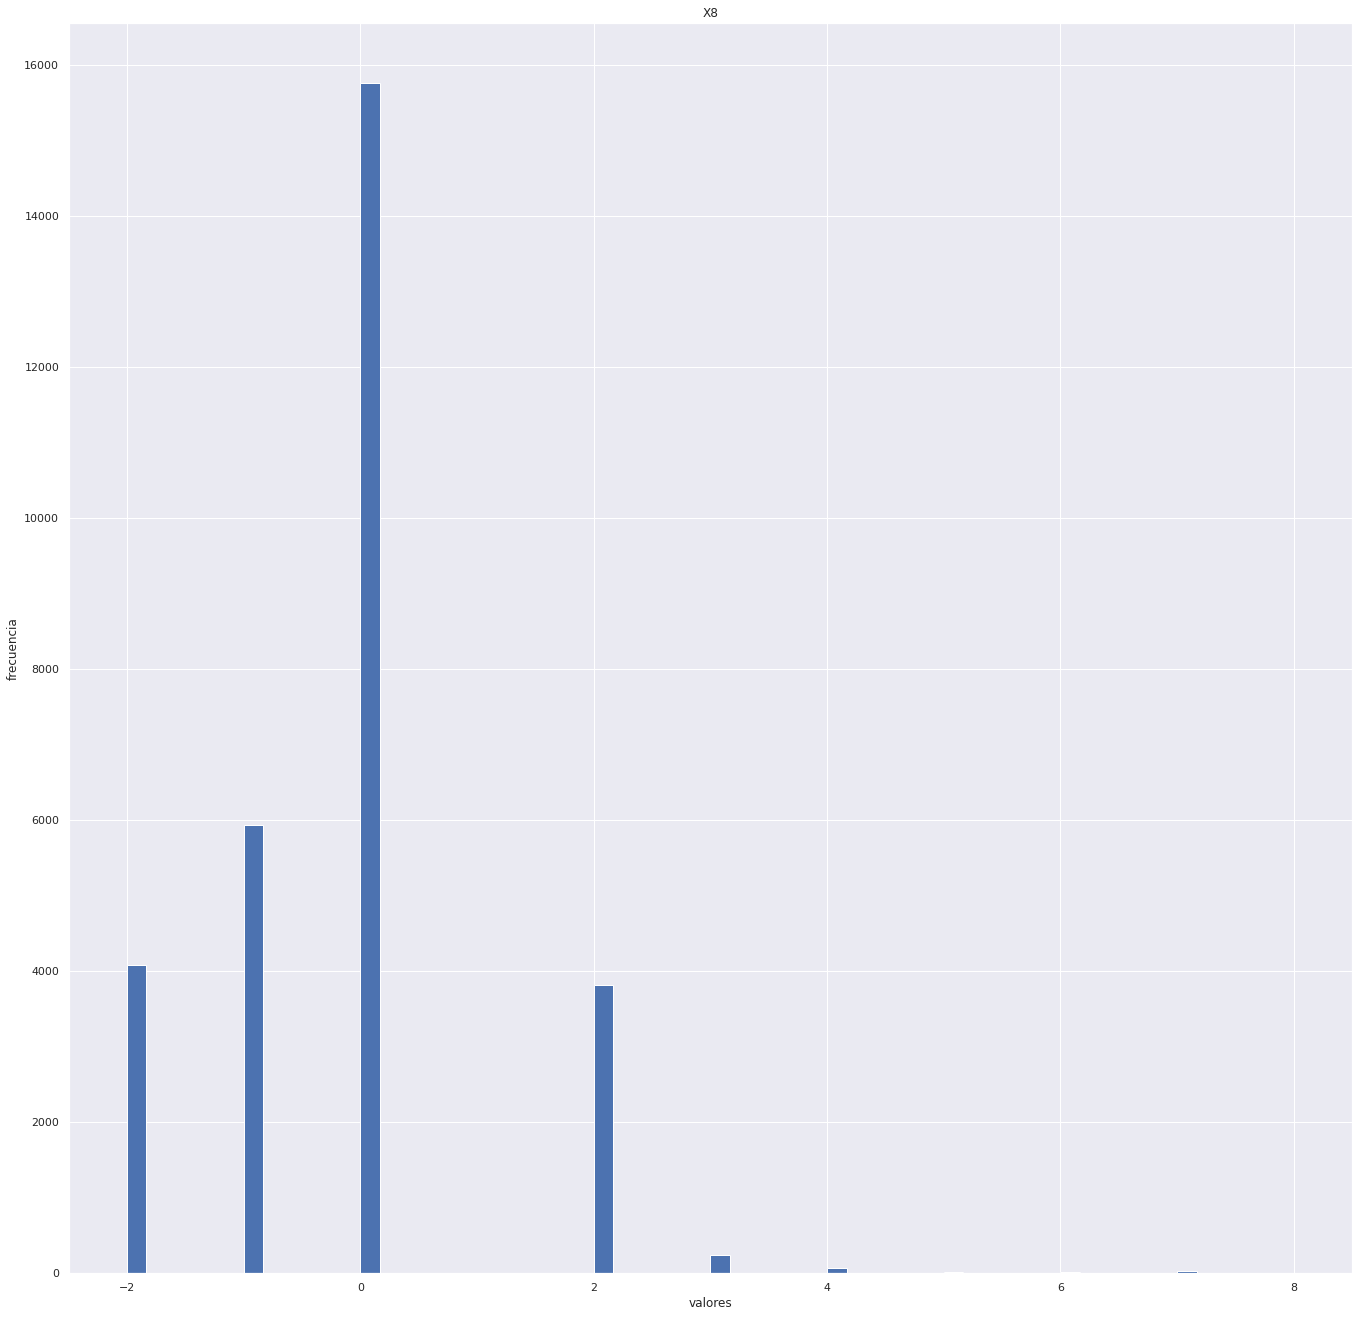

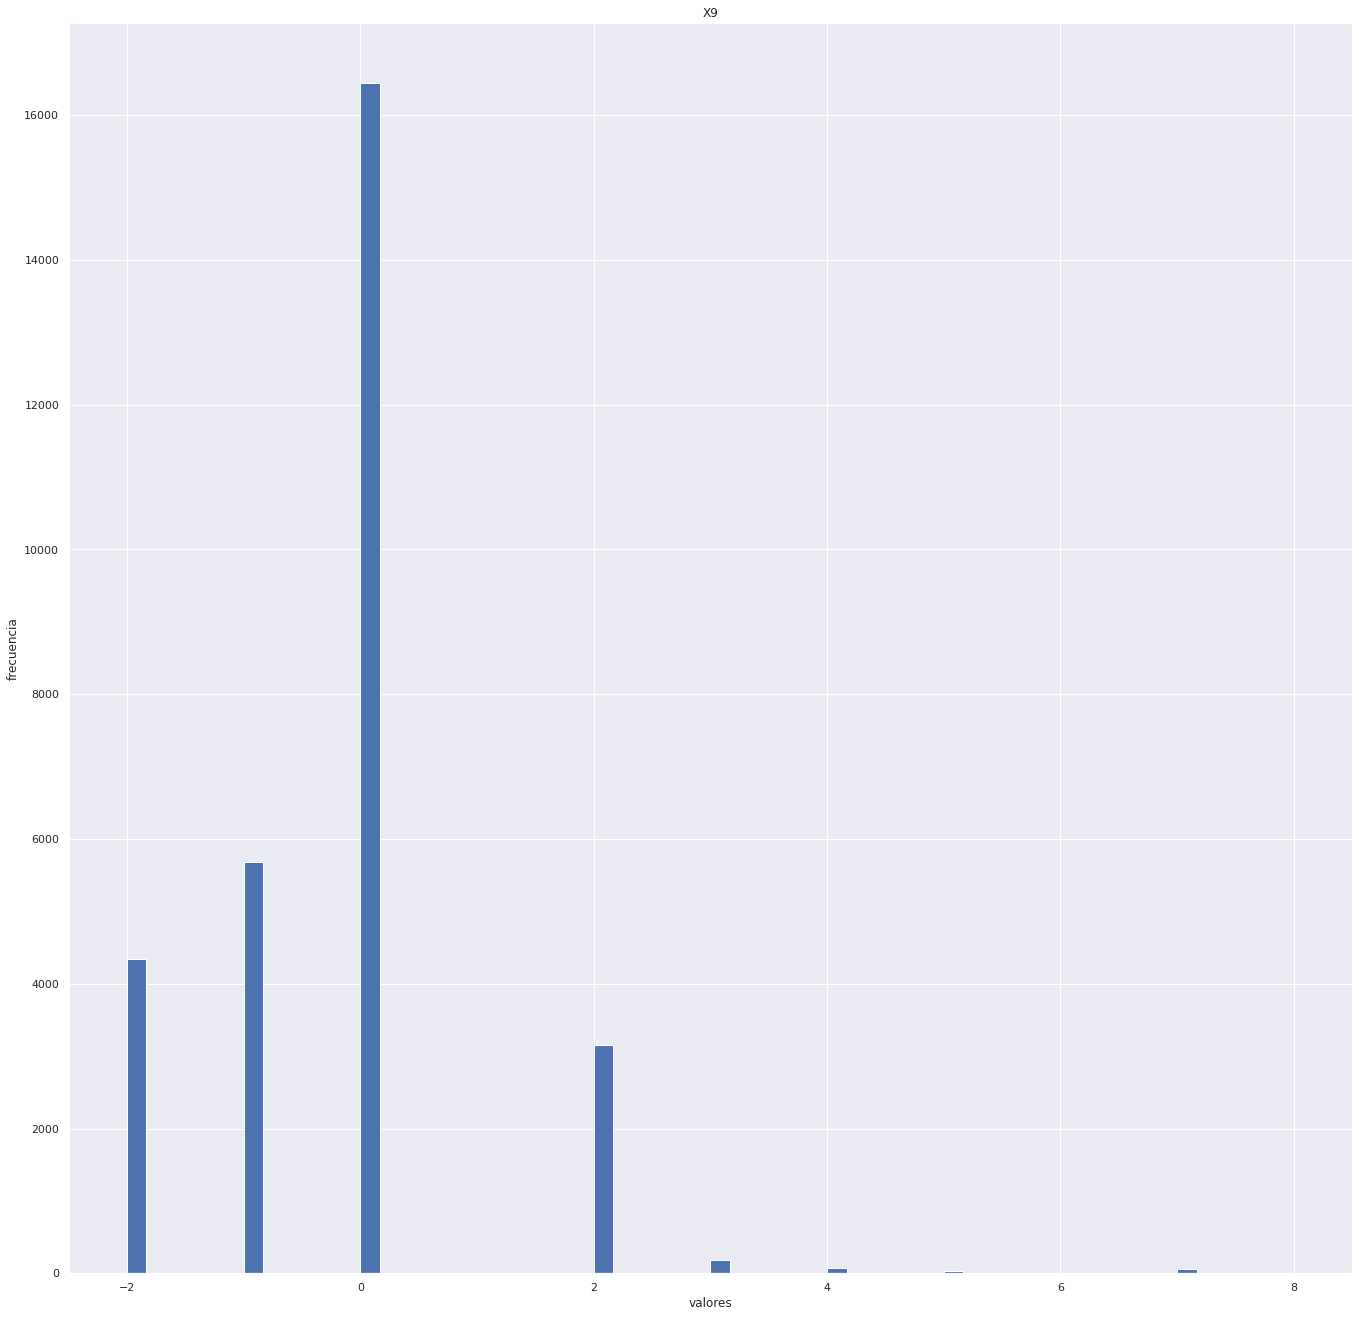

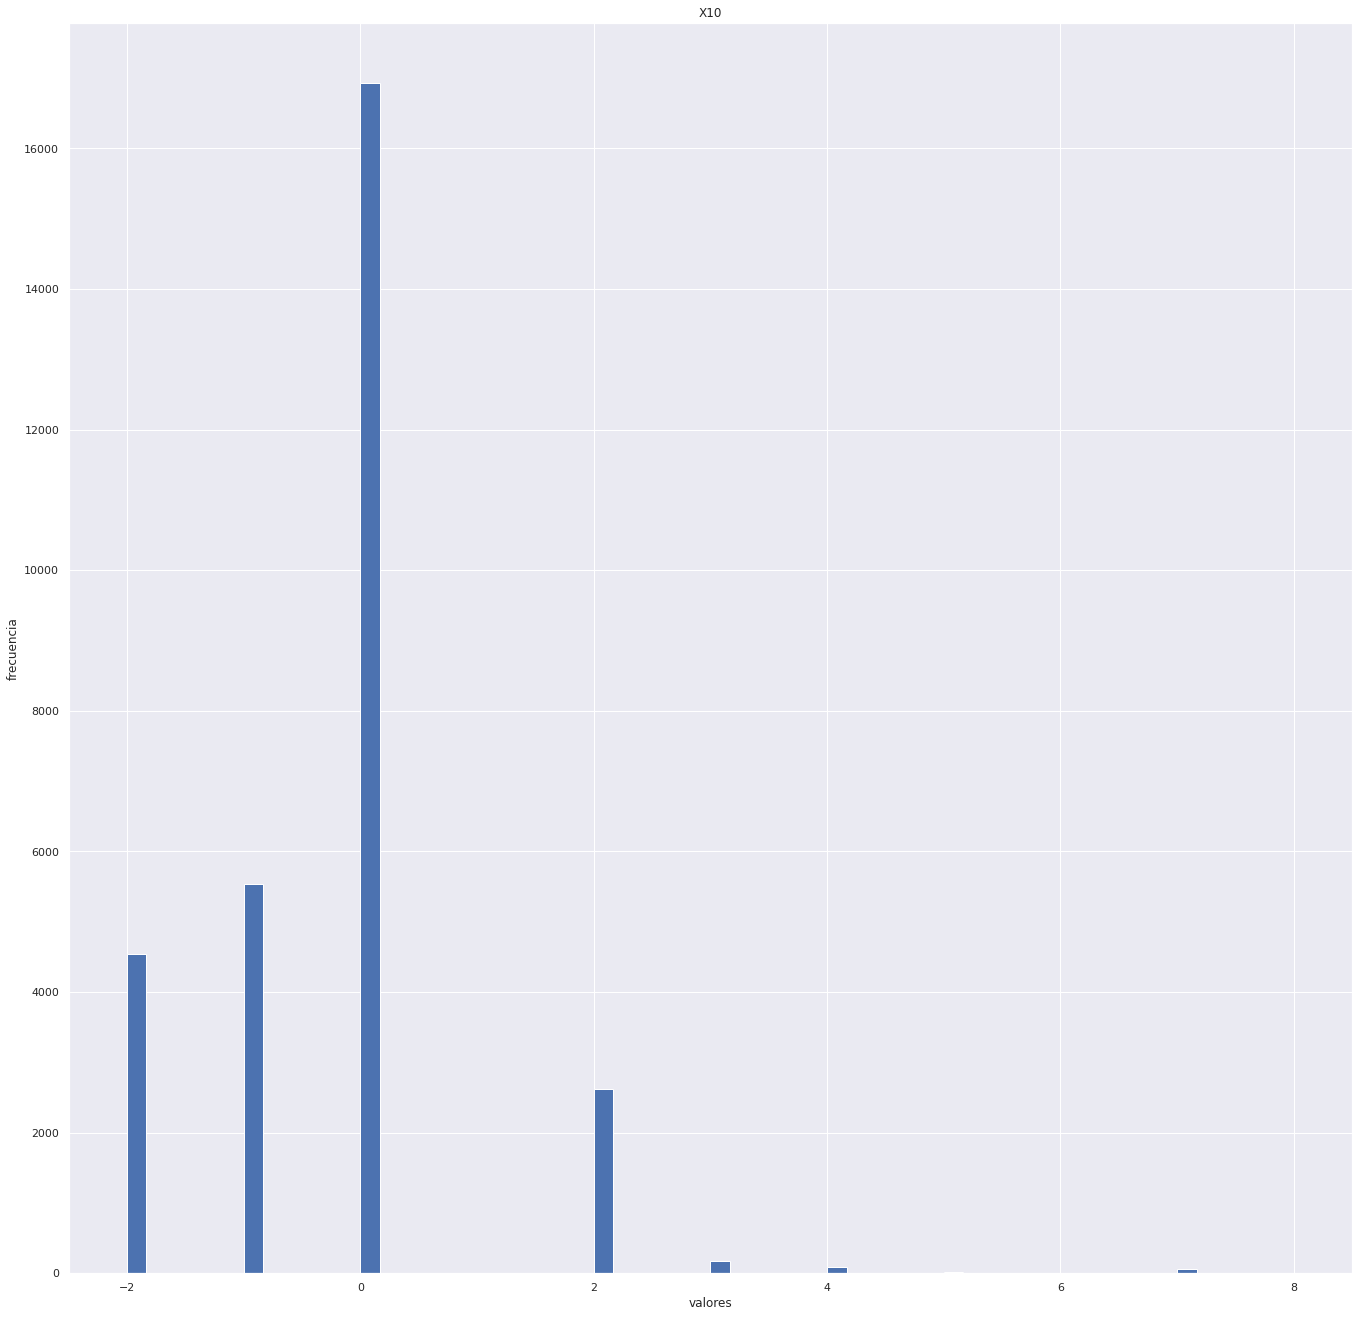

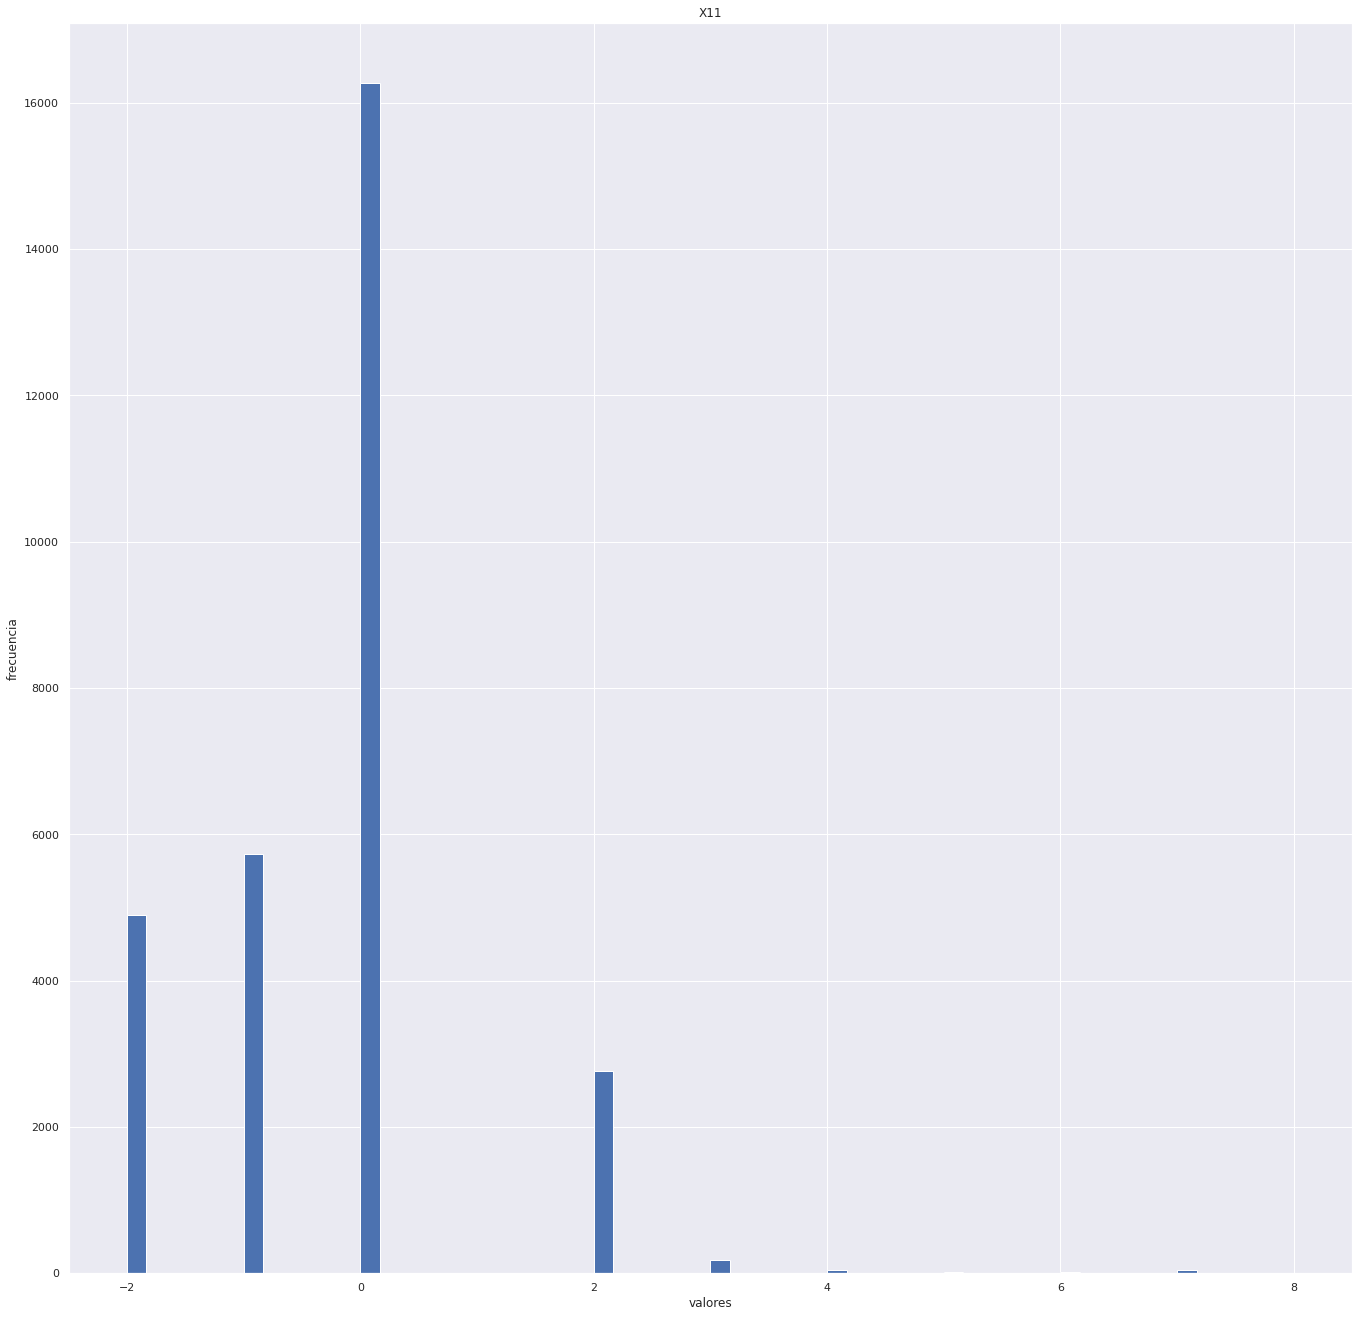

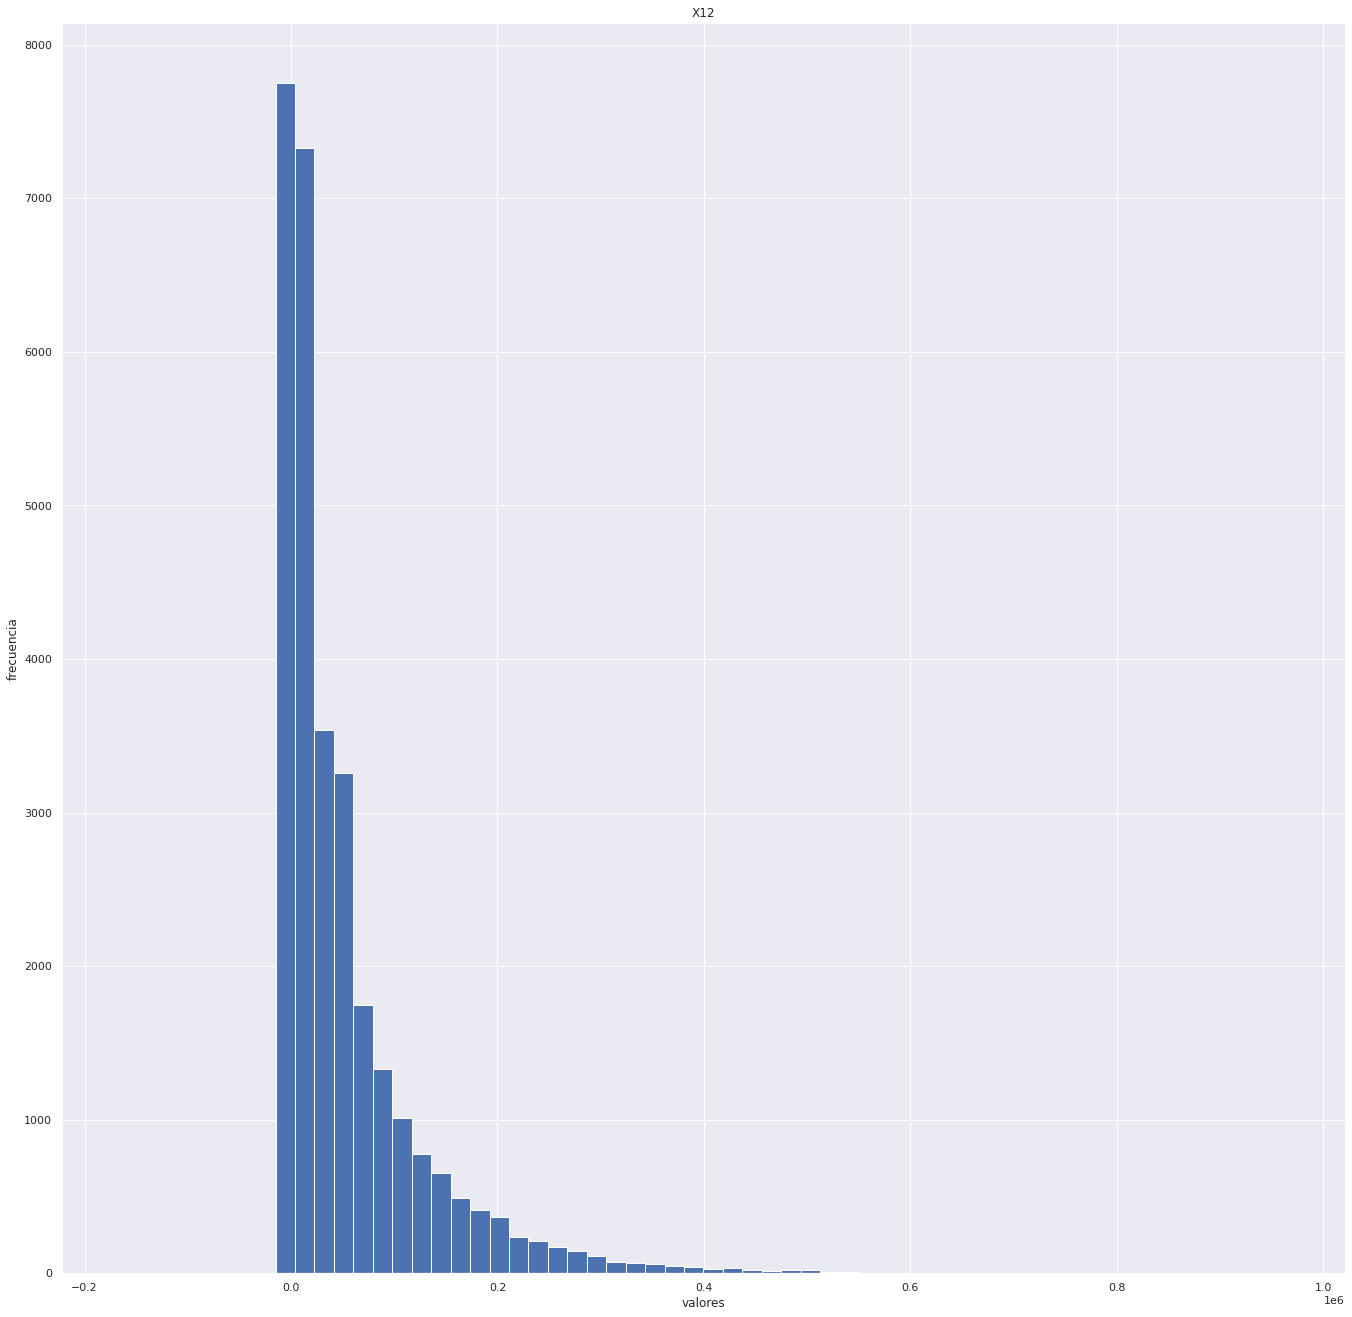

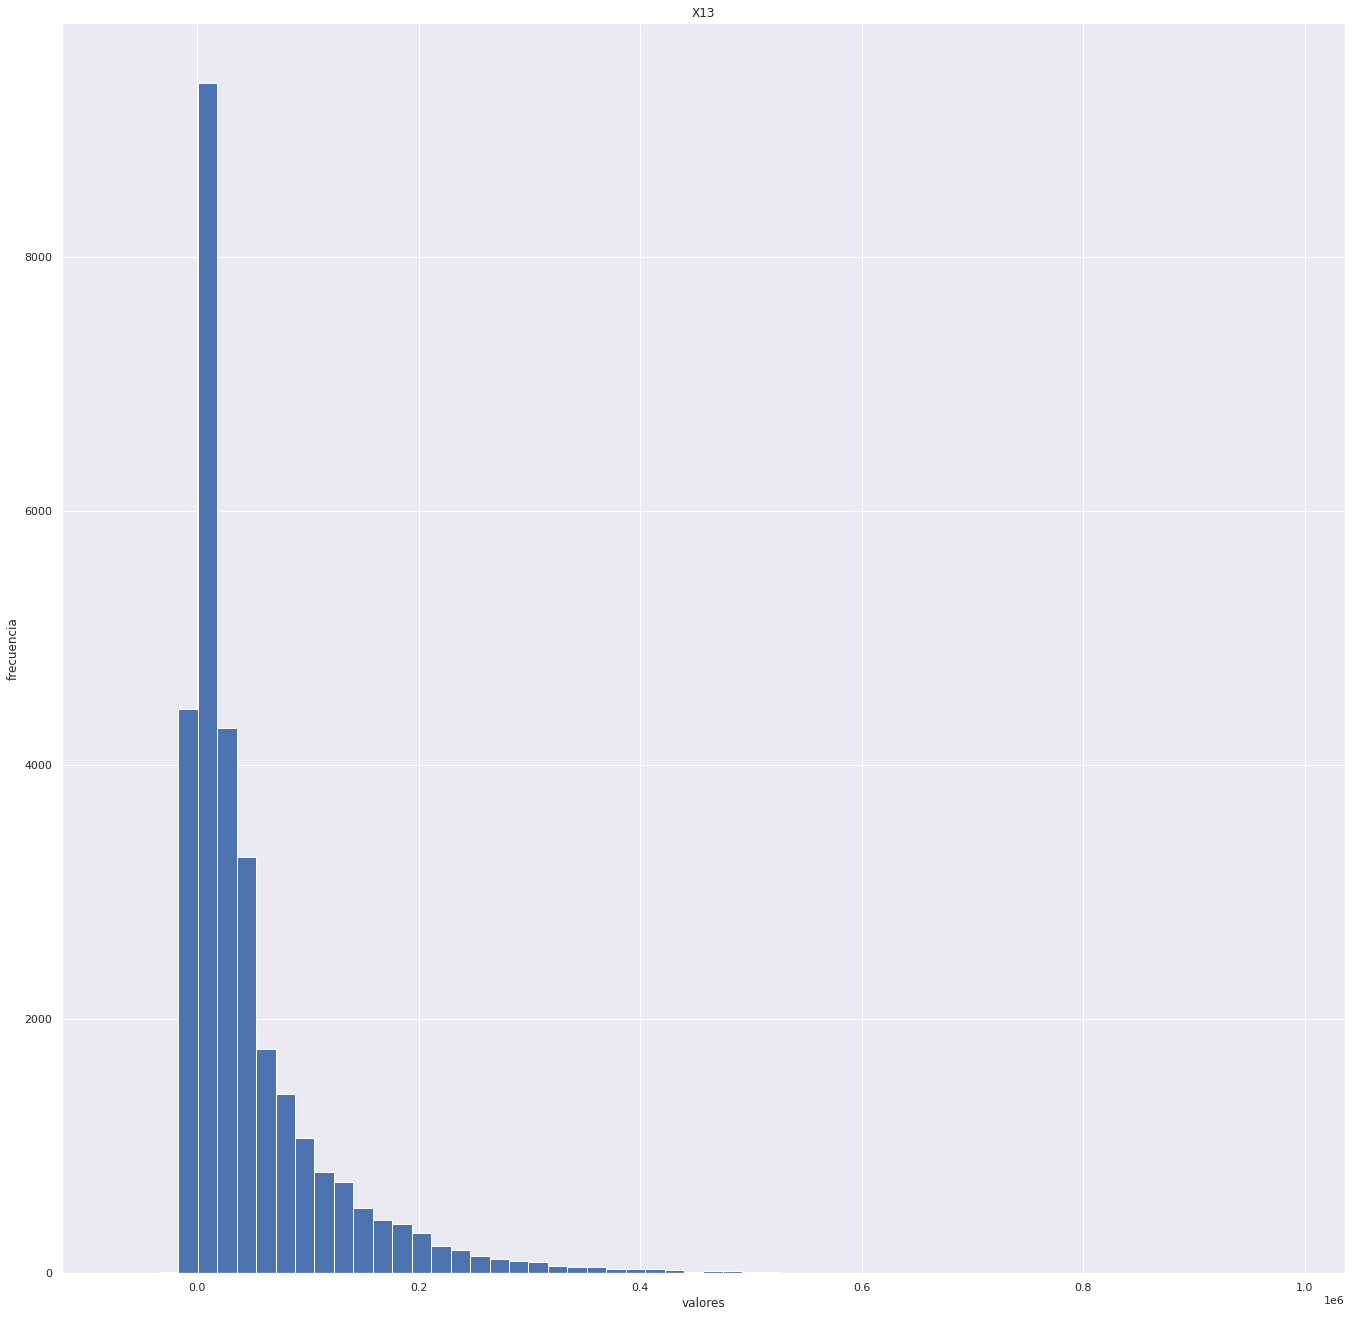

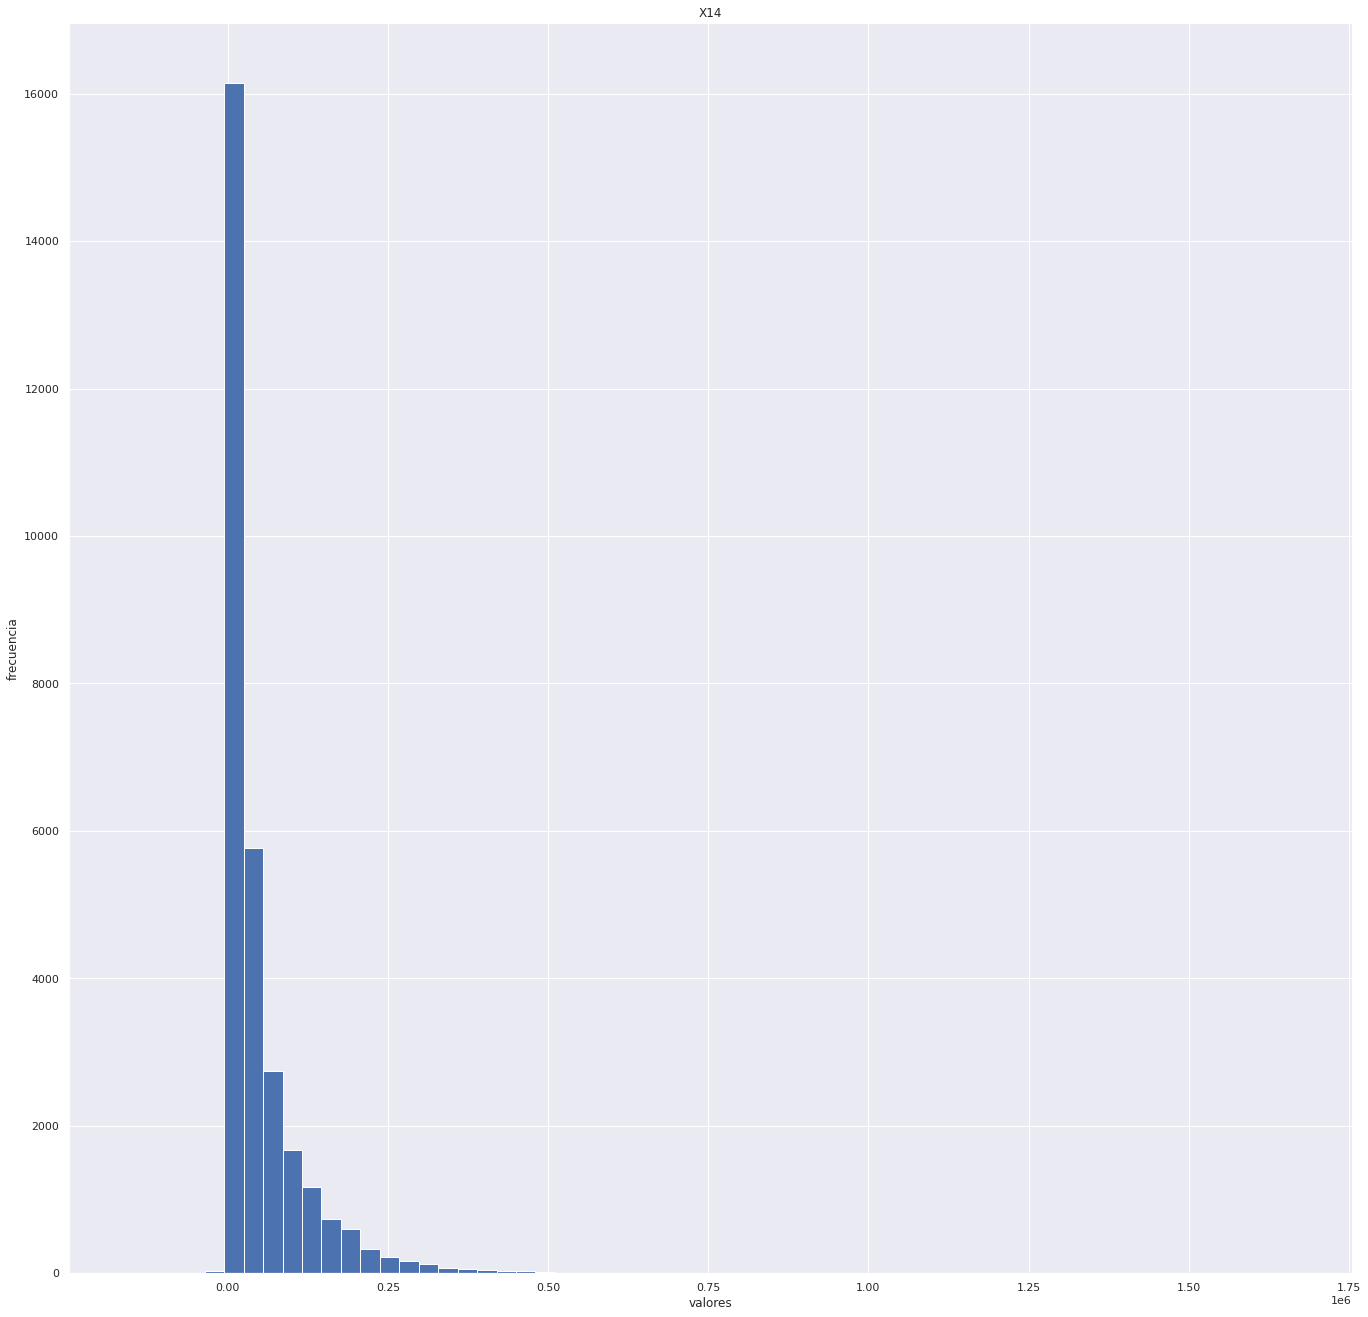

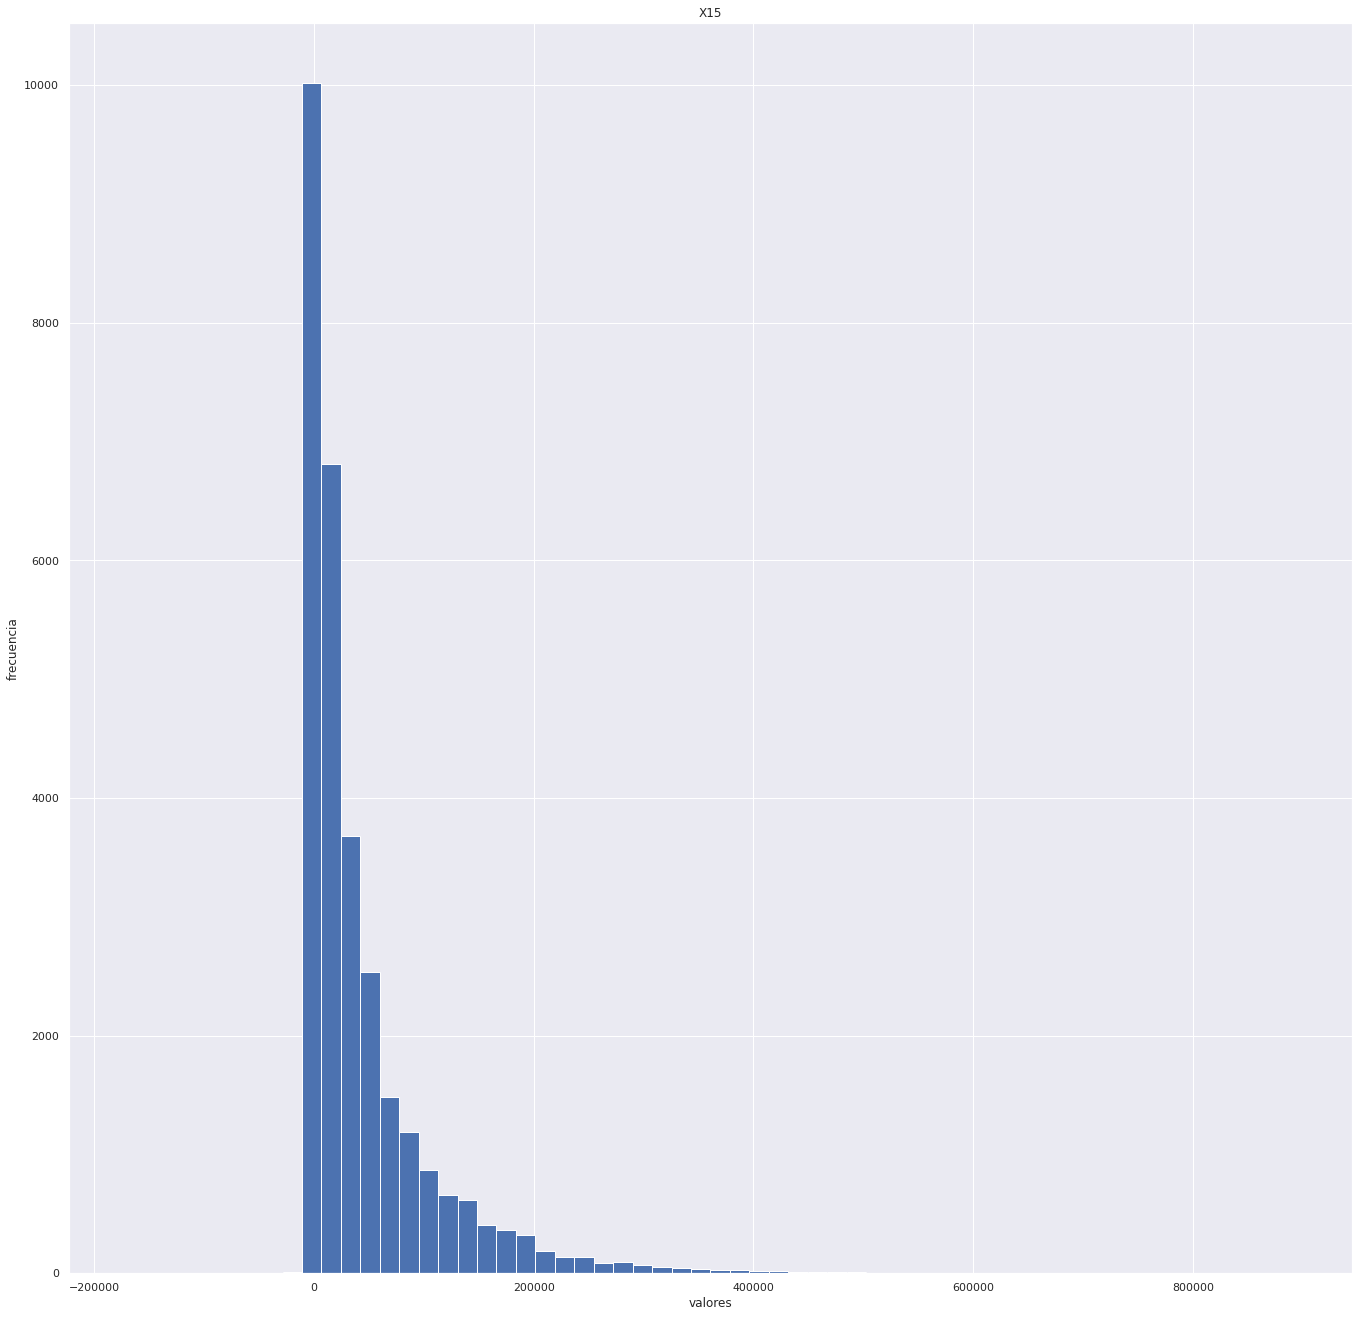

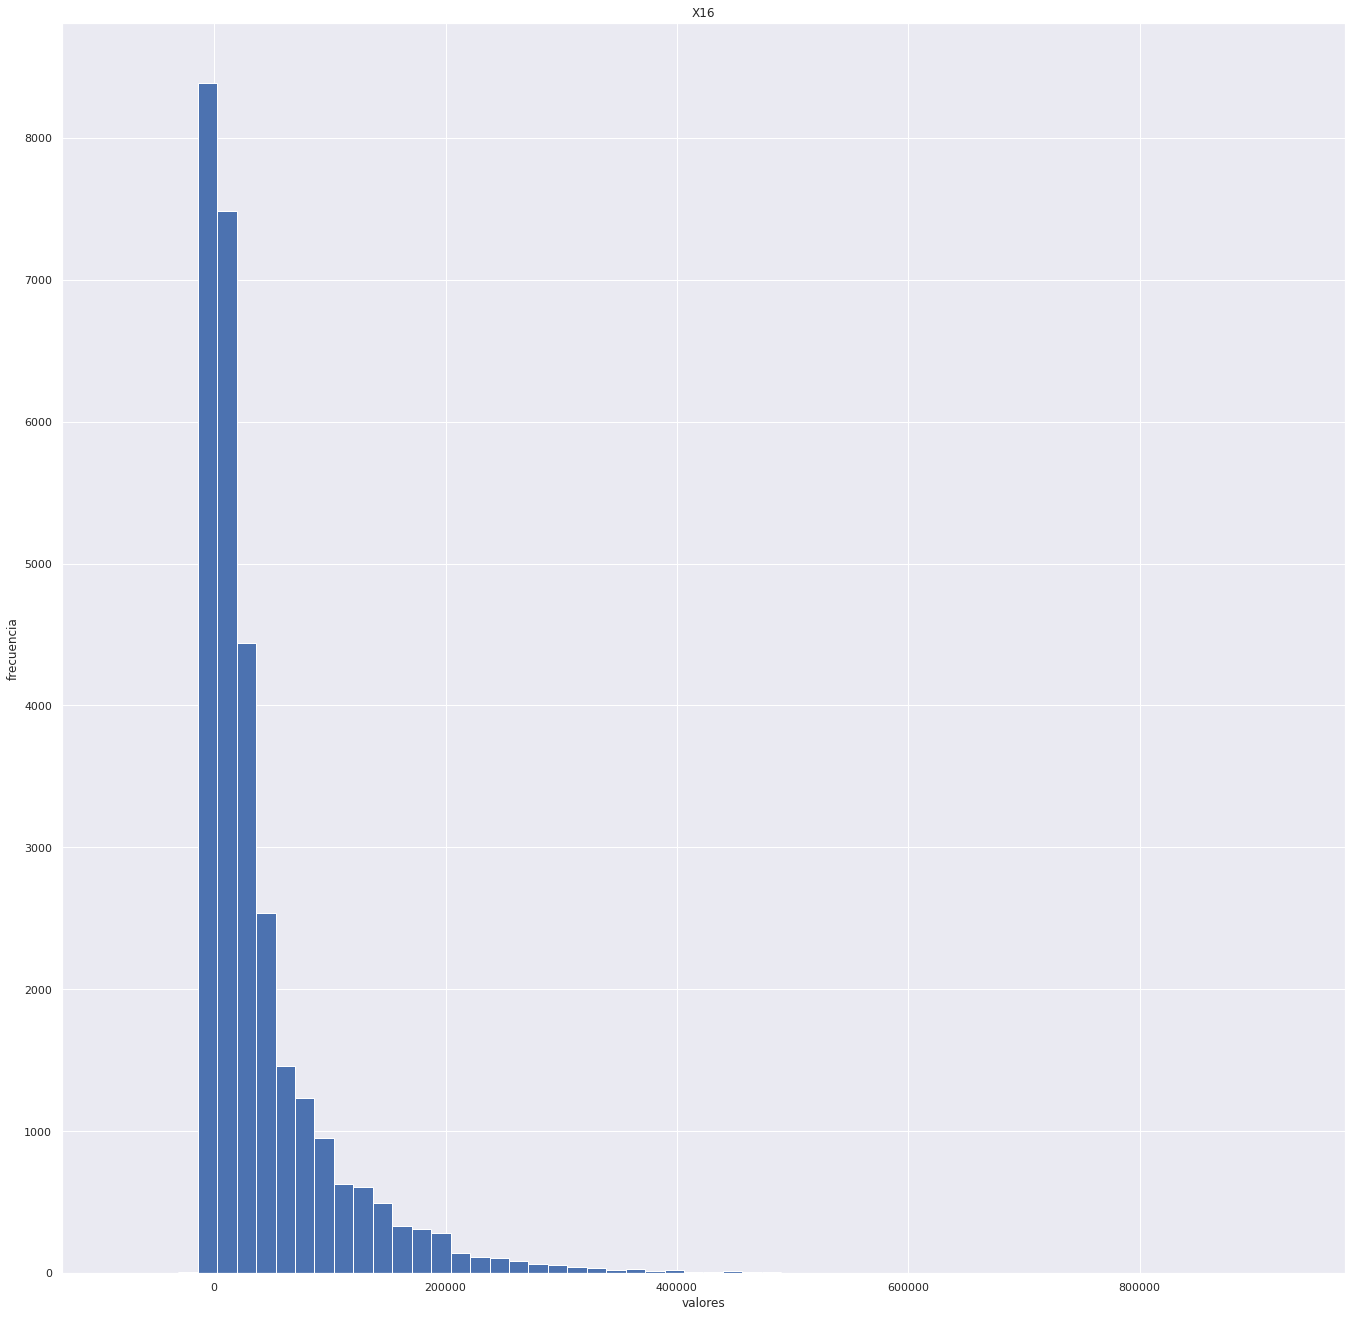

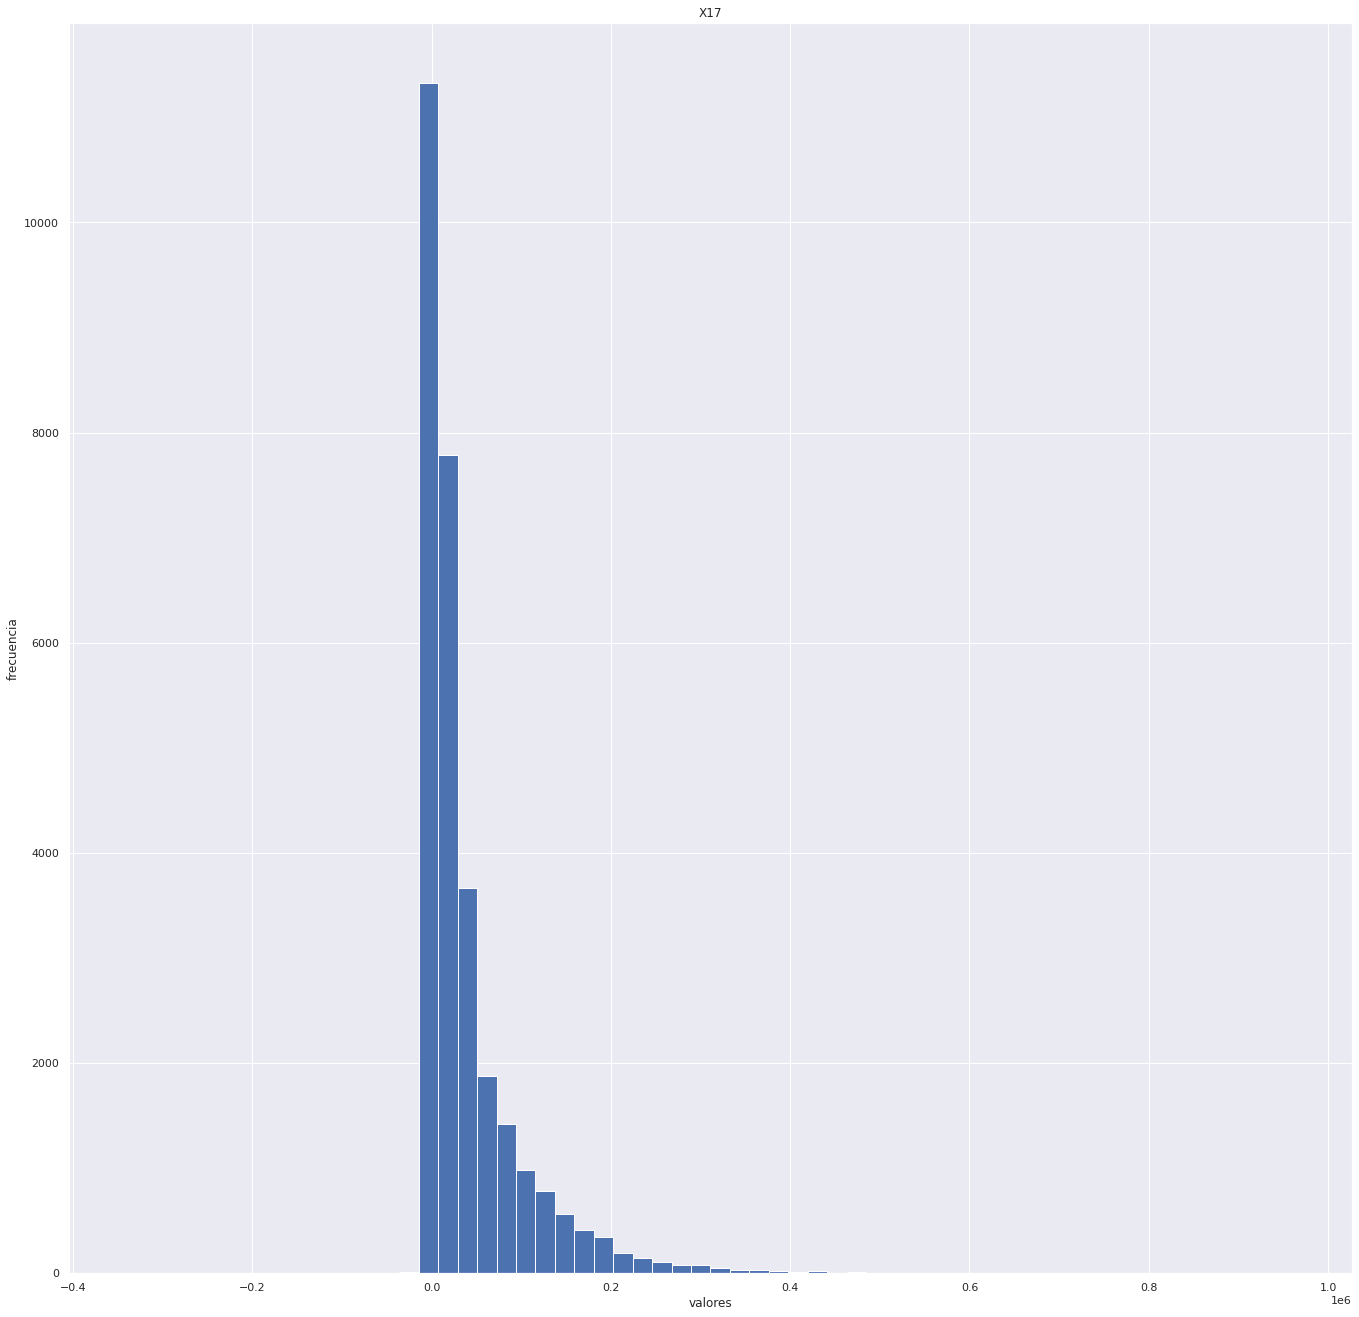

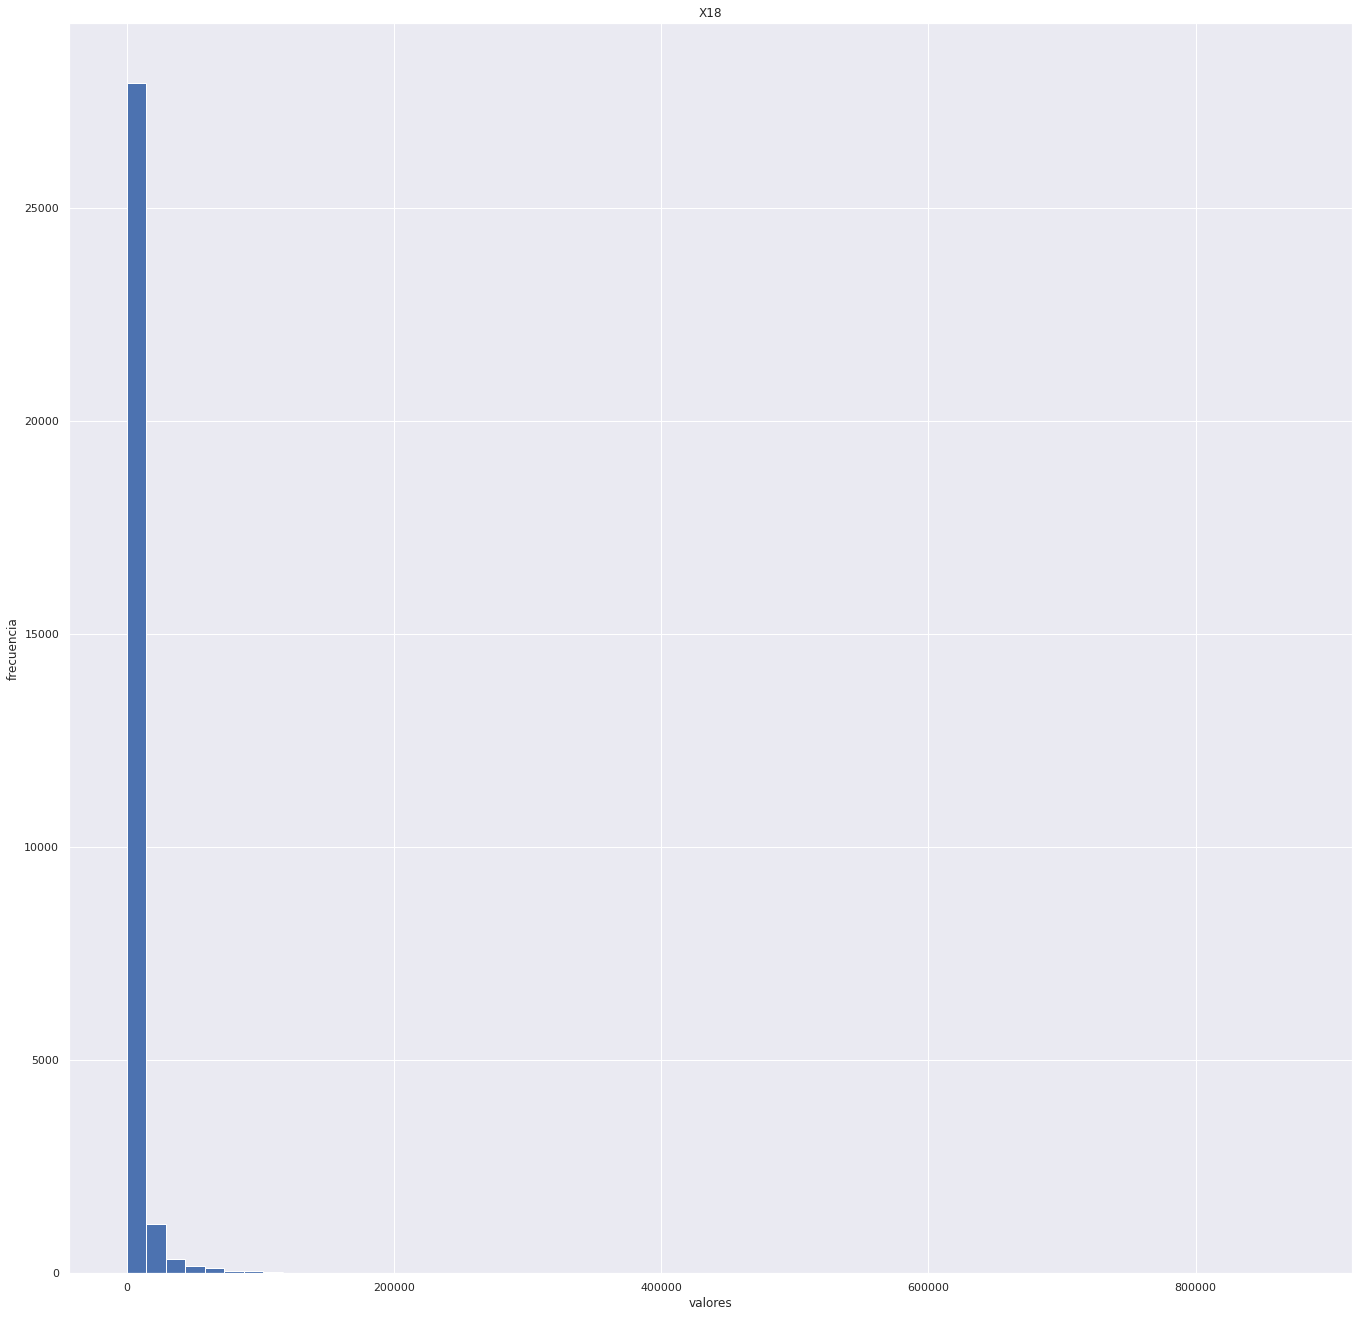

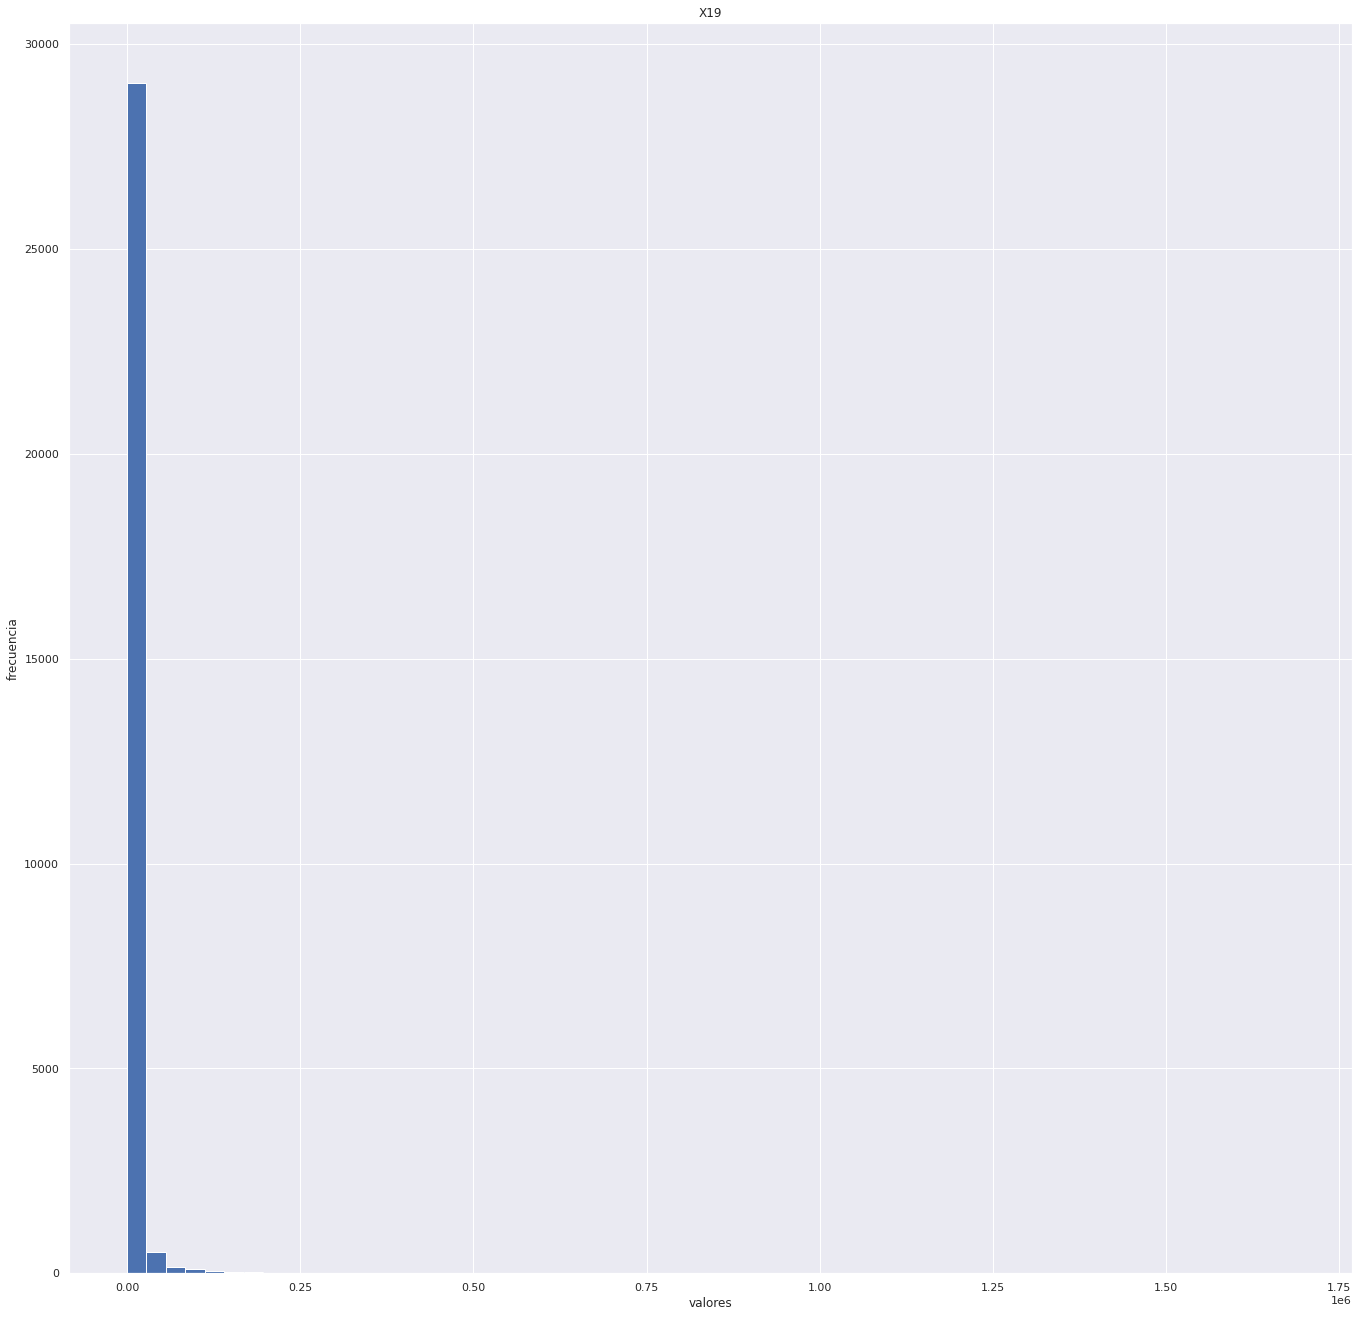

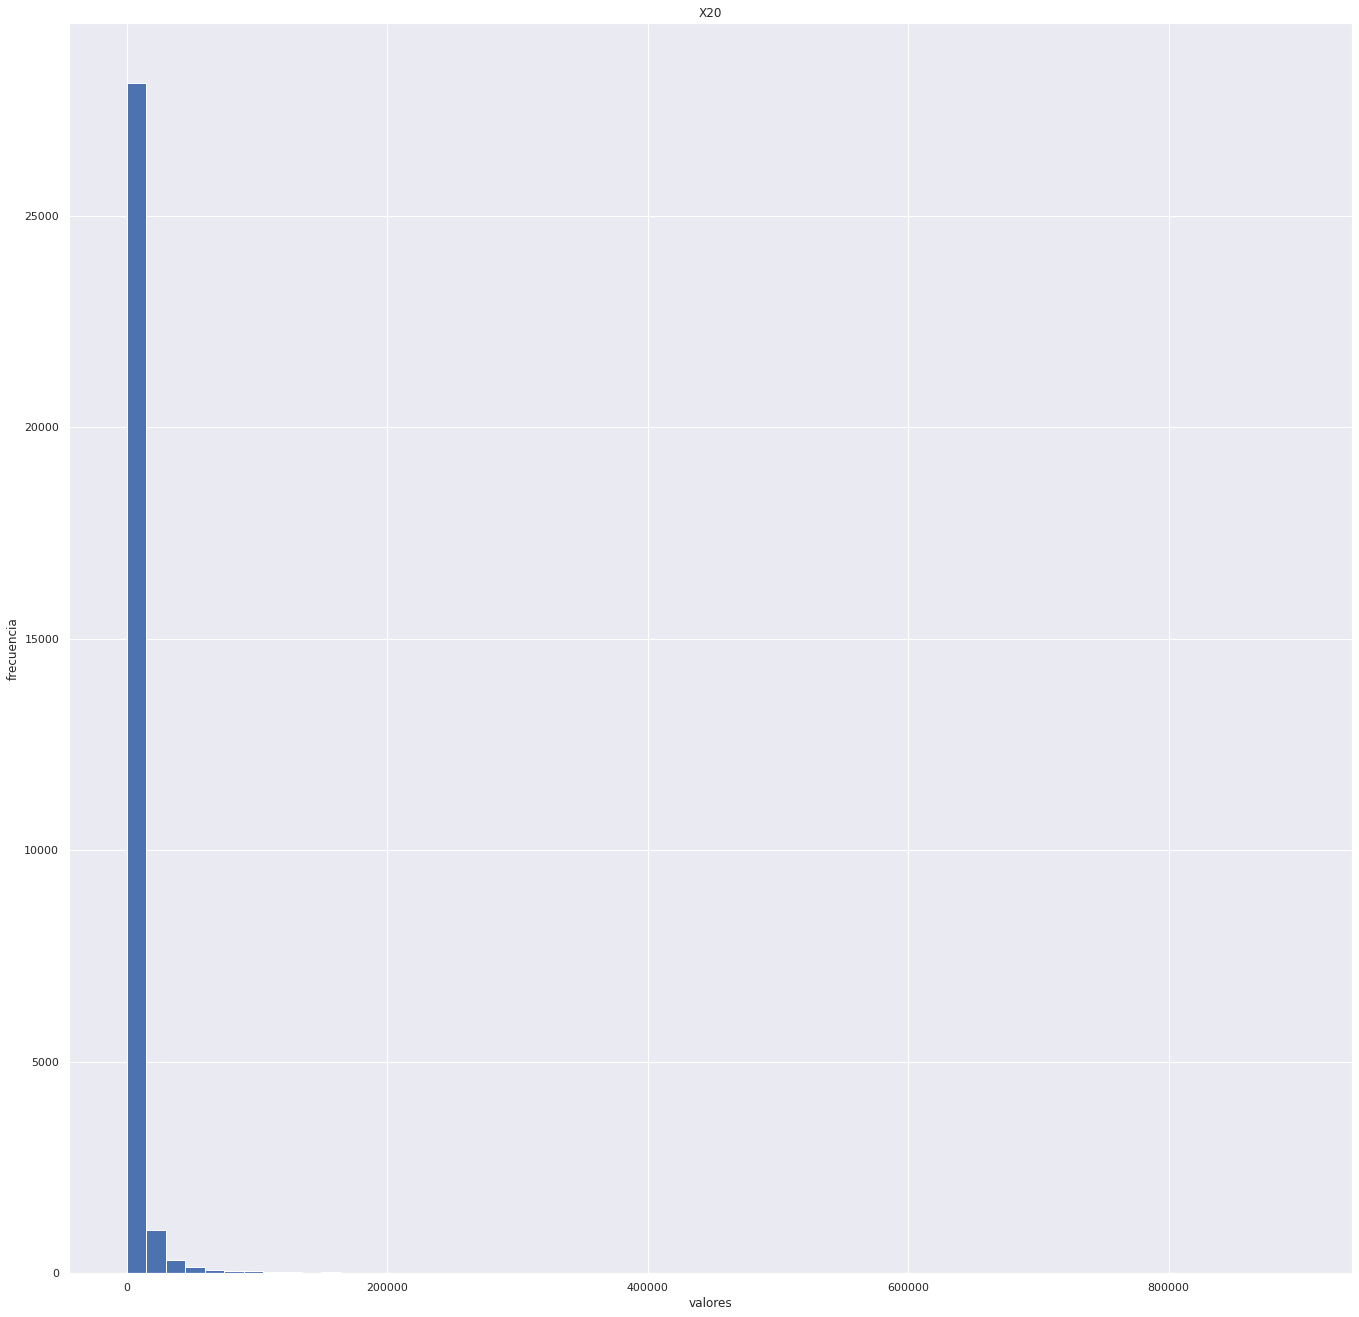

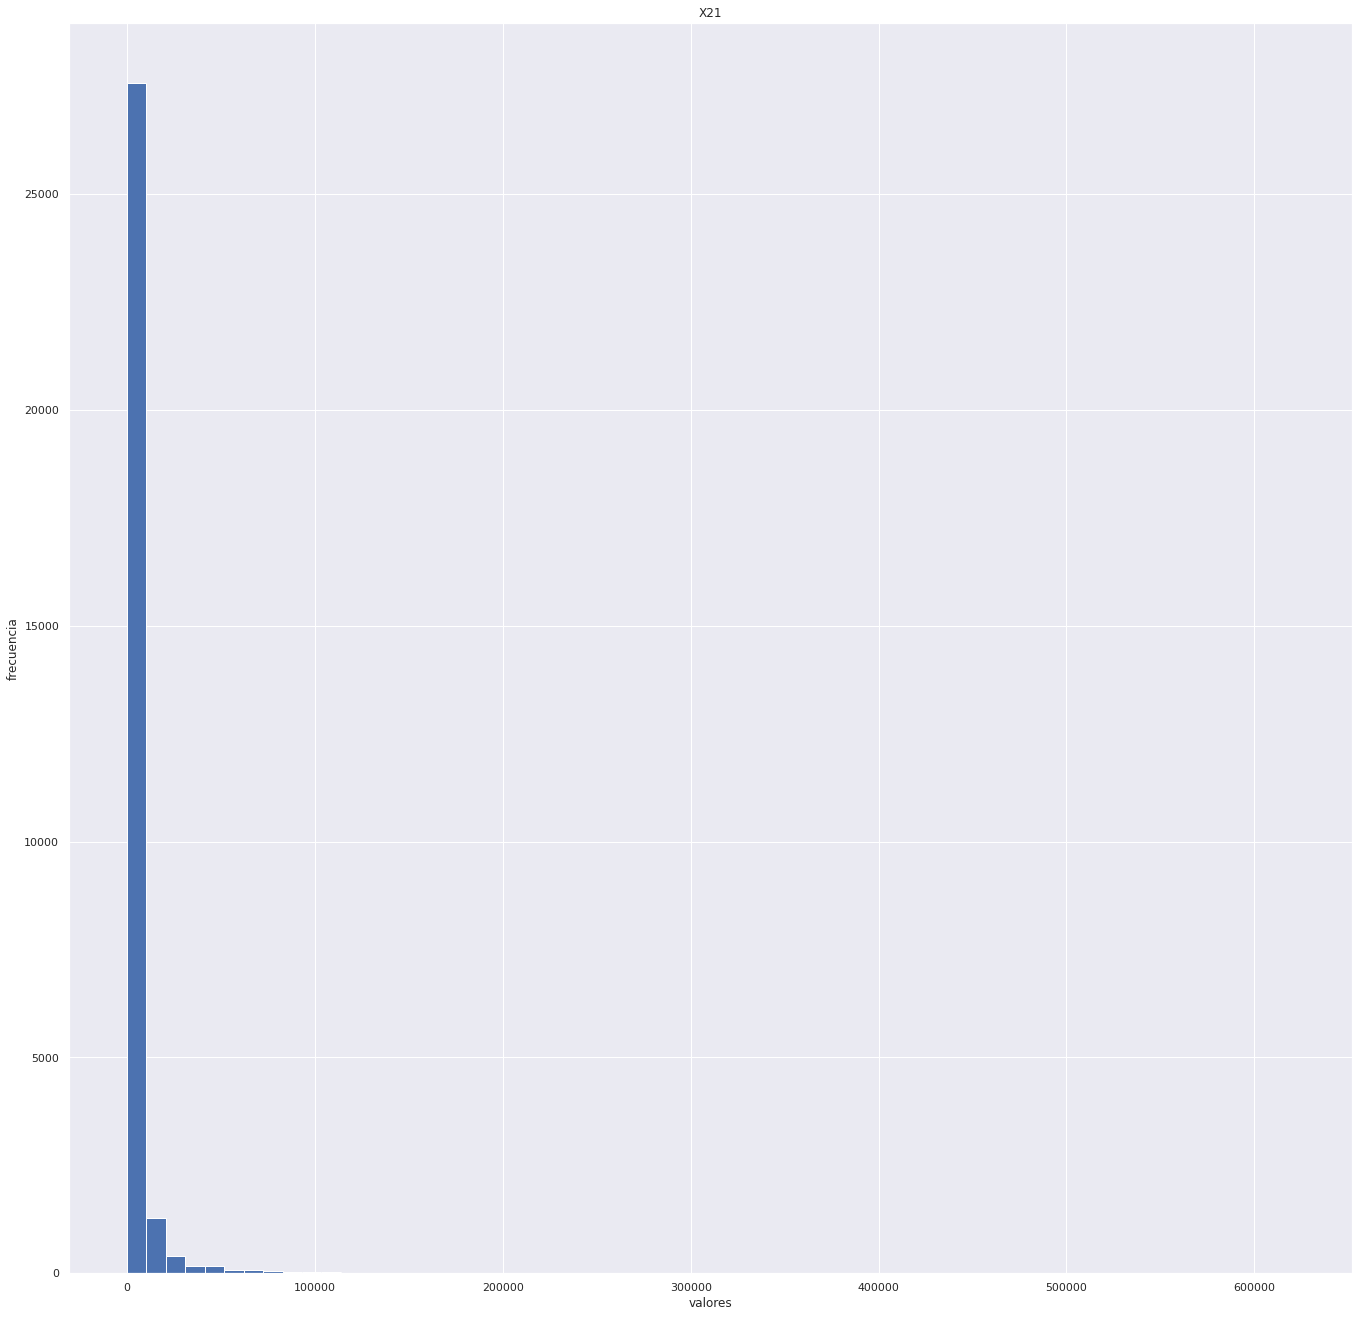

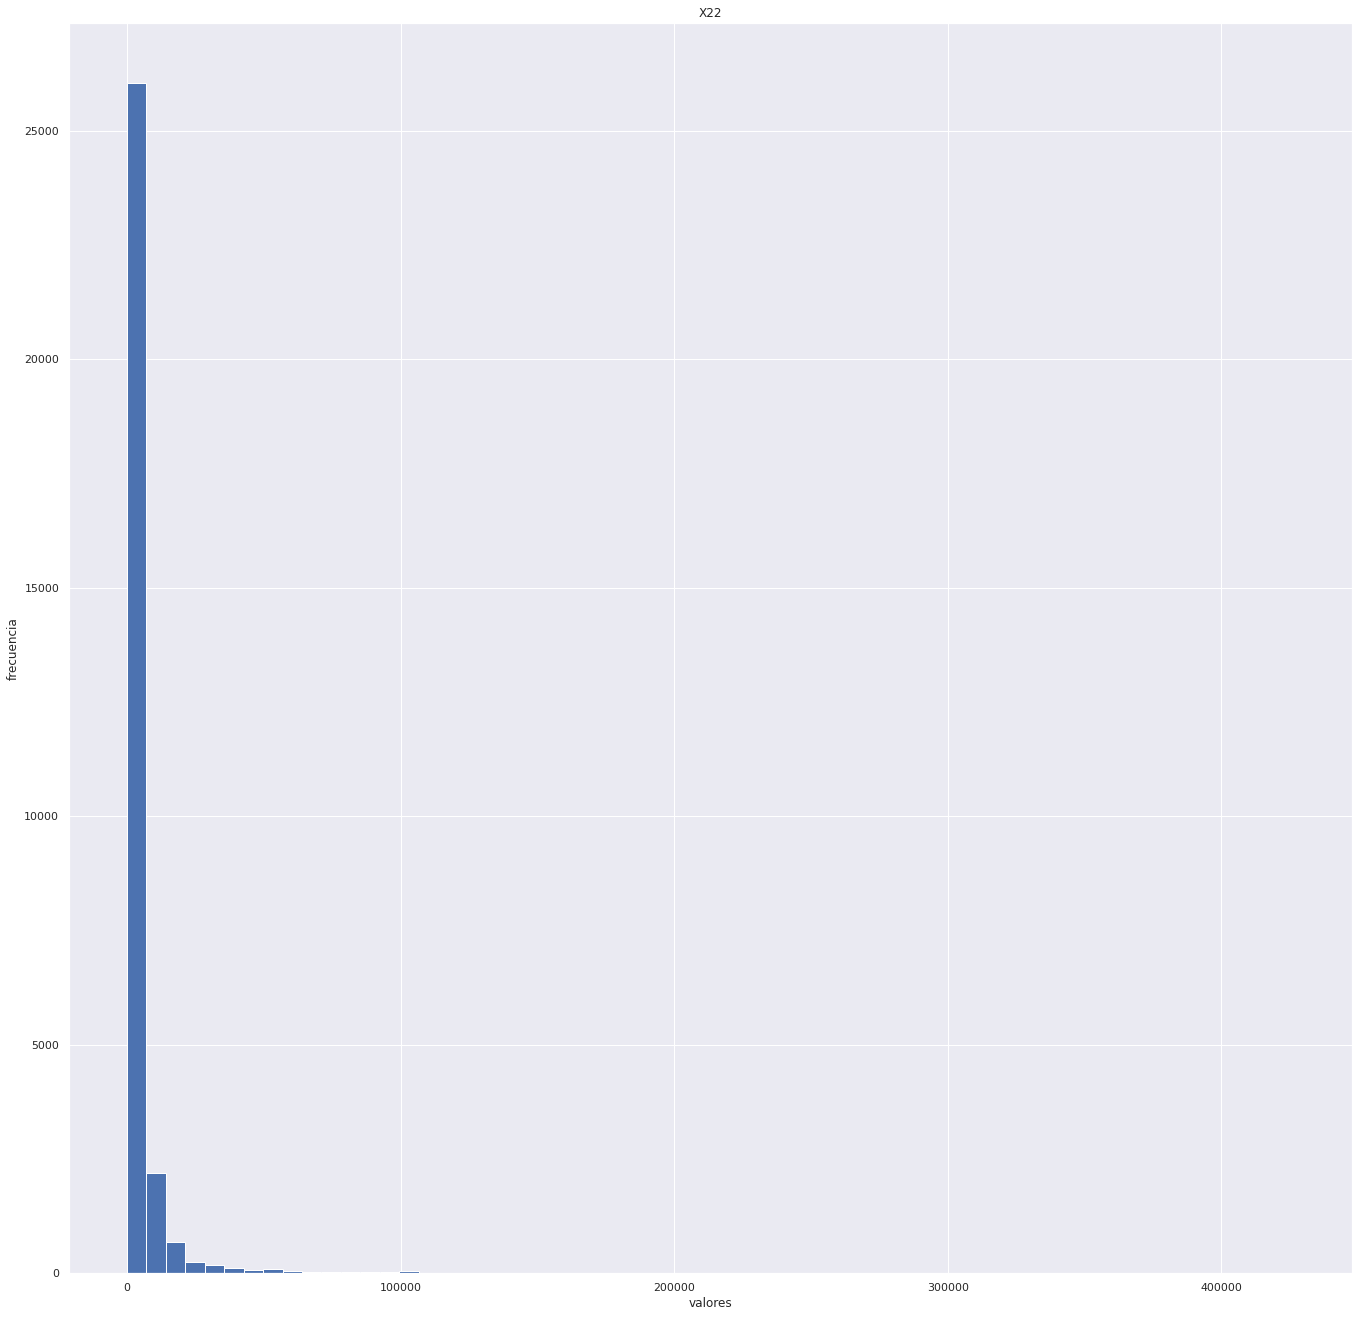

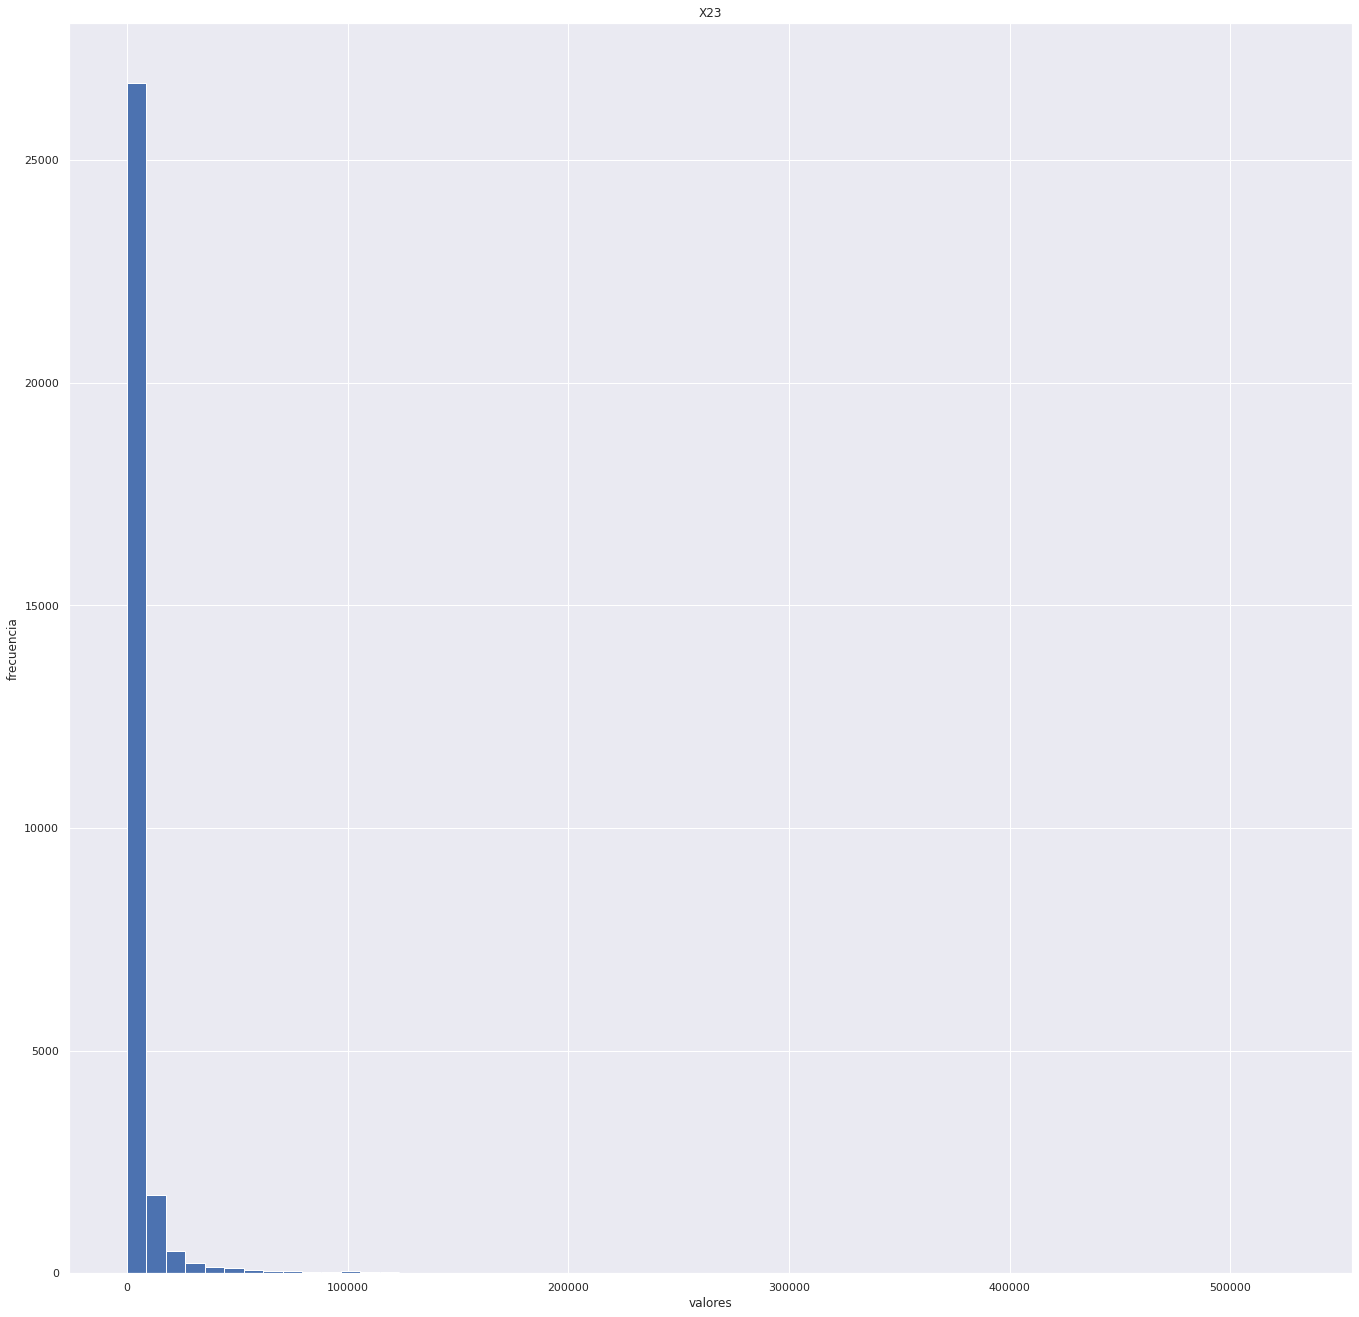

In [42]:
#df, df_ns, df_scaled = inicializar()
sns.set(rc={'figure.figsize':(23,23)})

for i in range(0,24):
    #print(comps_df[comps_df.columns[i]].abs()) 
    plt.hist(df[df.columns[i]], 60) #HISTOGRAMAS
    plt.ylabel('frecuencia')
    plt.xlabel('valores')
    plt.title(df.columns[i])
    plt.show()

## Ejercicio 9 Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.


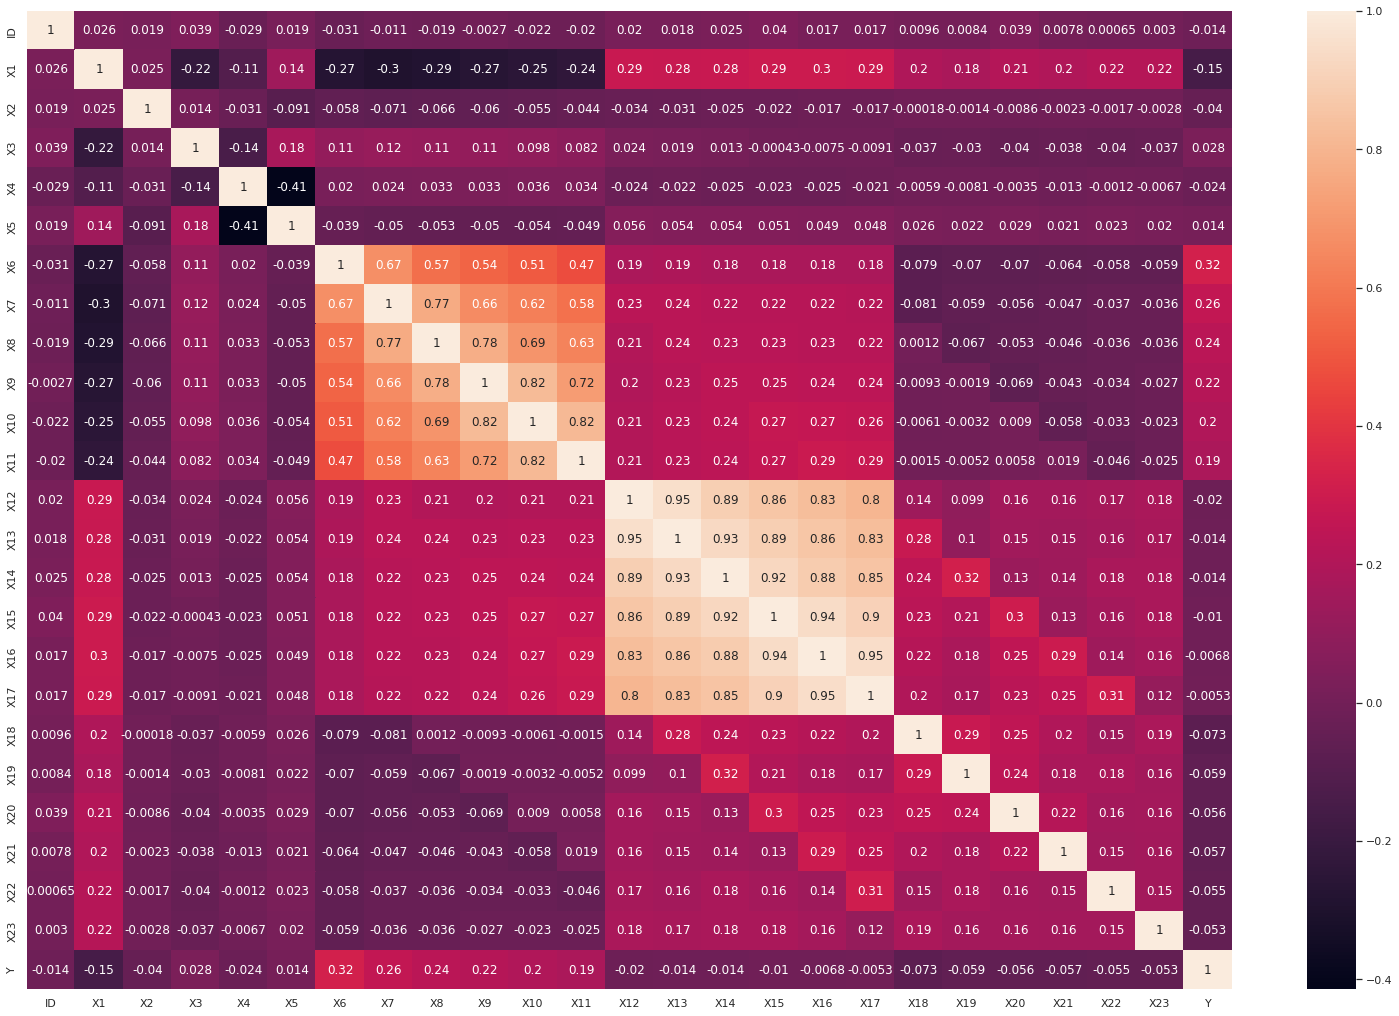

In [43]:
sns.set(rc={'figure.figsize':(27,18)}) #Configurar tamño de figura
sns.heatmap(df.corr(), annot = True) #Mapa de calor con anotaciones numericas

In [62]:
df = df.rename(columns = {'X1':'Monto_credito',
                        'X2':'Género',
                        'X3':'Nivel_Educativo',
                        'X4':'Estado_Civil',
                        'X5':'Edad',
                        'X6':'Pago_sep',
                        'X7':'Pago_ago',
                        'X8':'Pago_jul',
                        'X9':'Pago_jun',
                        'X10':'Pago_may',
                        'X11':'Pago_abr',
                        'X12':'Amortiz_sep',
                        'X13':'Amortiz_ago',
                        'X14':'Amortiz_jul',
                        'X15':'Amortiz_jun',
                        'X16':'Amortiz_may',
                        'X17':'Amortiz_abr',
                        'X18':'Pago_prev_sep',
                        'X19':'Pago_prev_ago',
                        'X20':'Pago_prev_jul',
                        'X21':'Pago_prev_jun',
                        'X22':'Pago_prev_may',
                        'X23':'Pago_prev_abr',
                          'Y': 'Acreditado'}, inplace = False)
df.dropna(inplace  = True) #Borramos los NaN de la BD
df_ns = df.iloc[:,:] 
df_ns.drop(columns={'ID',
                'Género',
                'Nivel_Educativo',
                'Estado_Civil',
                'Pago_sep',
                'Pago_ago',
                'Pago_jul',
                'Pago_jun',
                'Pago_may',
                'Pago_abr',
                'Acreditado'},
                inplace = True)
#Para escalar los datos, vamos a usar el StandardScaler de la librería scikit.
scaler = StandardScaler()
scaled = scaler.fit_transform(df_ns)
#Convertimos la información anterior en un dataframe, donde las columnas son los campos originales
df_scaled = pd.DataFrame(scaled, columns=df_ns.columns)
#return df, df_ns, df_scaled

Variables con mayor varianza ["Amortiz_sep", "Amortiz_ago", "Amortiz_jul","Amortiz_jun","Amortiz_may","Amortiz_abr"]


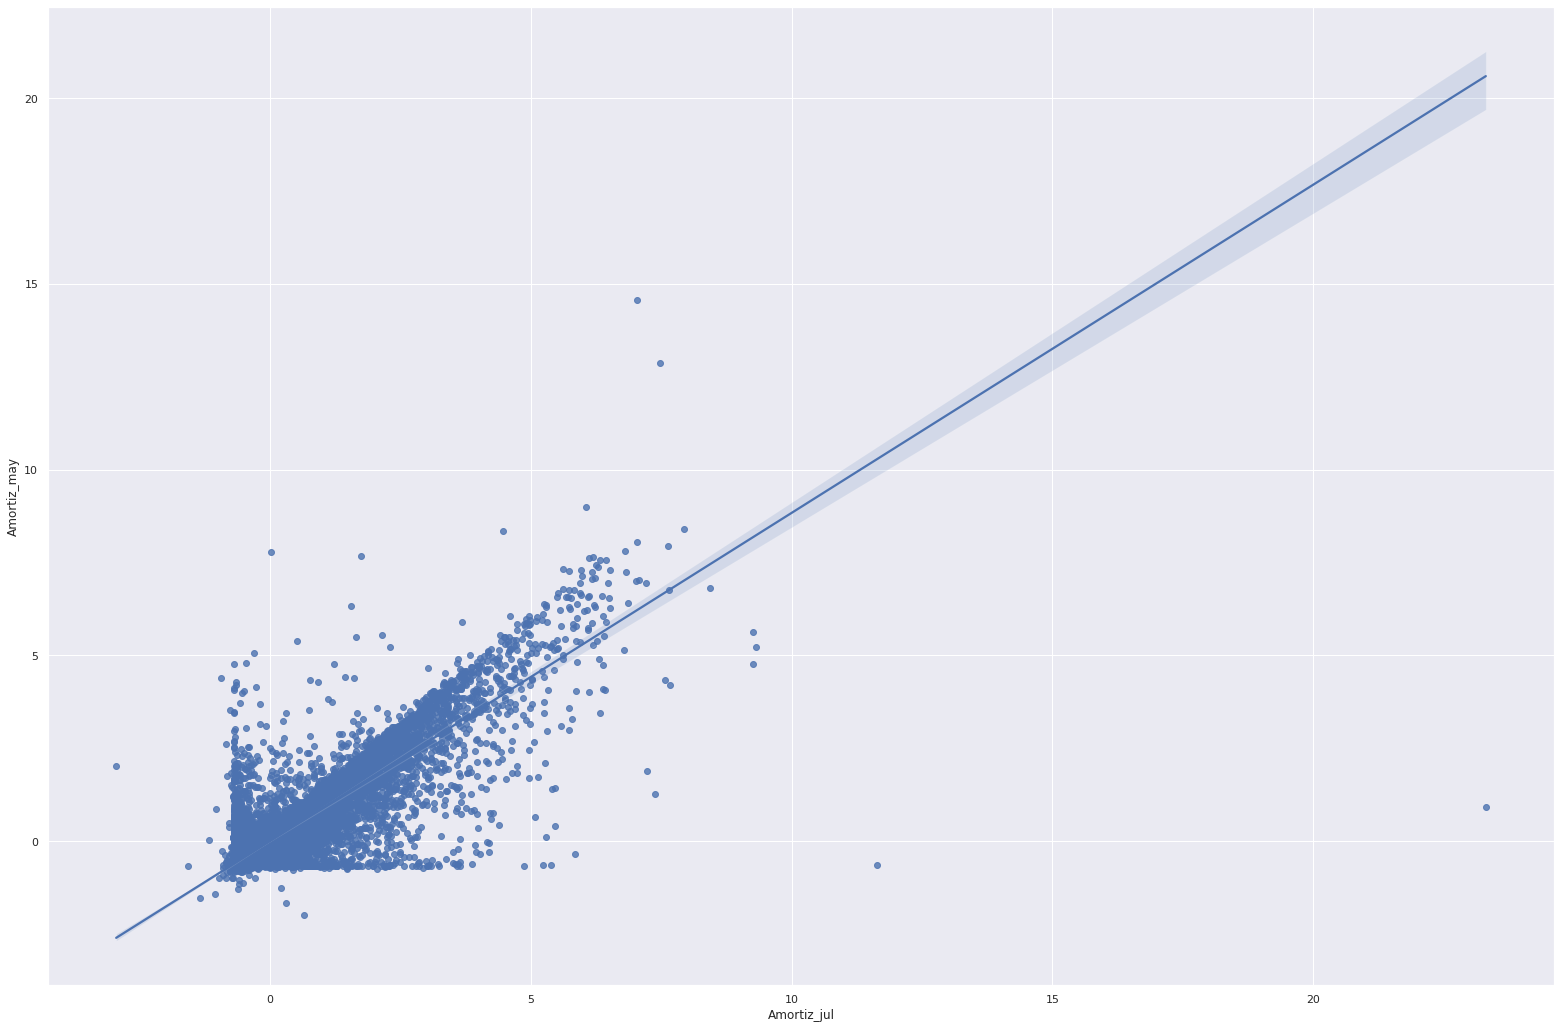

In [63]:
#inicializar()
import seaborn as sns
p = sns.regplot(data = df_scaled,  
                x = df_scaled.Amortiz_jul, #df_num.Amortiz_ago,df_num.Amortiz_sep, df_scaled.Amortiz_ago 
                y = df_scaled.Amortiz_may#f_num.Amortiz_may,df_num.Amortiz_jun]
               ) 
p

Scree plot

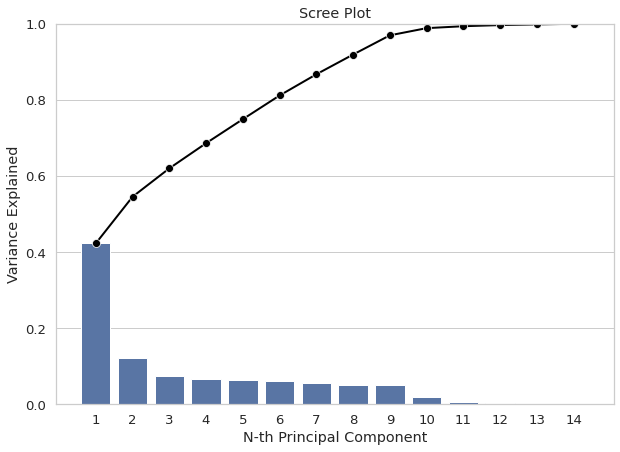

In [64]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

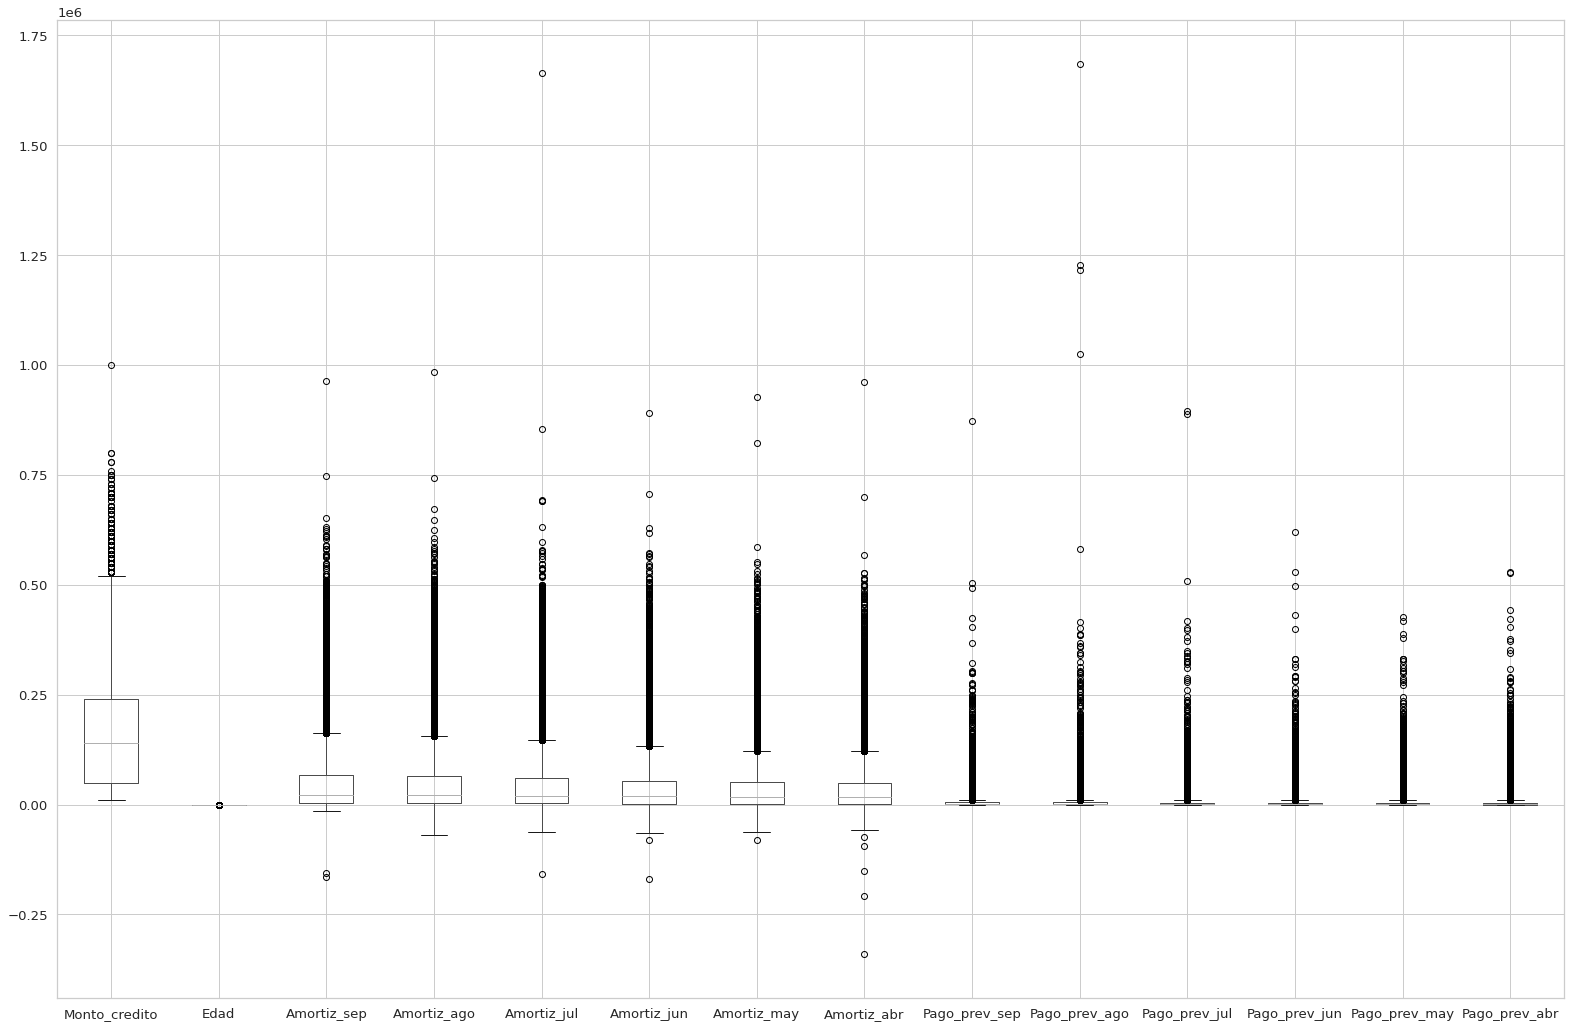

In [65]:
#Datos originales
df.boxplot()

## Ejercicio 10 Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.


Pensando que para ocupar PCA que es para aprendizaje no supervisado se explica los graficos anteriores para la toma de decisiones:
  * El mapa de calor se ocupa para identificar la correlacion entre las variables observando la varianza asi como dependiendo la configuracion del mapa de calor el color entre mas claro o fuerte se obervar las variables con mayor correlacion
  *¨Con la varianza identificada podemos ocupar el scatter plot que es la representacion simbolica con puntos con dos variables para identificar el comportamiento de la correlacion, en este caso se observa que es positiva, tambien se acepta negativa, en el caso que no se aprecie niguna podemos inferir que no hay demasiada correlacion
  * Con la informacion anterior del mapa de calor y el scatter plot, se puede tomar la decision de realizar el PCA para disminuir las dimensiones ya que existe una correlacion alta entre alguna variables, esto es fundamental para el PCA
  * Scree plot, podemos obervar la varianza explicada para identificar a pártir de que componente se obtiene mas de 70% de la informacion, en este caso a partir de componente 5 podemos observar que se cumple con esta condicion.
  * Con el box plot se aprecia los valores atipicos y/o outliers o eerores que nos sirve para identificar en el modelo de aprendizaje los posibles sesgos o proyeccion en las distribuciones, se recomienda que no existan outliers o valores atipicos ya que al aplicar el modelo de aprendizaje podria incrementar los falsos positvos y los falsos negativos afectando el desempeño del resultado o prediccion.